In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from pandas.tseries.offsets import DateOffset
import matplotlib.dates as mdates

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
def load_and_prepare_data(file_name):
    df = pd.read_csv(file_name, header=3)  #adjust header=2 for single .csv files, header=3 for compiled files

    color_dict = {'Green': 0, 'Yellow': 1, 'Red': 2, 'Error':3}
    df['alignment_mapped'] = df['Alignment'].map(color_dict)
    df['time_local'] = pd.to_datetime(df['time_local'])

    device_name = df['name'].iloc[0]  # get device name from the 'name' column
    
 # Get the first and last dates in the dataset
    min_date = df['time_local'].min().date()
    max_date = df['time_local'].max().date()

# exclude data points from the first and last days
    df = df[(df['time_local'].dt.date != min_date) & (df['time_local'].dt.date != max_date)]

    return df, device_name


In [3]:
def plot_displacement(df, device_name):
    min_date = df['time_local'].min().strftime('%Y-%m-%d')
    max_date = df['time_local'].max().strftime('%Y-%m-%d')
    instance_name = df['instance'].iloc[0]

    fig, ax = plt.subplots(figsize=(12, 10))# plot displacement
    ax.plot(df['time_local'], df['um'], label='Displacement')
    
#     plot alignment
    ax.fill_between(df['time_local'], df['um'].max(), df['um'].min(), where=(df['alignment_mapped'] == 0),
                    color='green', alpha=0.5, label='Green Alignment')
    ax.fill_between(df['time_local'], df['um'].max(), df['um'].min(), where=(df['alignment_mapped'] == 1),
                    color='yellow', alpha=1, label='Yellow Alignment')
    ax.fill_between(df['time_local'], df['um'].max(), df['um'].min(), where=(df['alignment_mapped'] == 2),
                    color='red', alpha=1, label='Red Alignment')
    ax.fill_between(df['time_local'], df['um'].max(), df['um'].min(), where=(df['alignment_mapped'] == 3),
                    color='purple', alpha=1, label='Error Alignment')
        
    ax.set_title(f'{device_name}: {instance_name} from {min_date} to {max_date}')
    ax.legend()
    plt.tight_layout()
    plt.show()

In [4]:
def identify_and_adjust_outliers(df):
    # Calculate the differences and identify the outliers
    df['Difference'] = df['um'].diff()
    Q1 = df['Difference'].quantile(0.25)
    Q3 = df['Difference'].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df['Difference'] < Q1 - 12.0 * IQR) | (df['Difference'] > Q3 + 12.0 * IQR)].index

    # new column for the adjustment values
    df['Adjustment'] = 0.0

    # Iterate over the outlier indices
    for idx in outlier_indices:
        if idx != 0:  # we can't do this for the first index
            # The adjustment is the difference at the current index
            adjustment = df.loc[idx, 'Difference']

            # Subtract the adjustment from the current and all following displacement values
            df.loc[idx:, 'Adjustment'] += adjustment

    # The cleaned displacement values are the original displacement minus the adjustment
    df['Cleaned Displacement'] = df['um'] - df['Adjustment']

    return df

In [5]:
df, device_name = load_and_prepare_data('H6_complete.csv')  # also get device_name

In [6]:
# plot_displacement(df, device_name)
# print(device_name)

In [7]:
#plot Vapor Pressure Deficit
def plot_VPD(df, device_name):
    min_date = df['time_local'].min().strftime('%Y-%m-%d')
    max_date = df['time_local'].max().strftime('%Y-%m-%d')
    instance_name = df['instance'].iloc[0]

    fig, ax = plt.subplots(figsize=(12, 10))# plot displacement
    ax.plot(df['time_local'], df['VPD'], label='Displacement')
    
        
    ax.set_title(f' VPD {device_name}: {instance_name} from {min_date} to {max_date}')
    ax.legend()
    plt.tight_layout()
    plt.show()
# plot_VPD(df, device_name)
# print(device_name) 

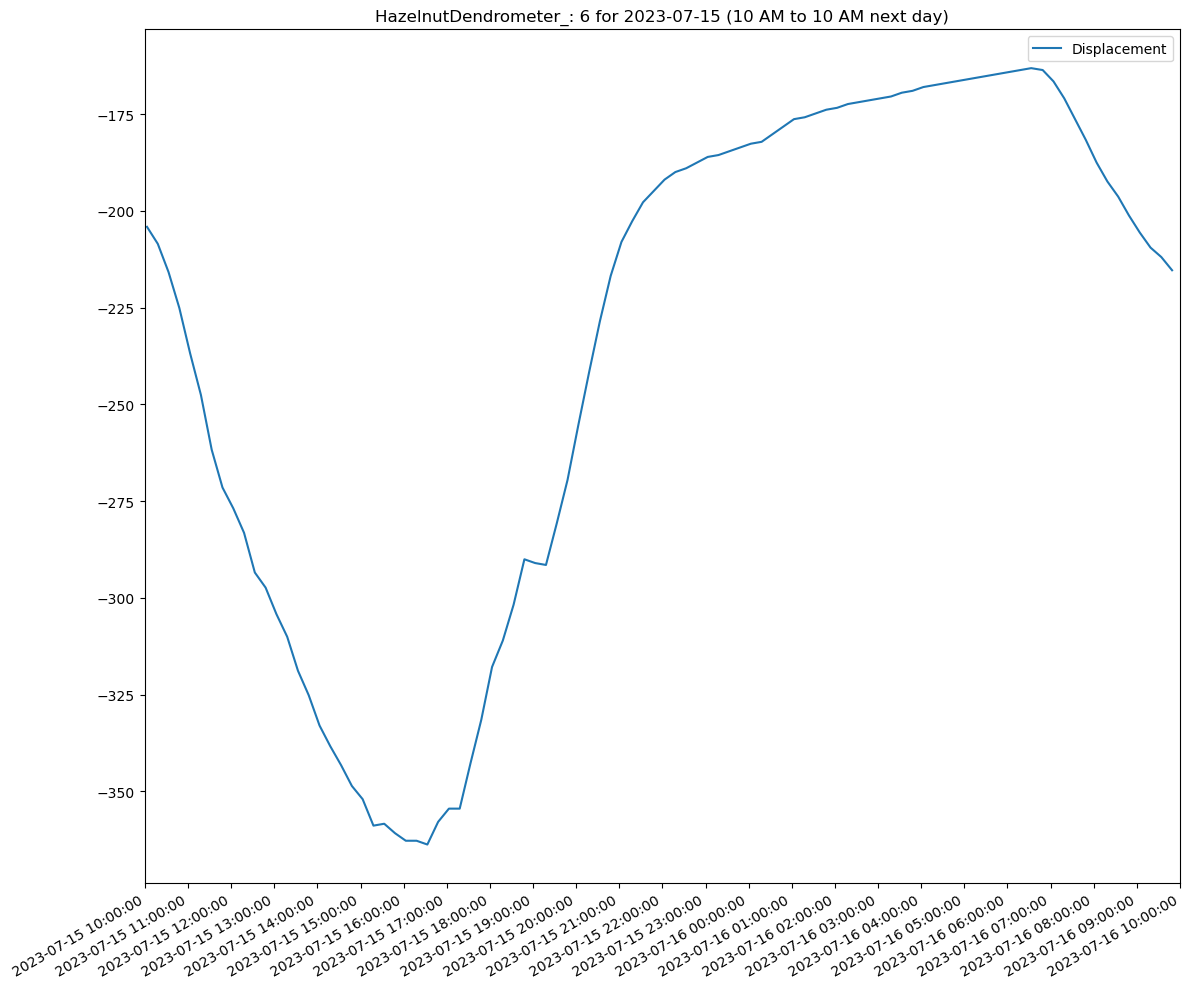

Maximum um: -163.0859375
Maximum um time: 2023-07-16 06:33:00
Minimum um: -363.7695313
Minimum um time: 2023-07-15 16:33:00
Range of Displacement: 200.68359379999998


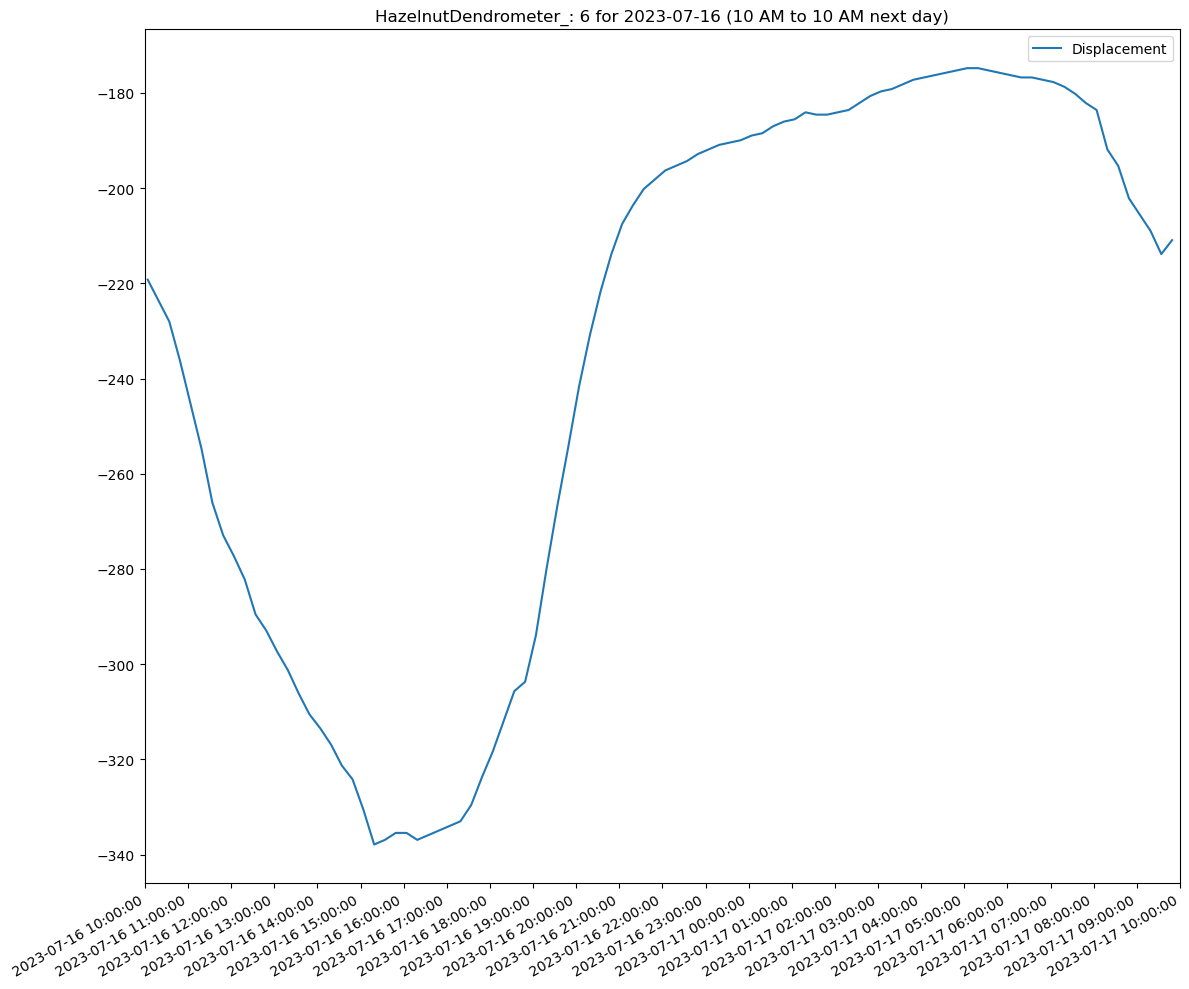

Maximum um: -174.8046875
Maximum um time: 2023-07-17 05:04:00
Minimum um: -337.890625
Minimum um time: 2023-07-16 15:19:00
Range of Displacement: 163.0859375


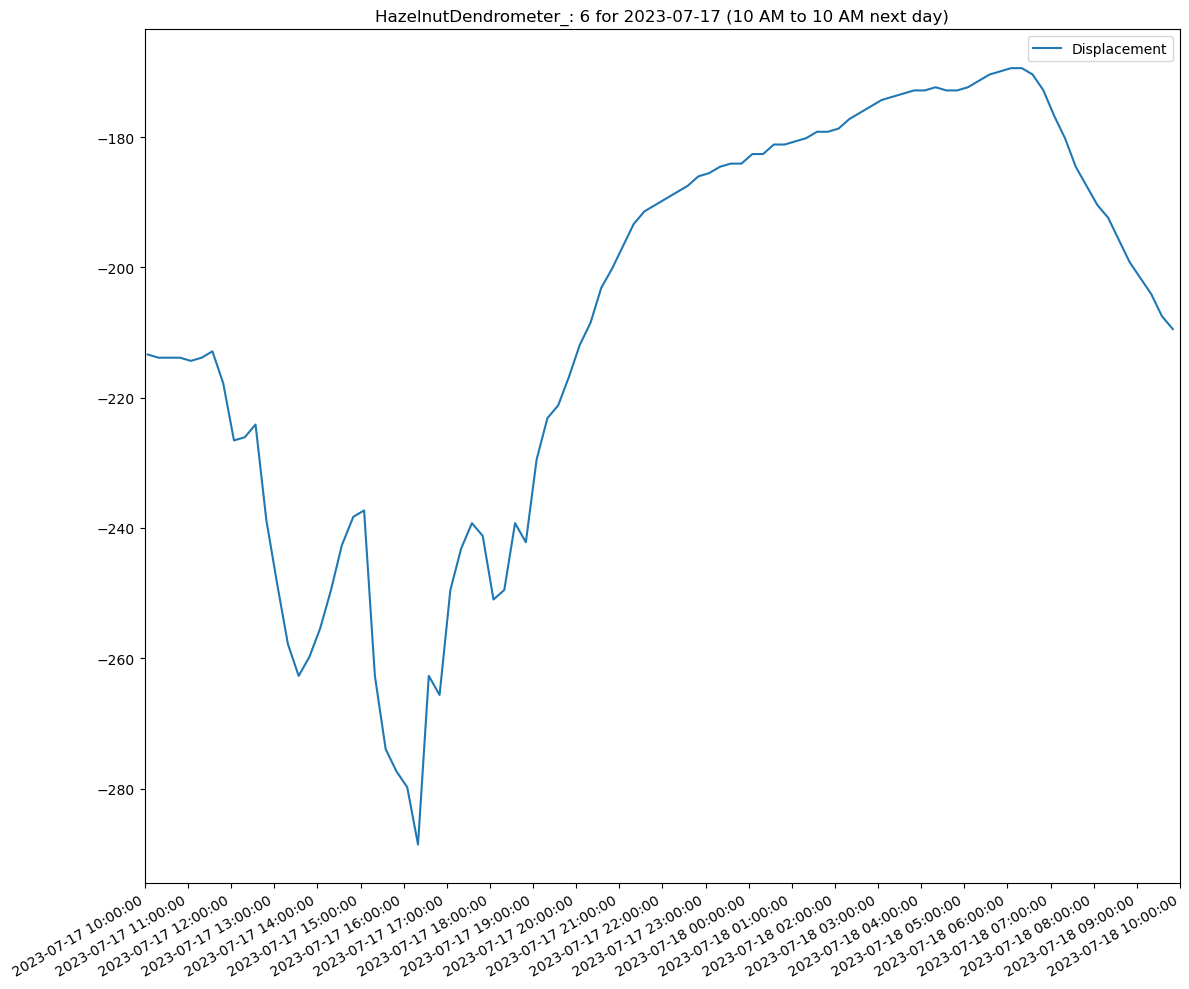

Maximum um: -169.4335938
Maximum um time: 2023-07-18 06:05:00
Minimum um: -288.5742188
Minimum um time: 2023-07-17 16:20:00
Range of Displacement: 119.14062499999997


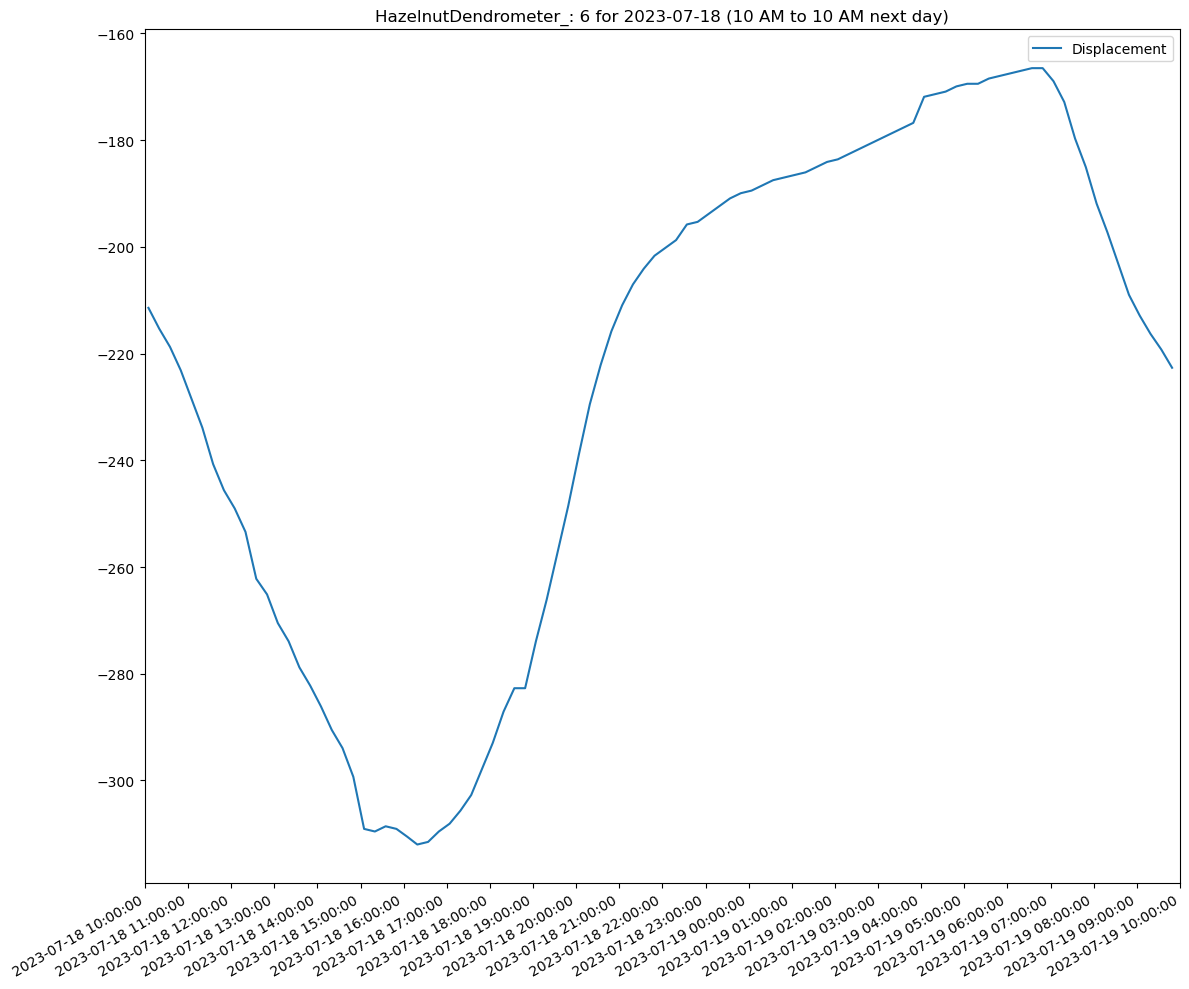

Maximum um: -166.5039063
Maximum um time: 2023-07-19 06:34:00
Minimum um: -312.0117188
Minimum um time: 2023-07-18 16:19:00
Range of Displacement: 145.50781249999997


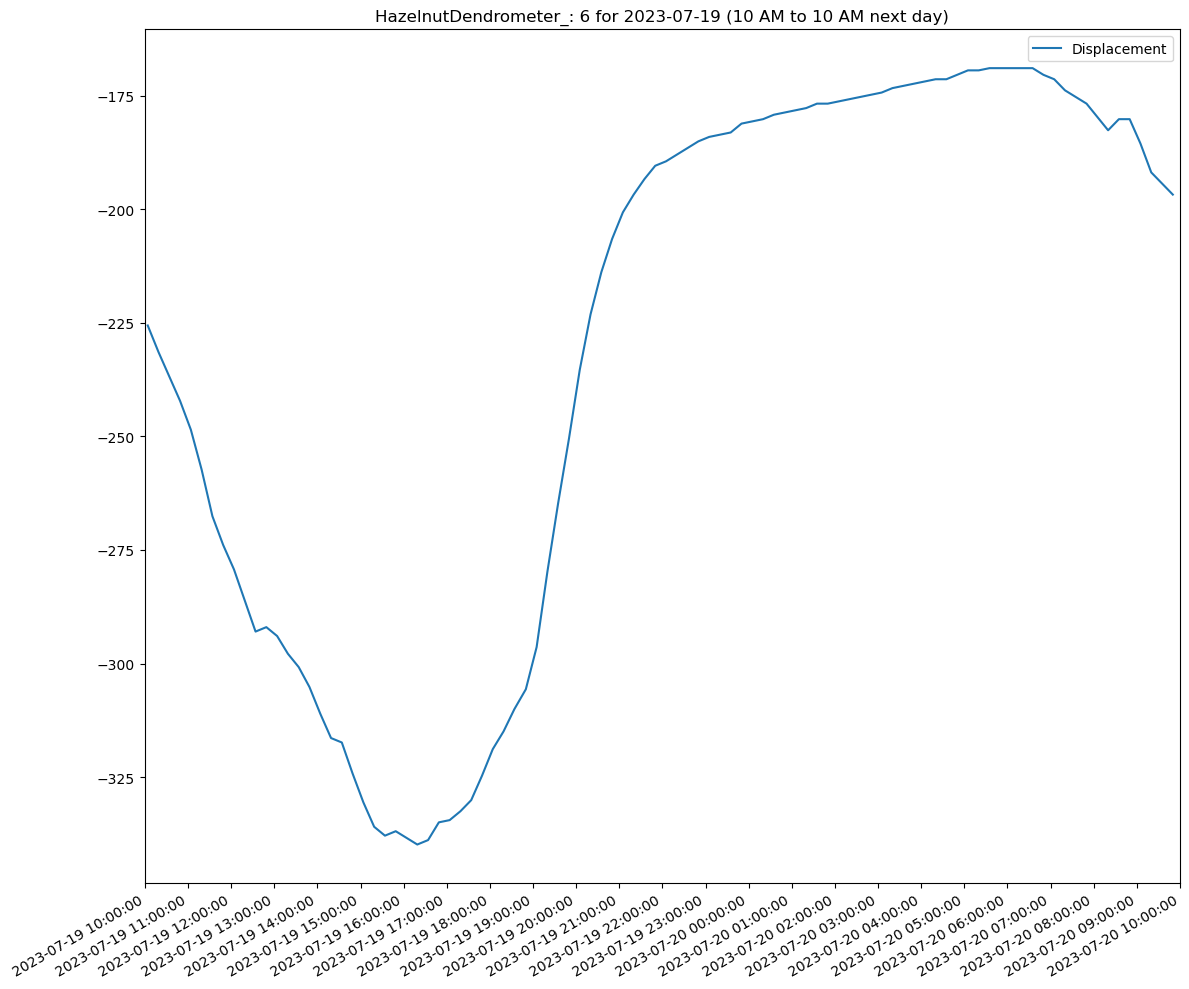

Maximum um: -168.9453125
Maximum um time: 2023-07-20 05:35:00
Minimum um: -339.84375
Minimum um time: 2023-07-19 16:19:00
Range of Displacement: 170.8984375


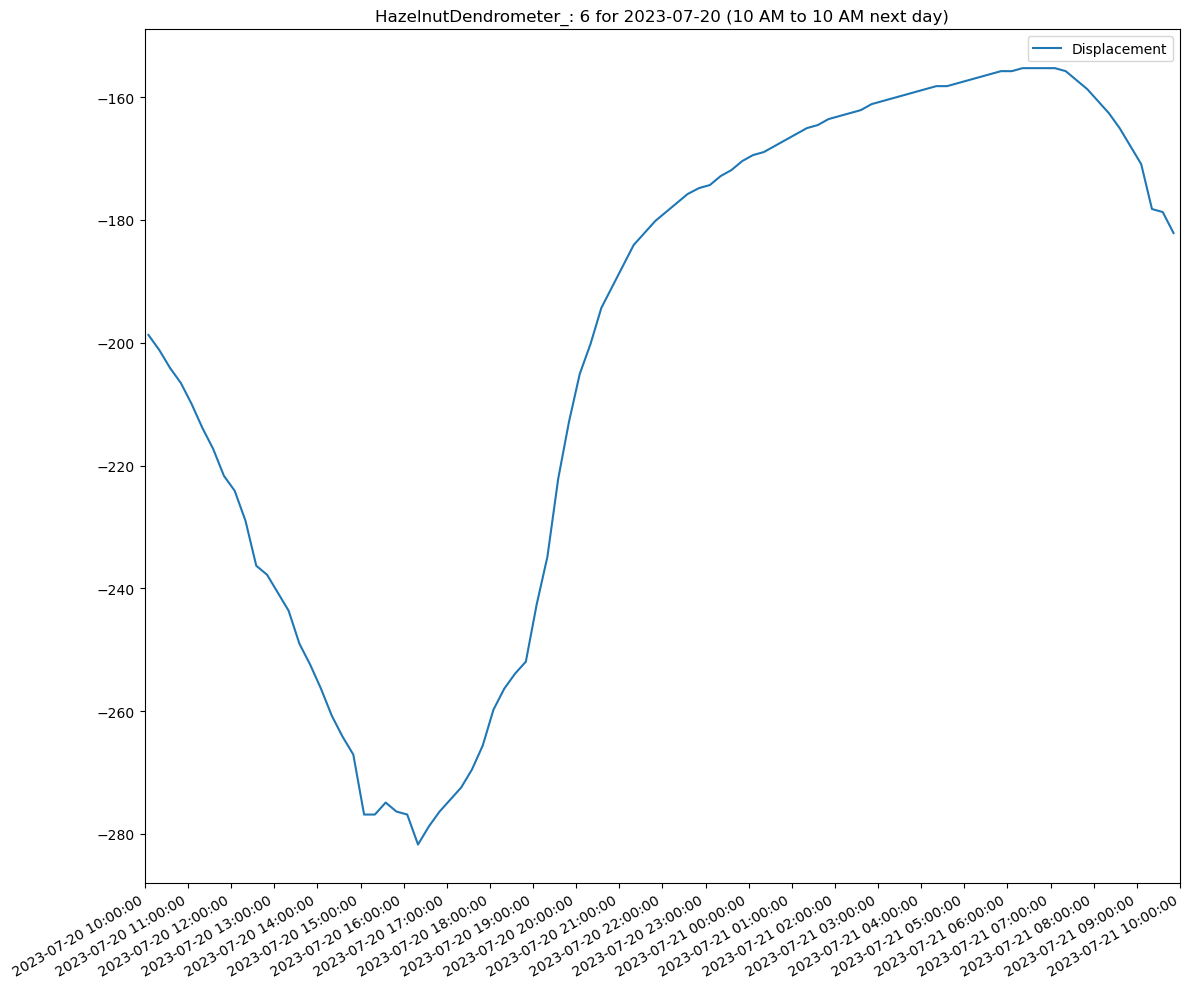

Maximum um: -155.2734375
Maximum um time: 2023-07-21 06:21:00
Minimum um: -281.7382813
Minimum um time: 2023-07-20 16:20:00
Range of Displacement: 126.46484379999998


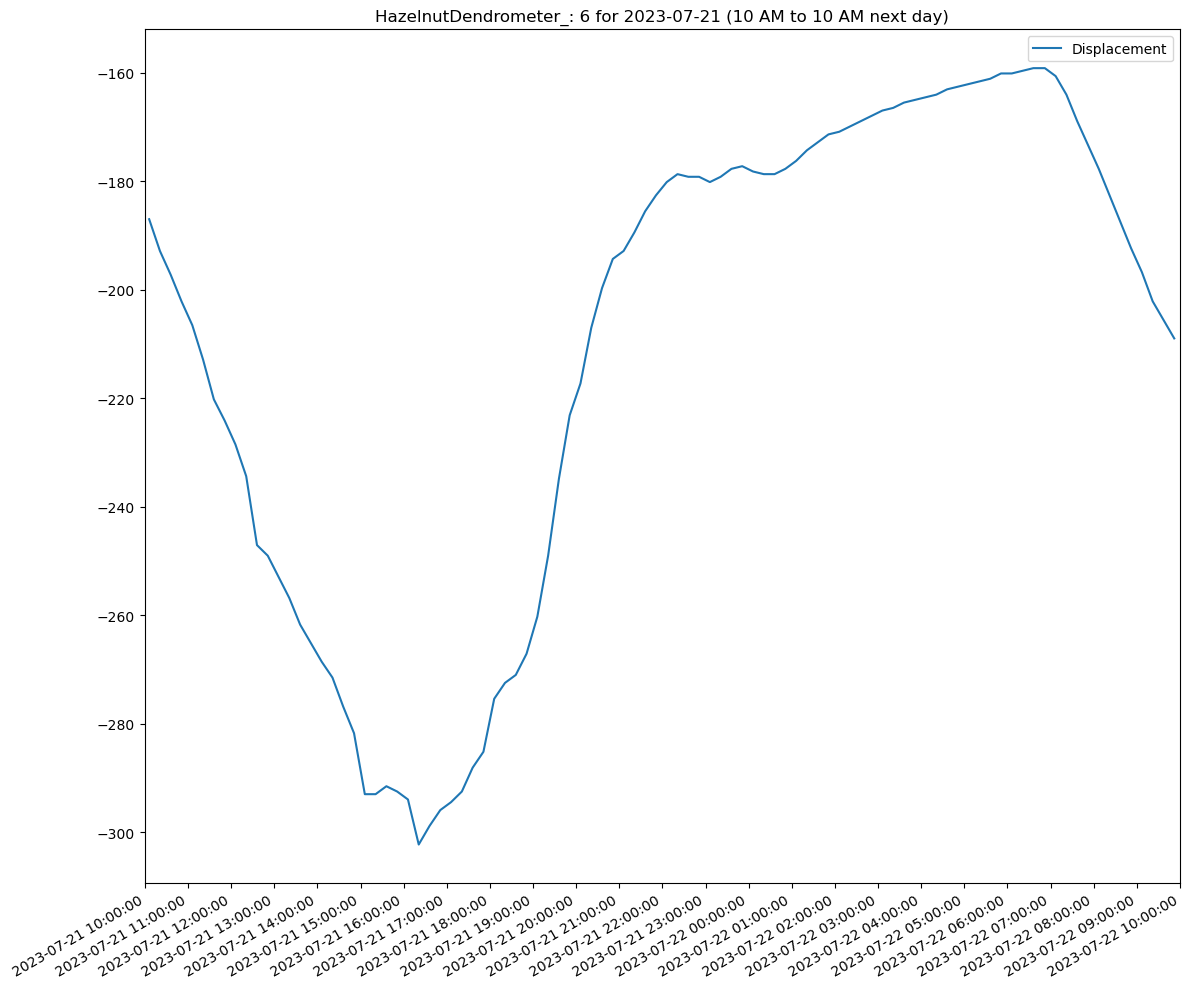

Maximum um: -159.1796875
Maximum um time: 2023-07-22 06:36:00
Minimum um: -302.2460938
Minimum um time: 2023-07-21 16:21:00
Range of Displacement: 143.06640629999998


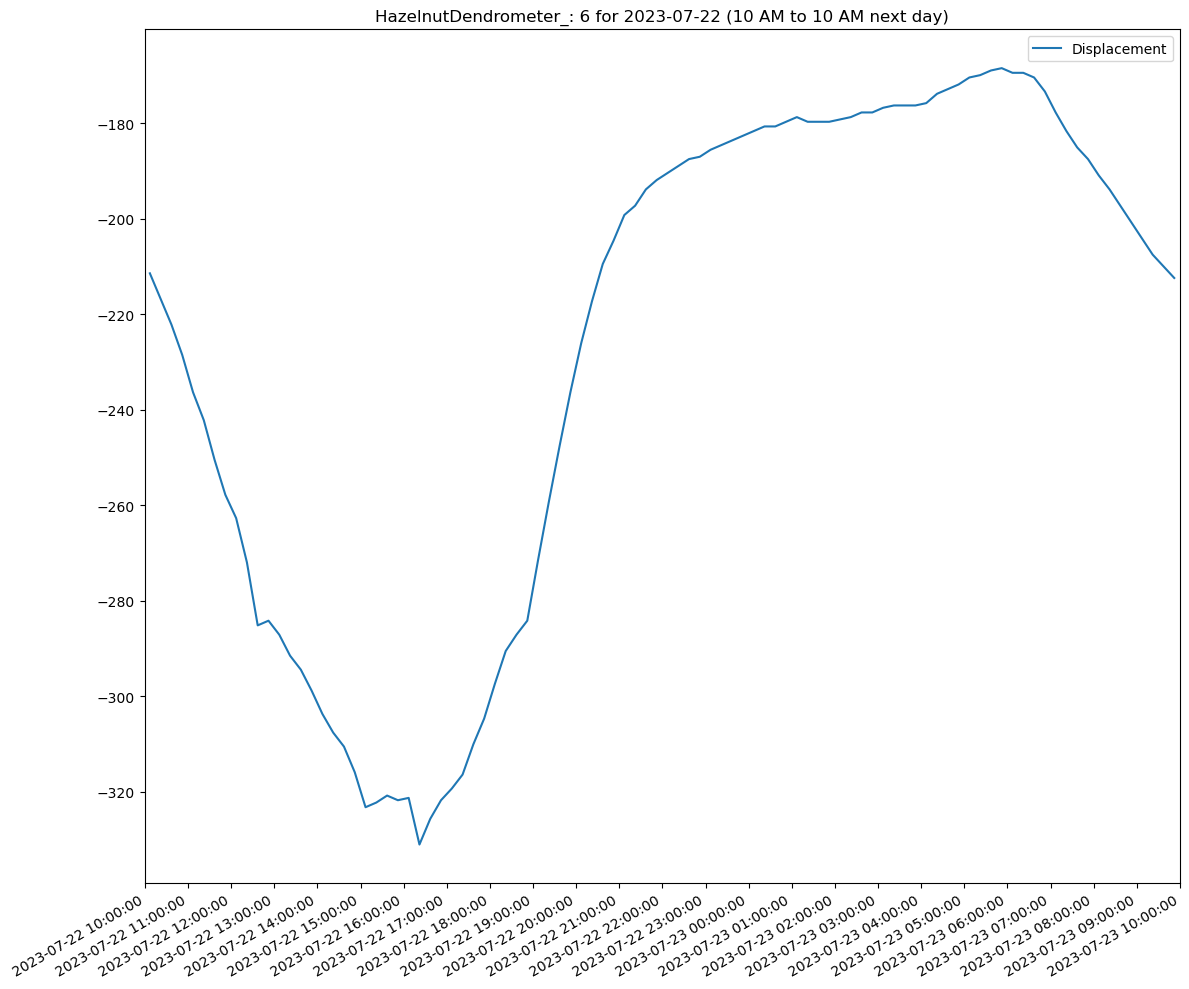

Maximum um: -168.4570313
Maximum um time: 2023-07-23 05:52:00
Minimum um: -331.0546875
Minimum um time: 2023-07-22 16:22:00
Range of Displacement: 162.5976562


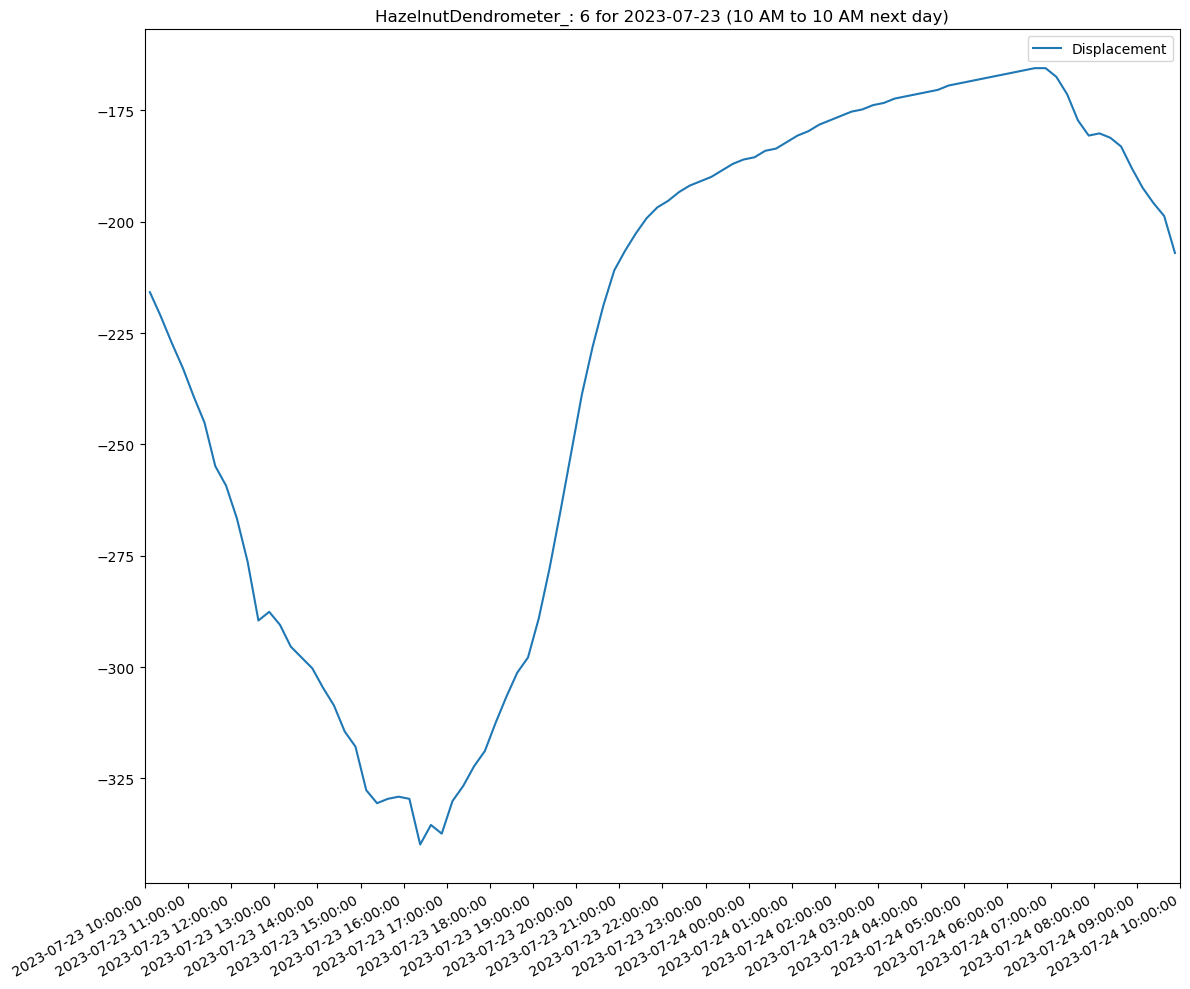

Maximum um: -165.5273438
Maximum um time: 2023-07-24 06:38:00
Minimum um: -339.84375
Minimum um time: 2023-07-23 16:23:00
Range of Displacement: 174.3164062


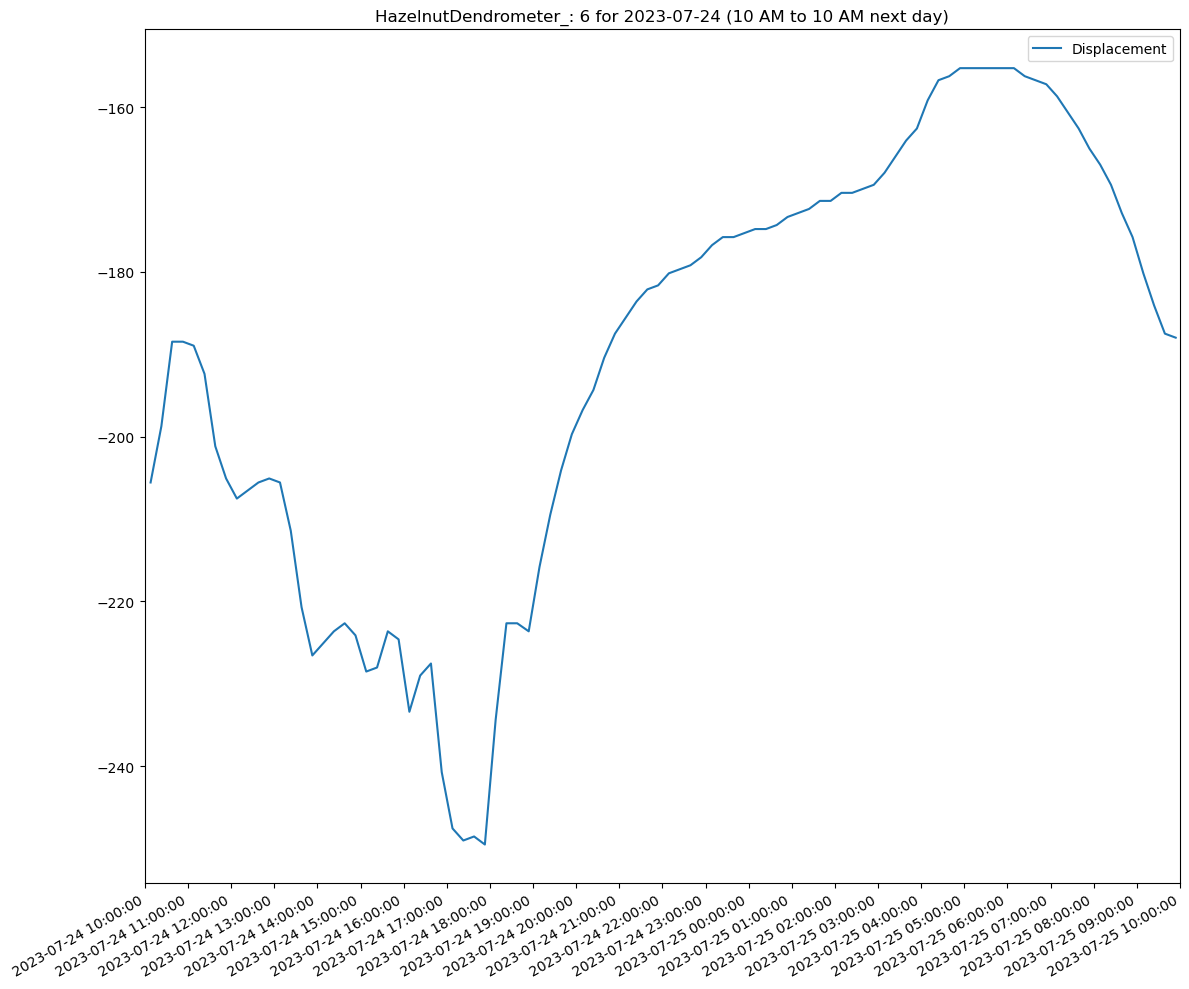

Maximum um: -155.2734375
Maximum um time: 2023-07-25 04:54:00
Minimum um: -249.5117188
Minimum um time: 2023-07-24 17:53:00
Range of Displacement: 94.23828130000001


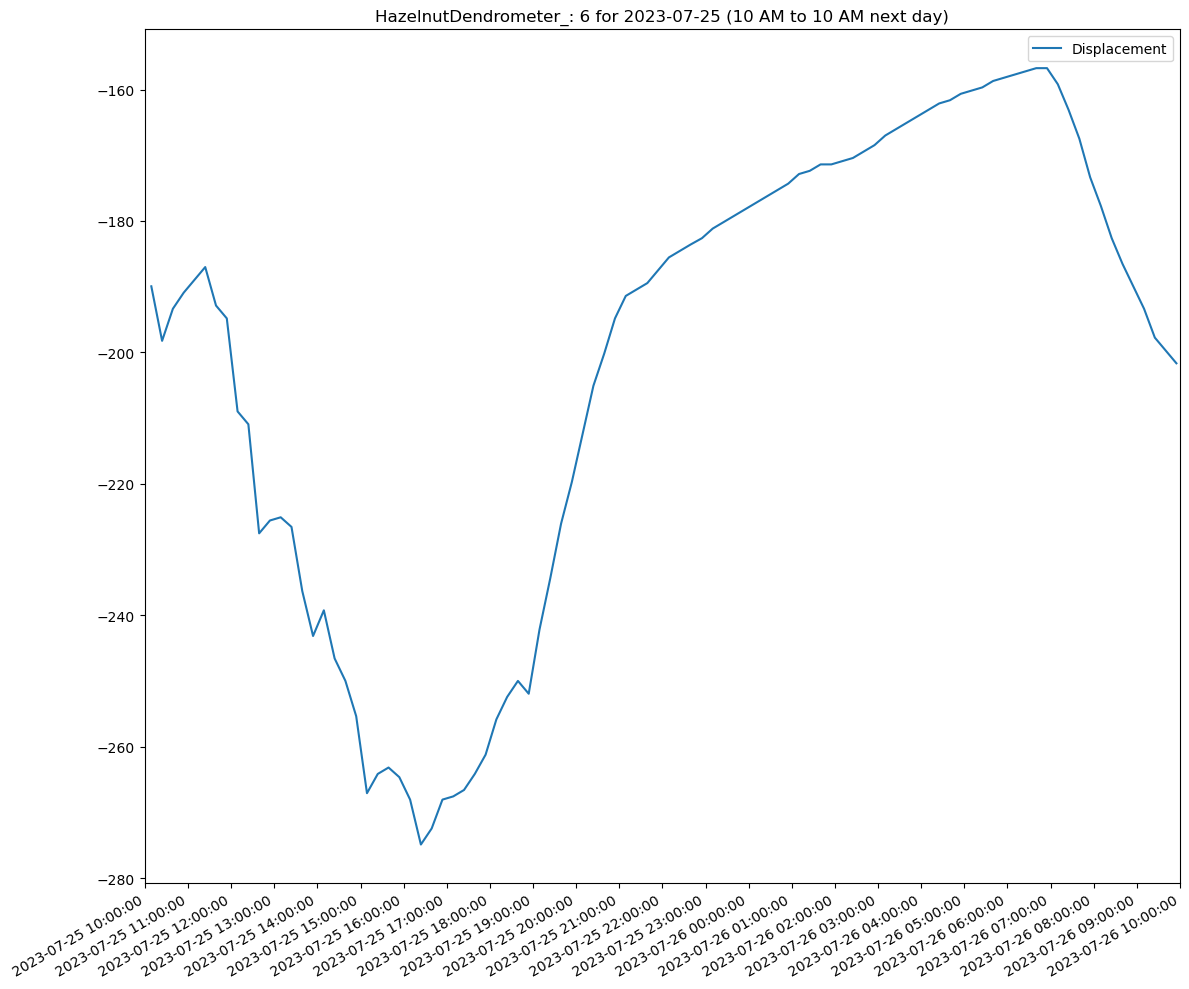

Maximum um: -156.7382813
Maximum um time: 2023-07-26 06:40:00
Minimum um: -274.9023438
Minimum um time: 2023-07-25 16:24:00
Range of Displacement: 118.16406249999997


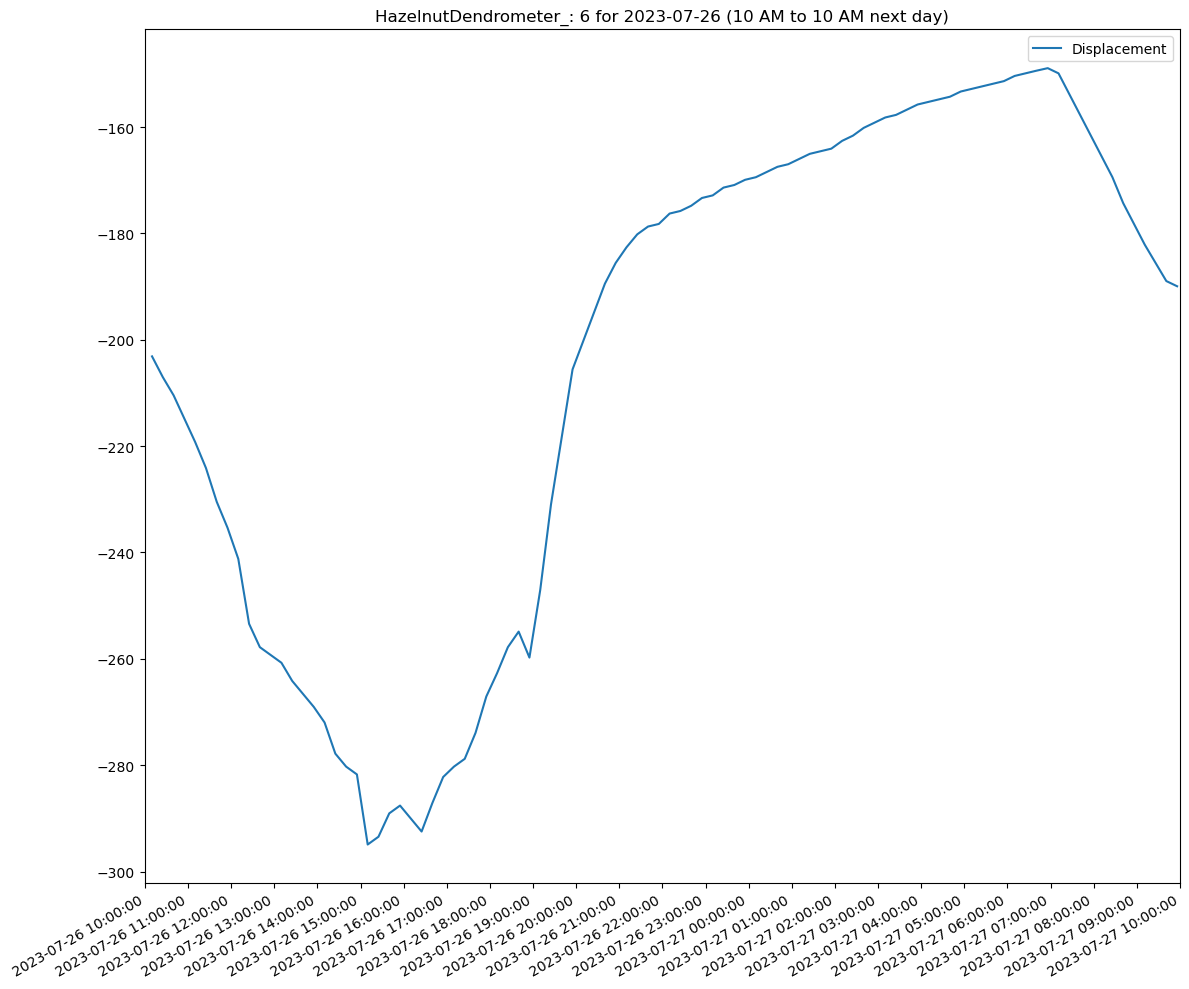

Maximum um: -148.9257813
Maximum um time: 2023-07-27 06:56:00
Minimum um: -294.921875
Minimum um time: 2023-07-26 15:10:00
Range of Displacement: 145.9960937


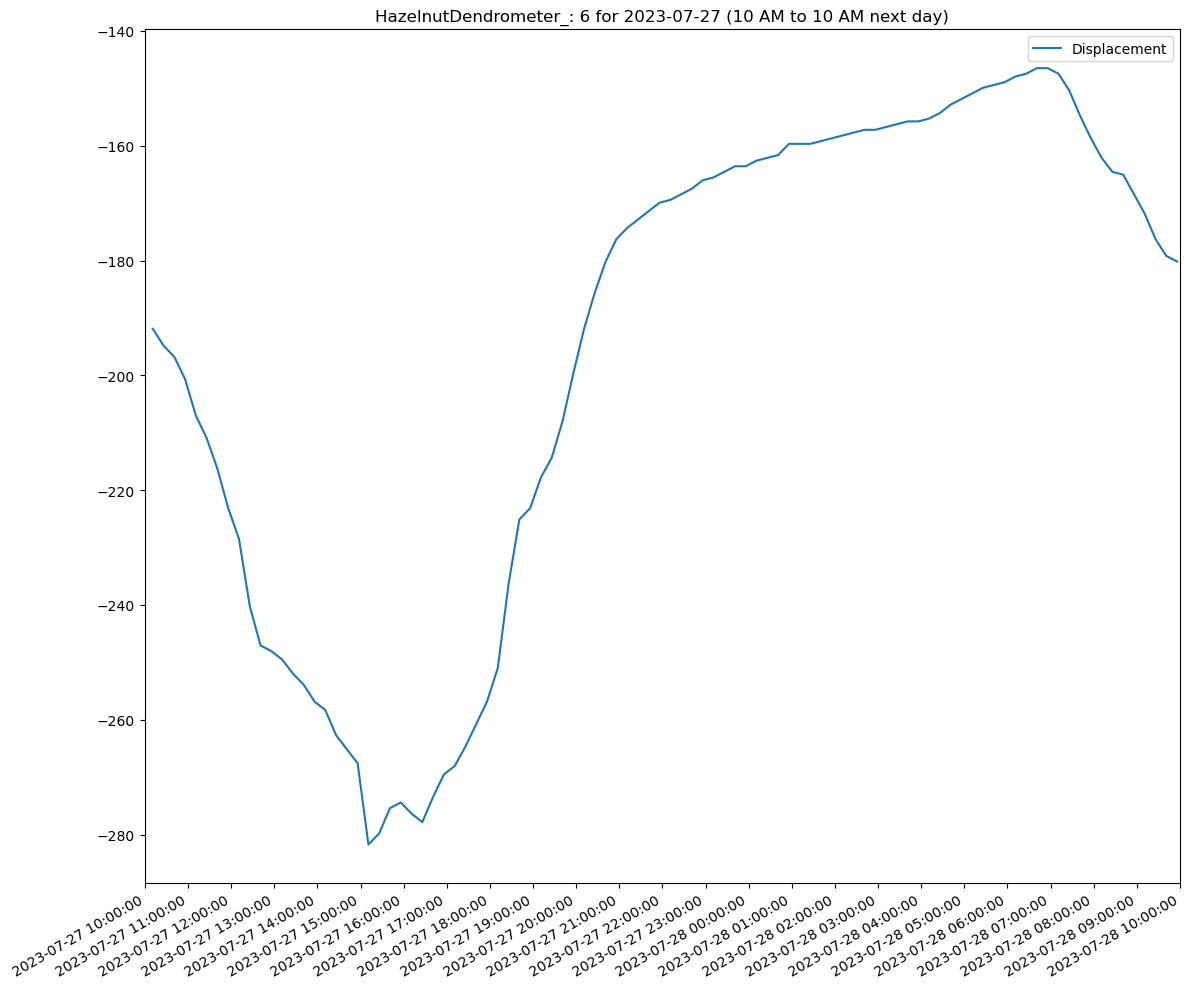

Maximum um: -146.484375
Maximum um time: 2023-07-28 06:41:00
Minimum um: -281.7382813
Minimum um time: 2023-07-27 15:11:00
Range of Displacement: 135.25390629999998


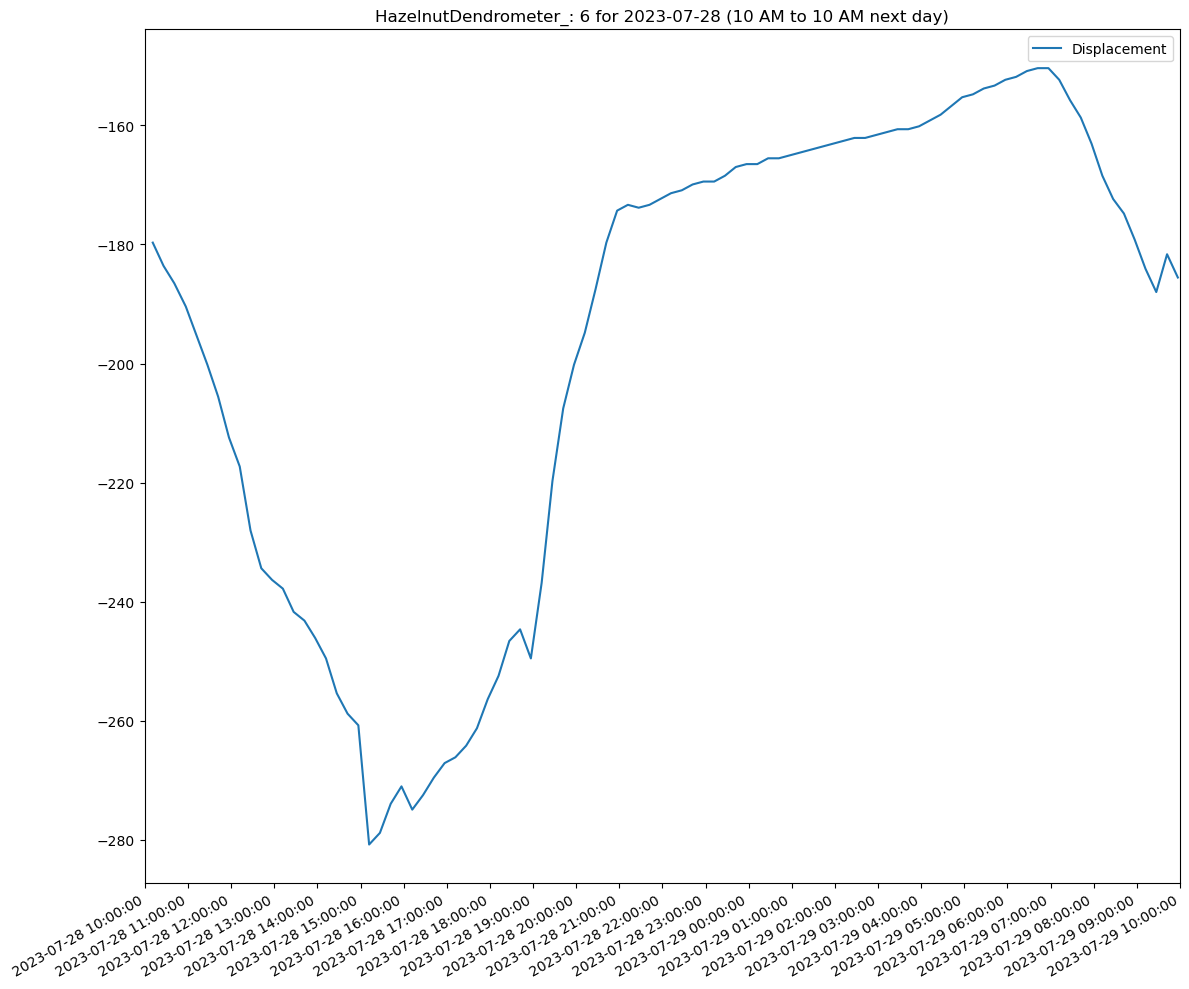

Maximum um: -150.390625
Maximum um time: 2023-07-29 06:42:00
Minimum um: -280.7617188
Minimum um time: 2023-07-28 15:12:00
Range of Displacement: 130.37109379999998


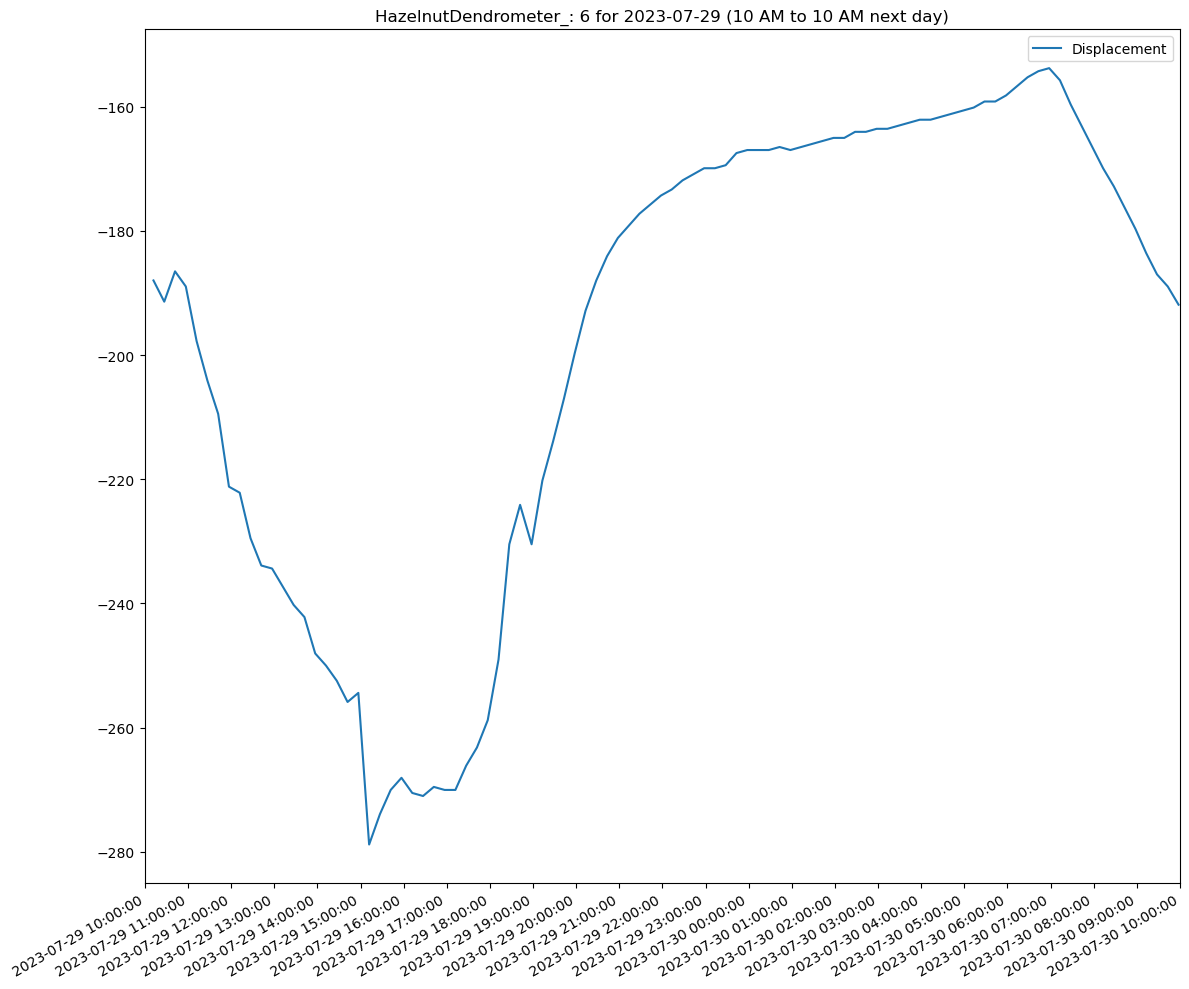

Maximum um: -153.8085938
Maximum um time: 2023-07-30 06:58:00
Minimum um: -278.8085938
Minimum um time: 2023-07-29 15:12:00
Range of Displacement: 124.99999999999997


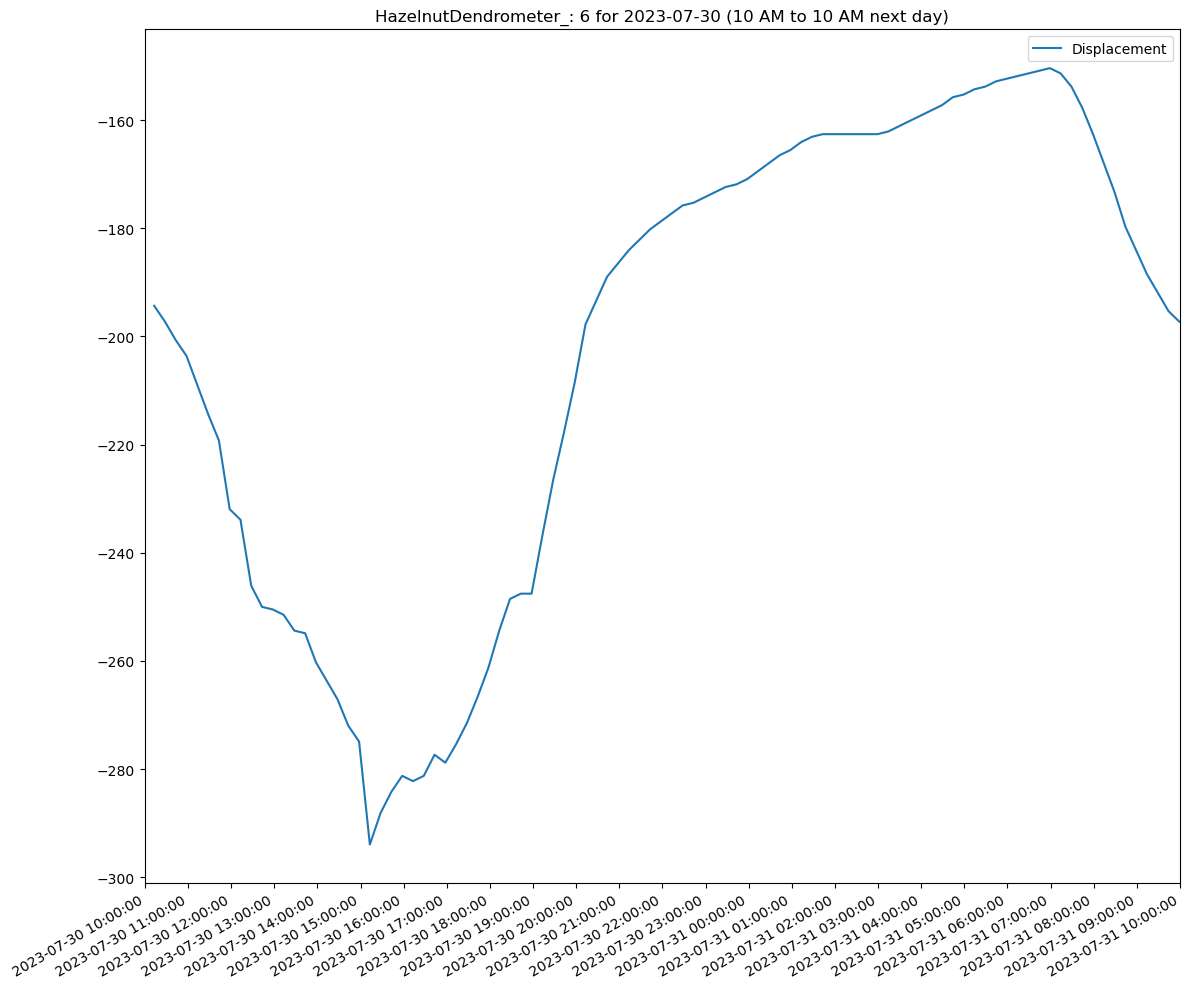

Maximum um: -150.390625
Maximum um time: 2023-07-31 06:59:00
Minimum um: -293.9453125
Minimum um time: 2023-07-30 15:13:00
Range of Displacement: 143.5546875


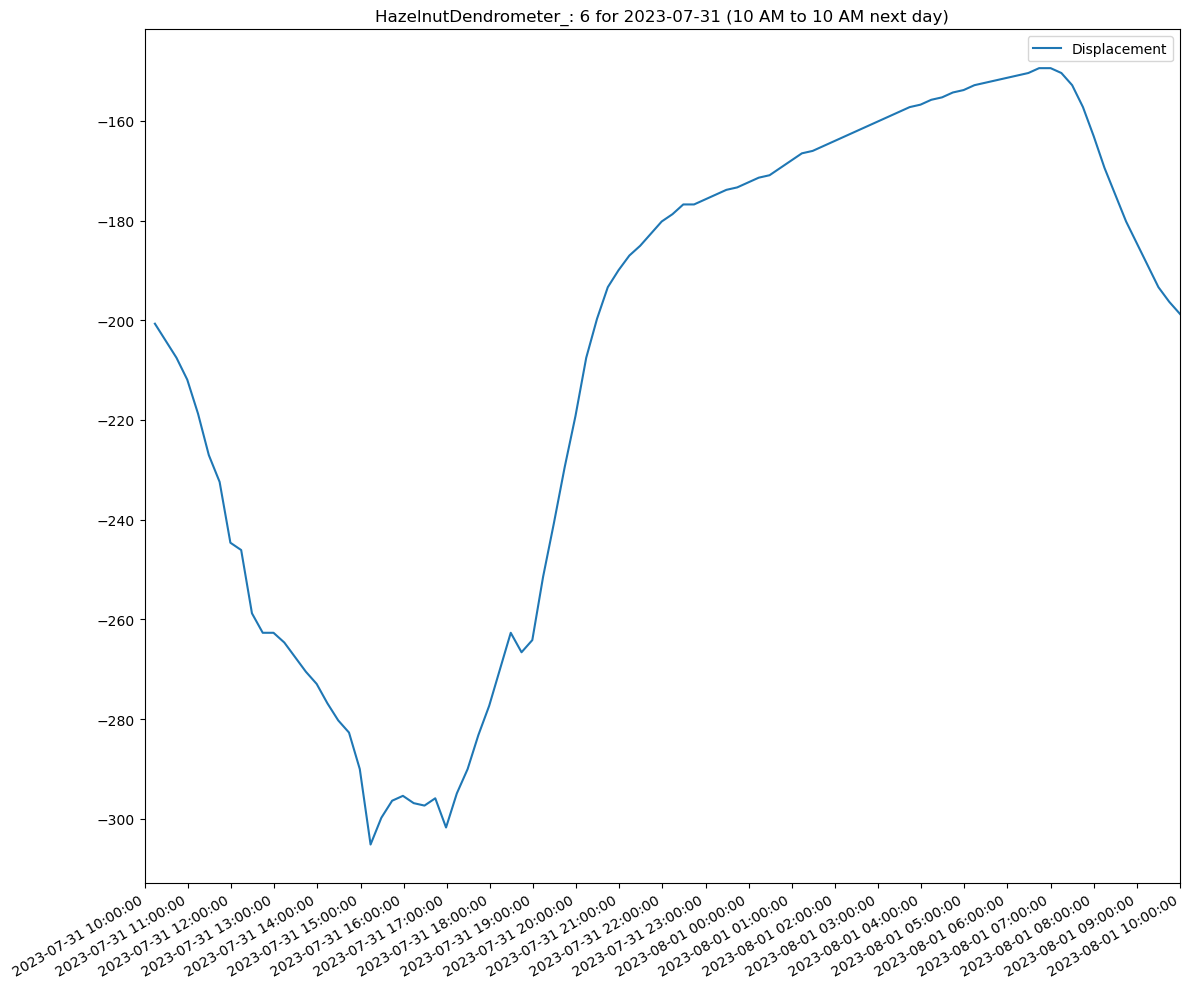

Maximum um: -149.4140625
Maximum um time: 2023-08-01 06:44:00
Minimum um: -305.1757813
Minimum um time: 2023-07-31 15:14:00
Range of Displacement: 155.76171879999998


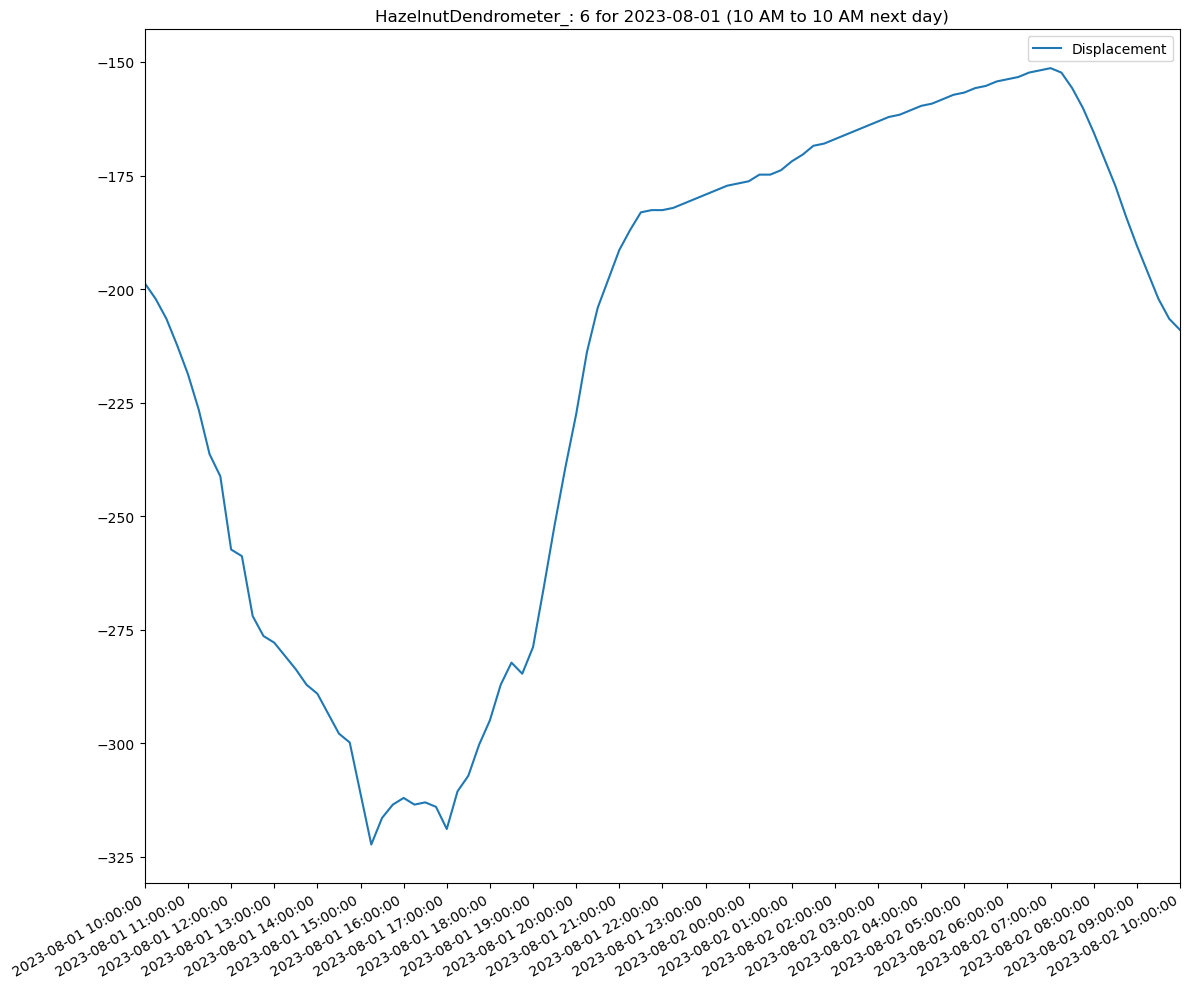

Maximum um: -151.3671875
Maximum um time: 2023-08-02 07:00:00
Minimum um: -322.265625
Minimum um time: 2023-08-01 15:15:00
Range of Displacement: 170.8984375


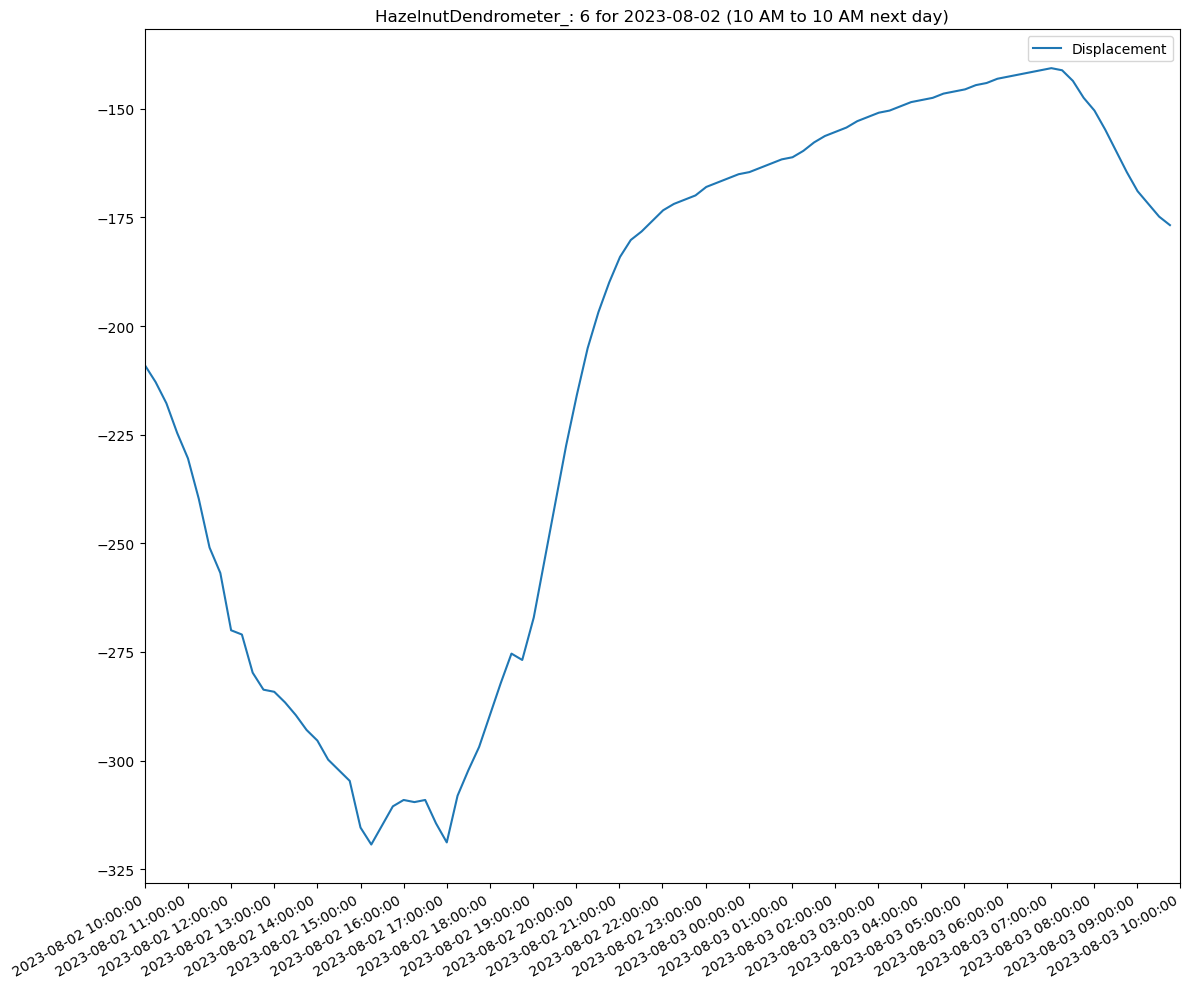

Maximum um: -140.625
Maximum um time: 2023-08-03 07:01:00
Minimum um: -319.3359375
Minimum um time: 2023-08-02 15:15:00
Range of Displacement: 178.7109375


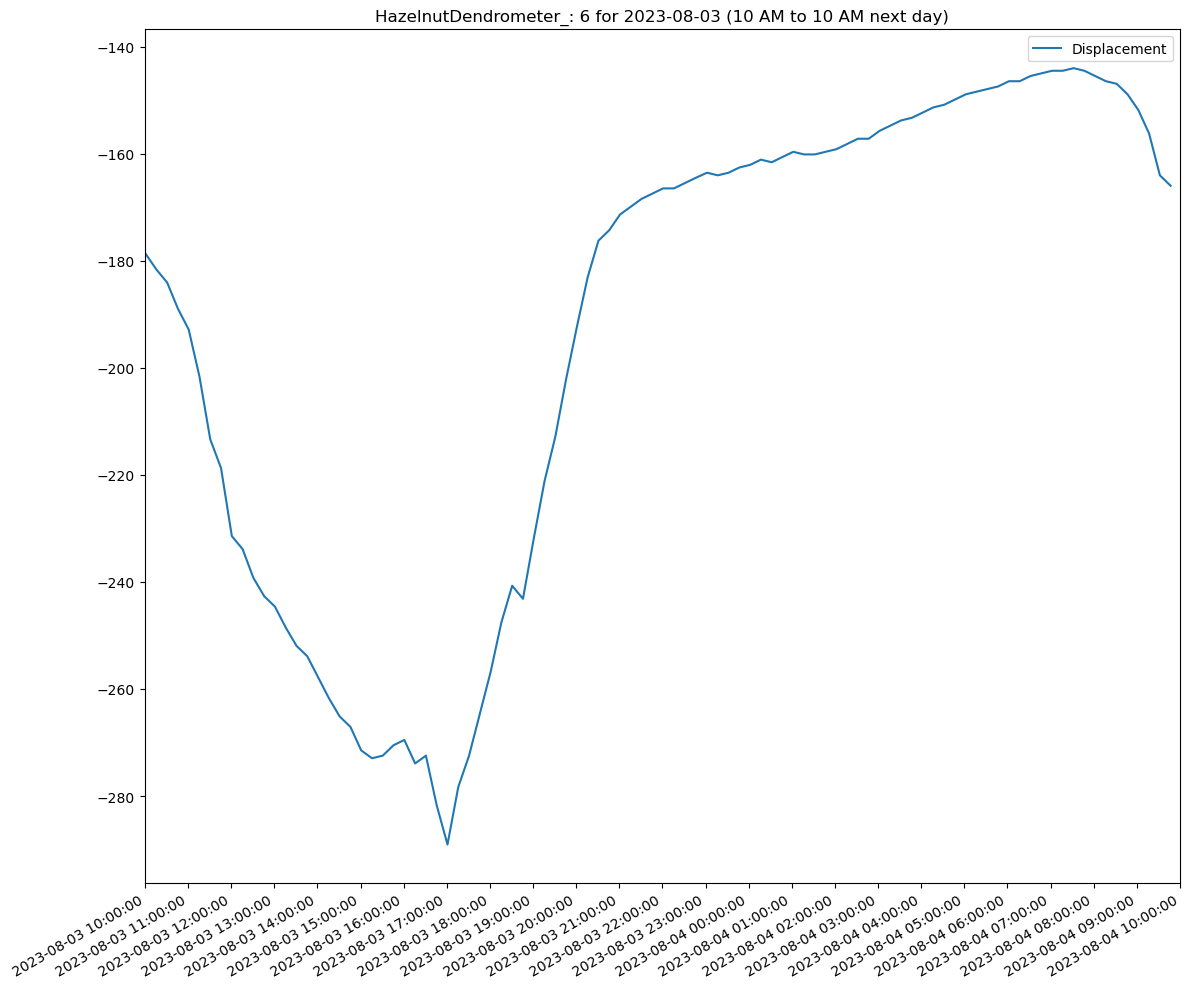

Maximum um: -144.0429688
Maximum um time: 2023-08-04 07:32:00
Minimum um: -289.0625
Minimum um time: 2023-08-03 17:01:00
Range of Displacement: 145.0195312


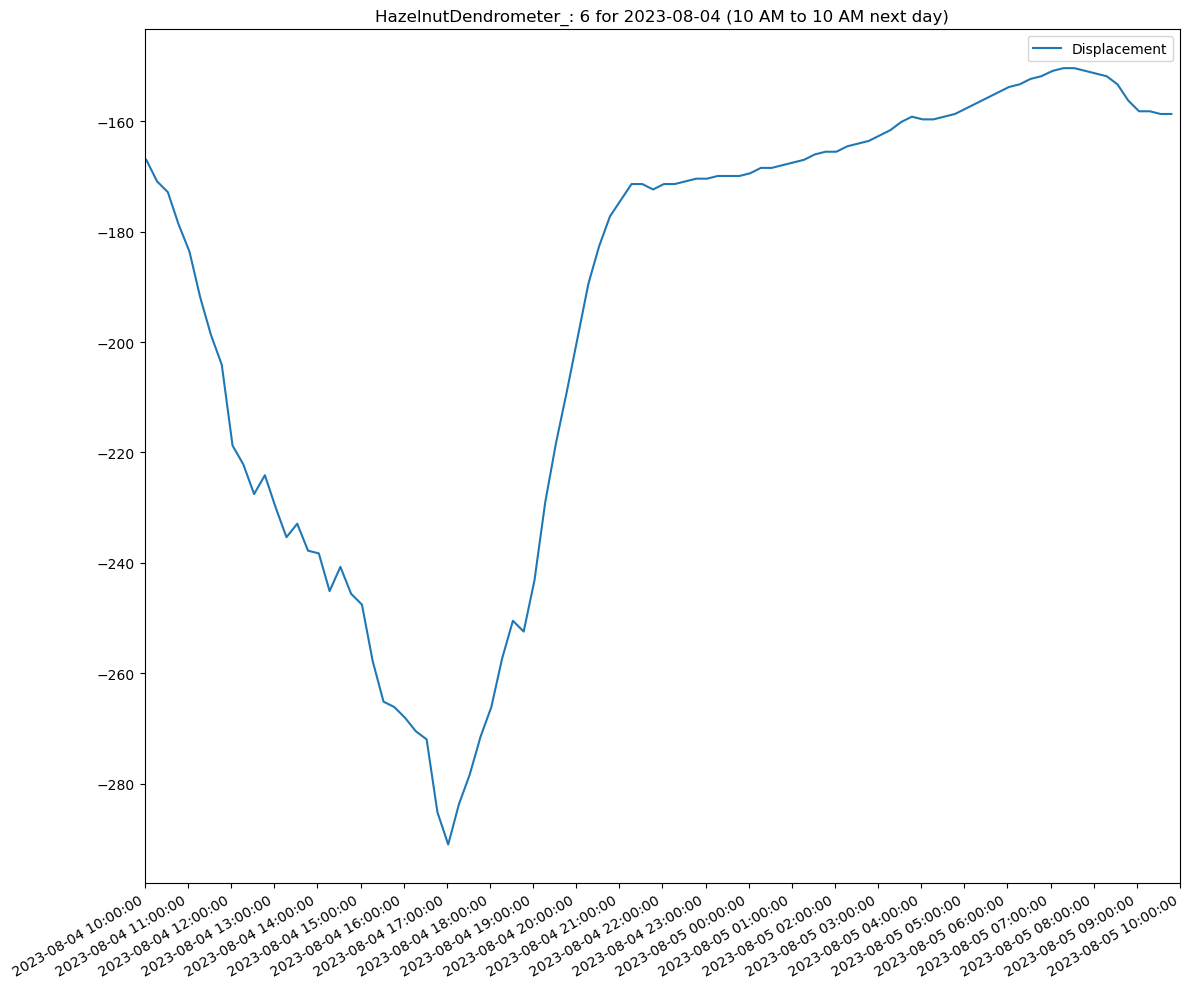

Maximum um: -150.390625
Maximum um time: 2023-08-05 07:18:00
Minimum um: -291.015625
Minimum um time: 2023-08-04 17:02:00
Range of Displacement: 140.625


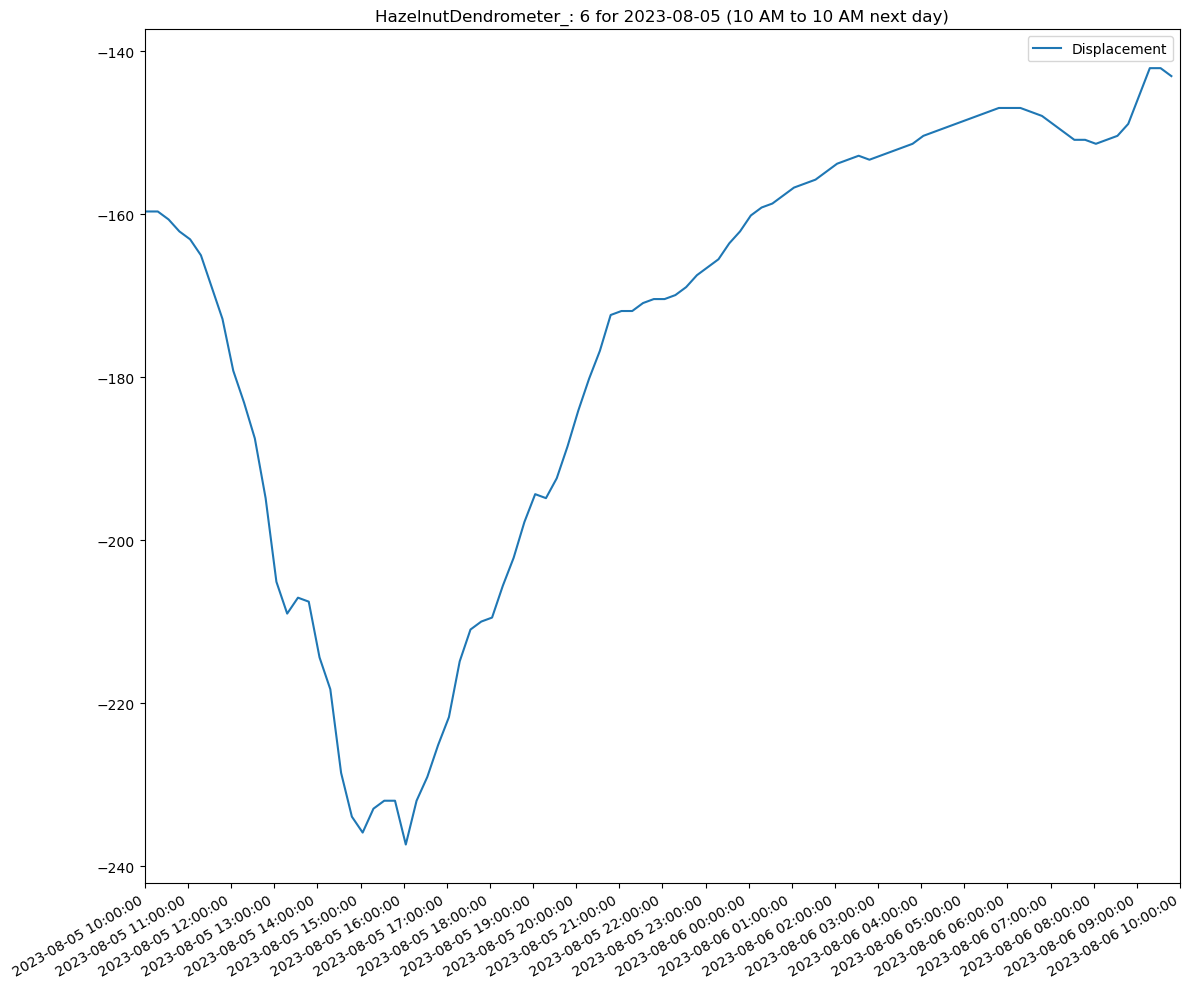

Maximum um: -142.0898438
Maximum um time: 2023-08-06 09:18:00
Minimum um: -237.3046875
Minimum um time: 2023-08-05 16:03:00
Range of Displacement: 95.21484369999999


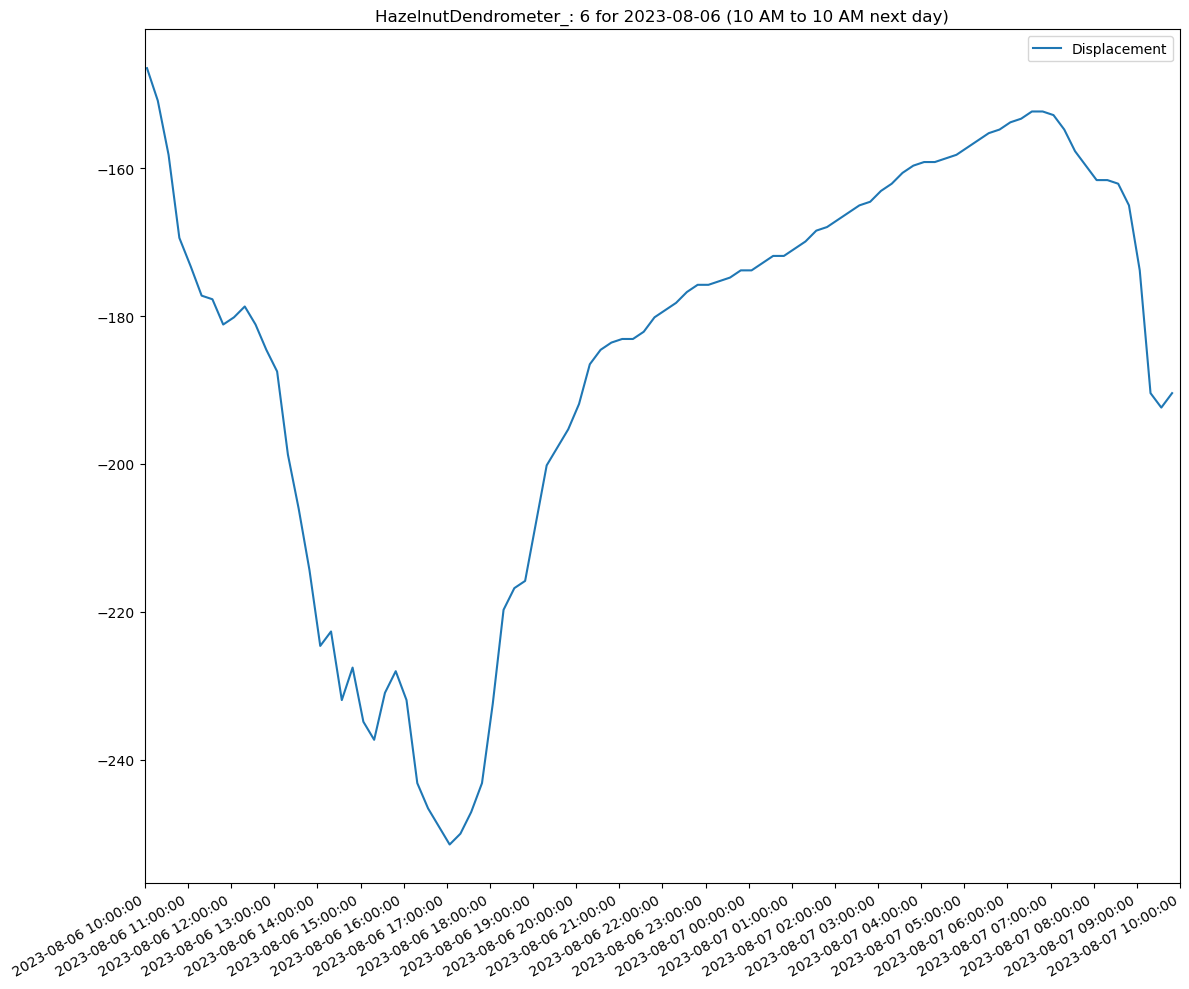

Maximum um: -146.484375
Maximum um time: 2023-08-06 10:03:00
Minimum um: -251.4648438
Minimum um time: 2023-08-06 17:04:00
Range of Displacement: 104.98046880000001


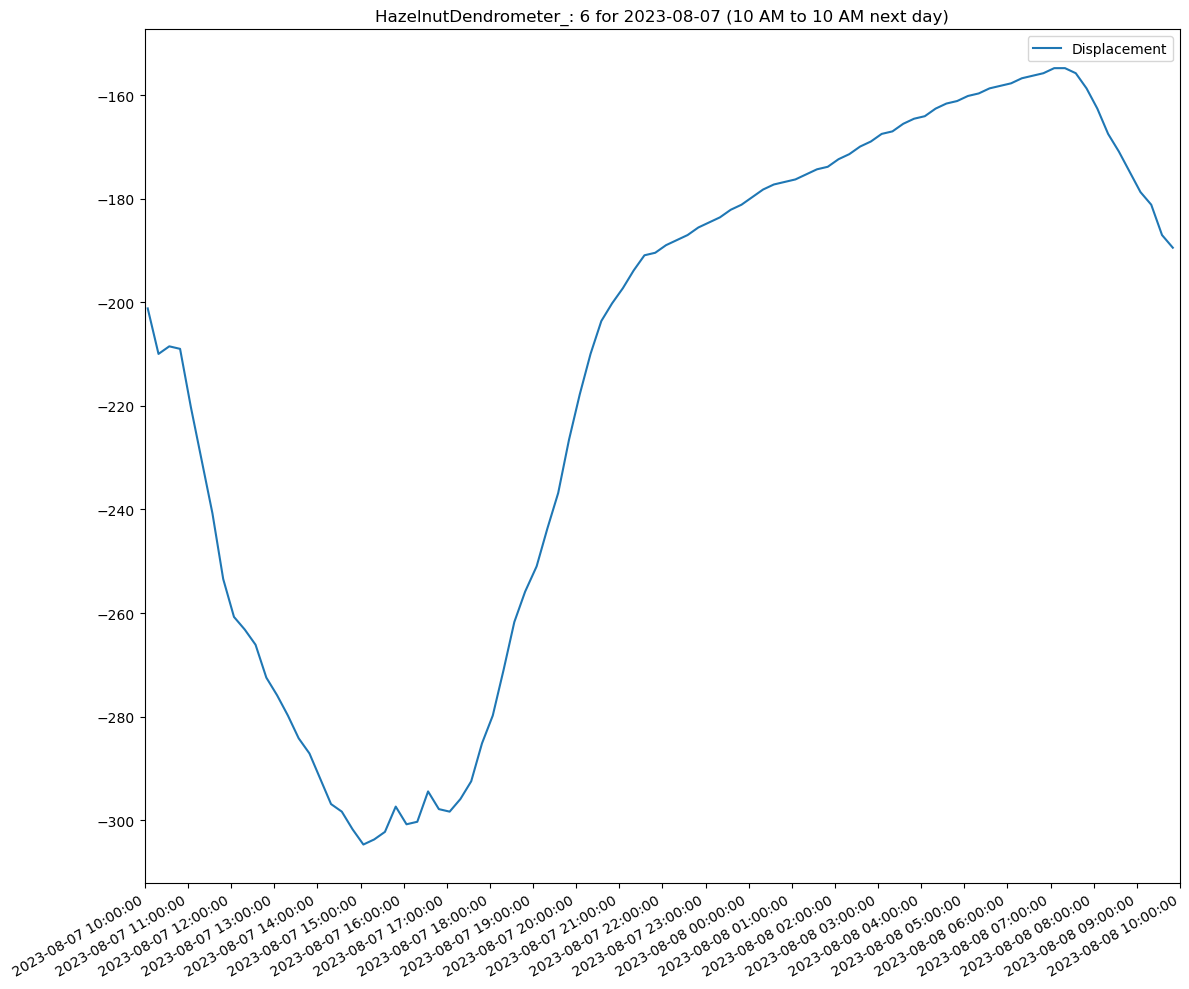

Maximum um: -154.7851563
Maximum um time: 2023-08-08 07:05:00
Minimum um: -304.6875
Minimum um time: 2023-08-07 15:04:00
Range of Displacement: 149.9023437


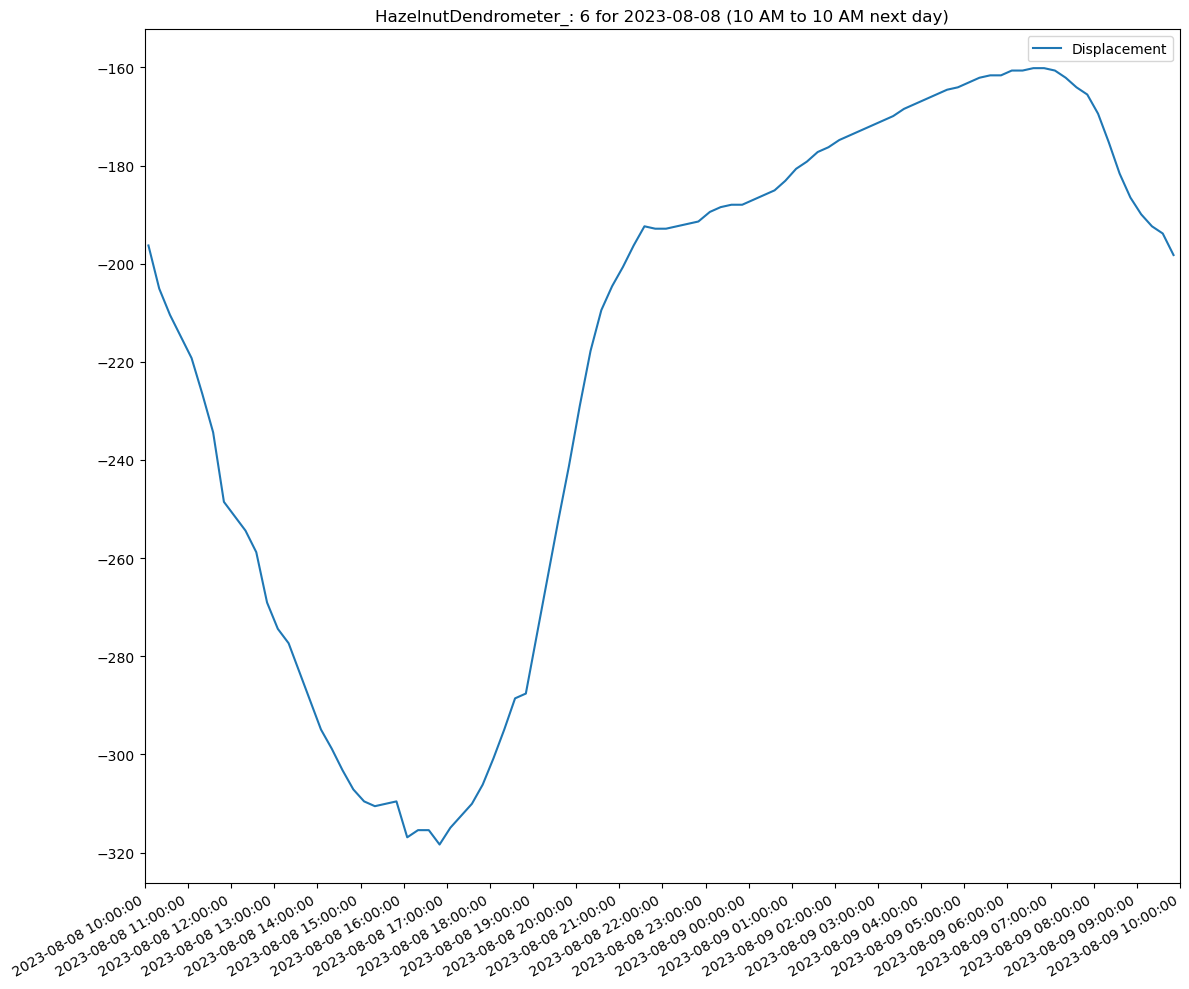

Maximum um: -160.15625
Maximum um time: 2023-08-09 06:36:00
Minimum um: -318.359375
Minimum um time: 2023-08-08 16:50:00
Range of Displacement: 158.203125


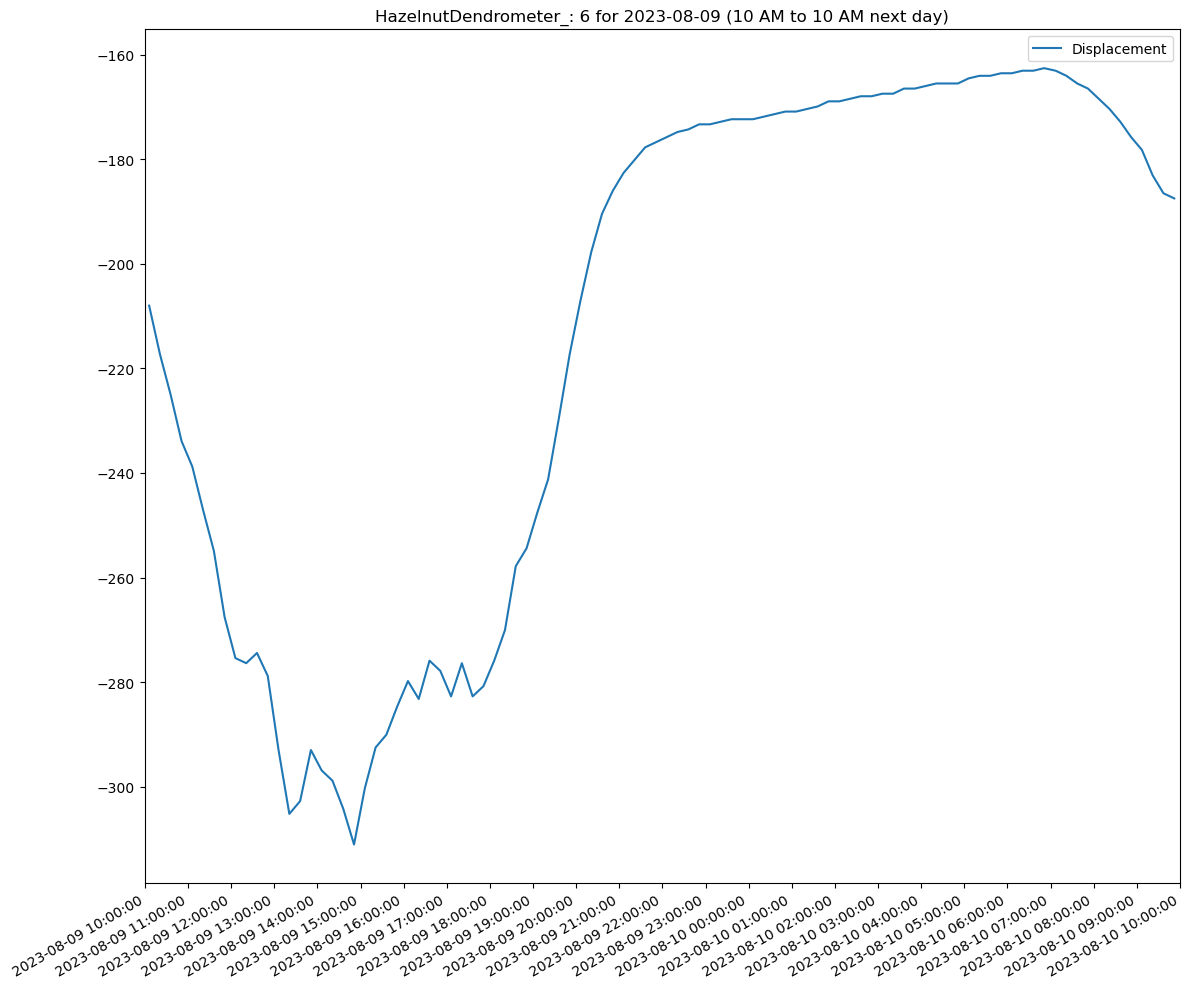

Maximum um: -162.5976563
Maximum um time: 2023-08-10 06:51:00
Minimum um: -311.0351563
Minimum um time: 2023-08-09 14:51:00
Range of Displacement: 148.43749999999997


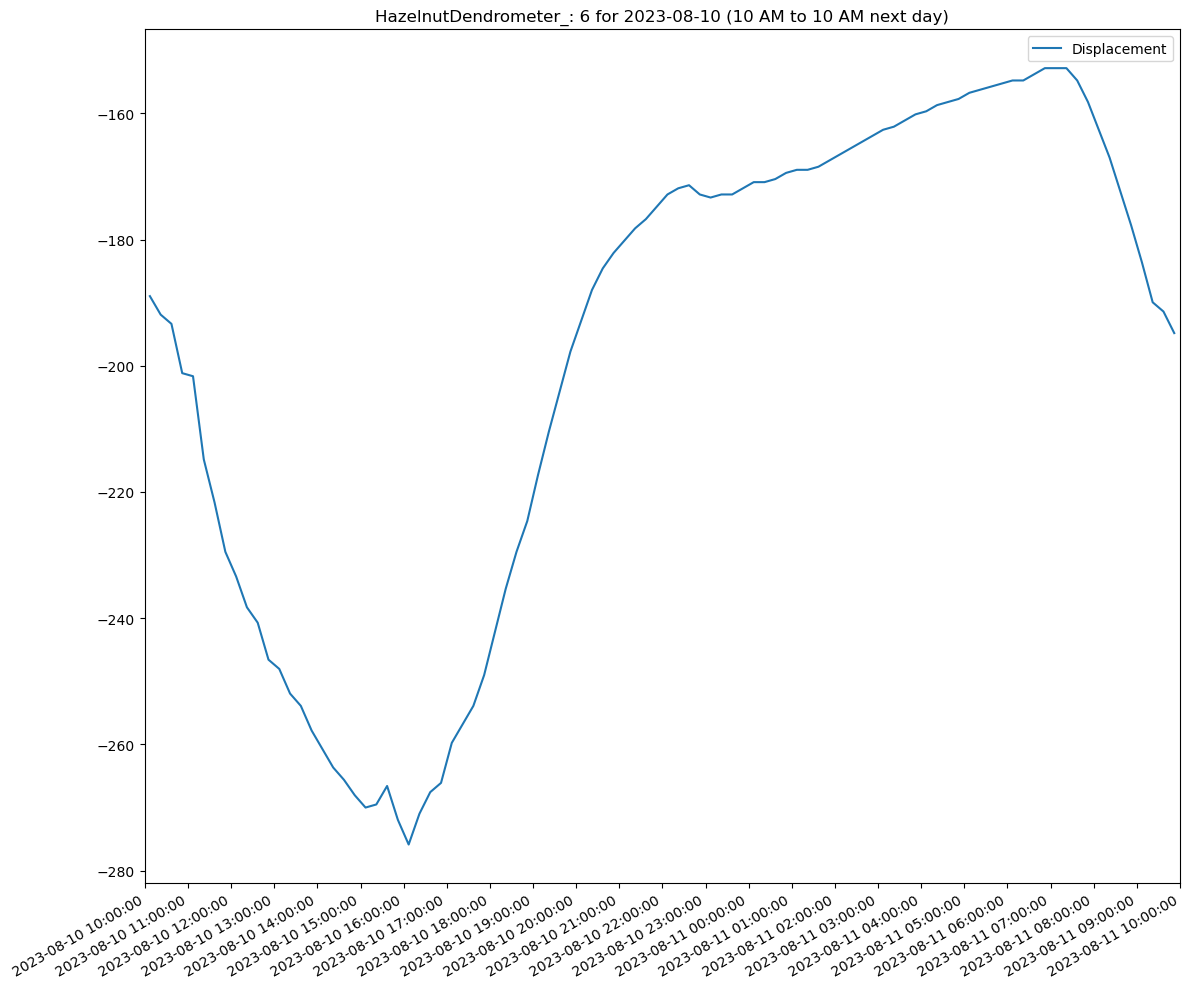

Maximum um: -152.8320313
Maximum um time: 2023-08-11 06:52:00
Minimum um: -275.8789063
Minimum um time: 2023-08-10 16:07:00
Range of Displacement: 123.04687499999997


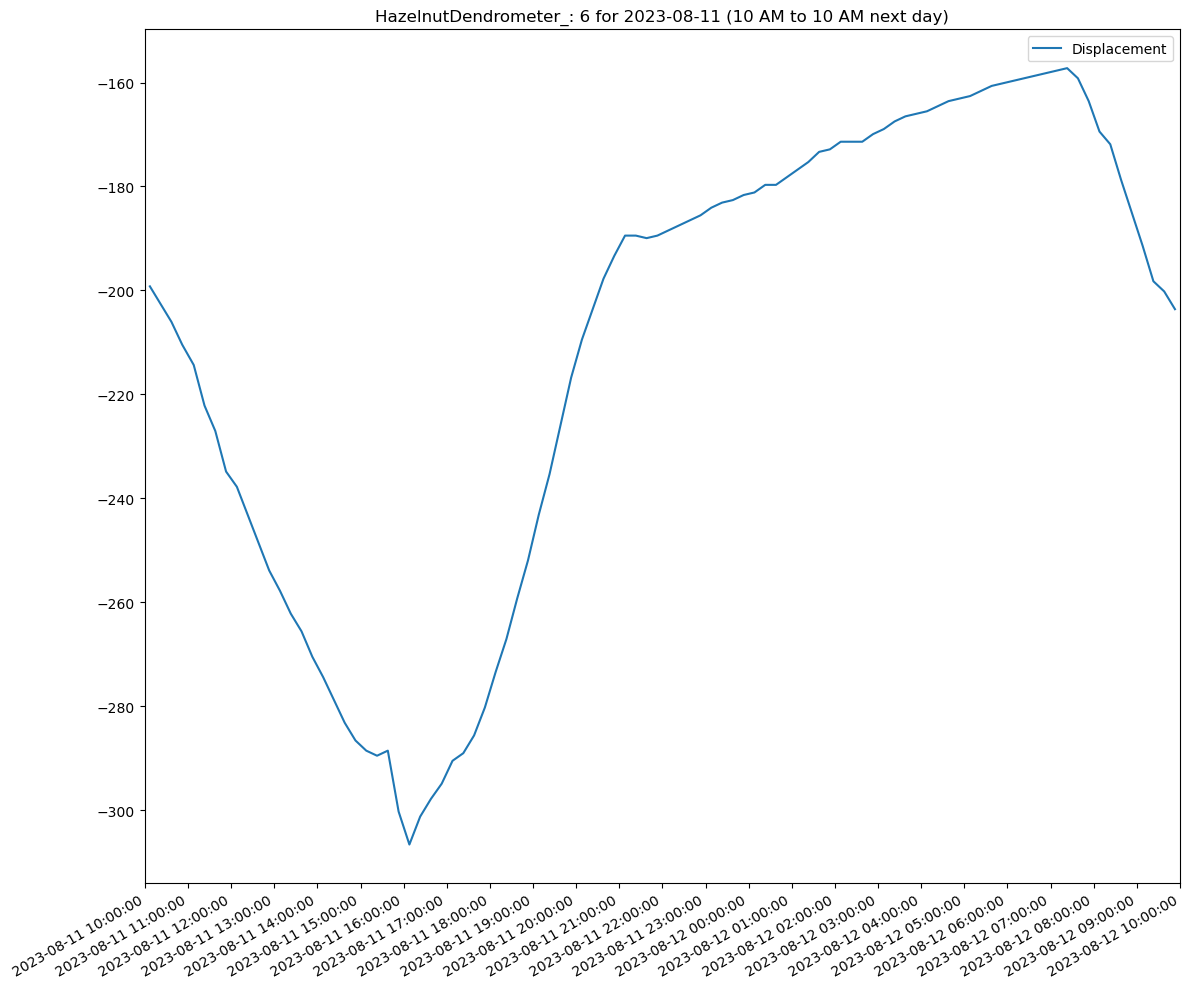

Maximum um: -157.2265625
Maximum um time: 2023-08-12 07:23:00
Minimum um: -306.640625
Minimum um time: 2023-08-11 16:08:00
Range of Displacement: 149.4140625


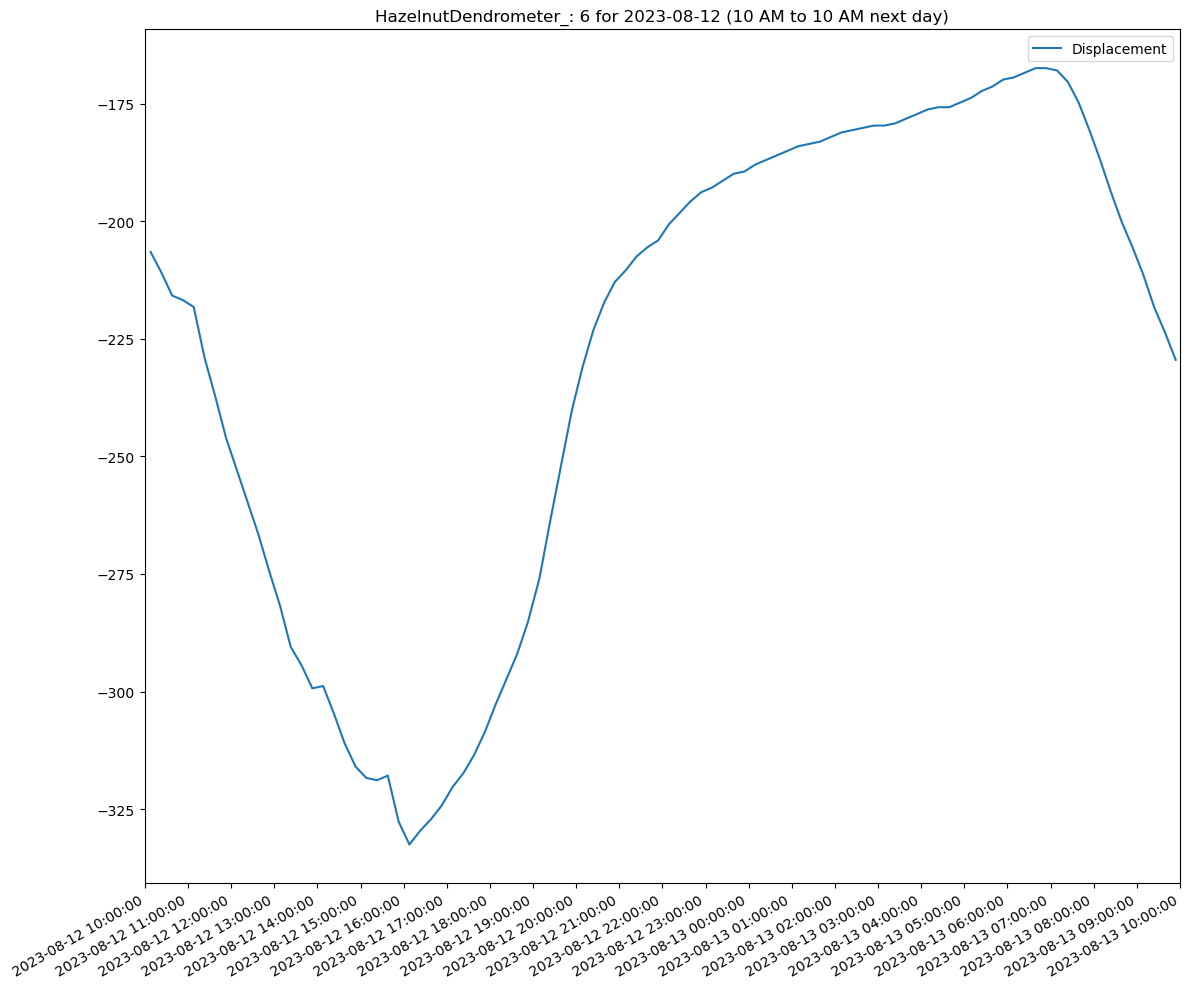

Maximum um: -167.4804688
Maximum um time: 2023-08-13 06:39:00
Minimum um: -332.5195313
Minimum um time: 2023-08-12 16:08:00
Range of Displacement: 165.03906249999997


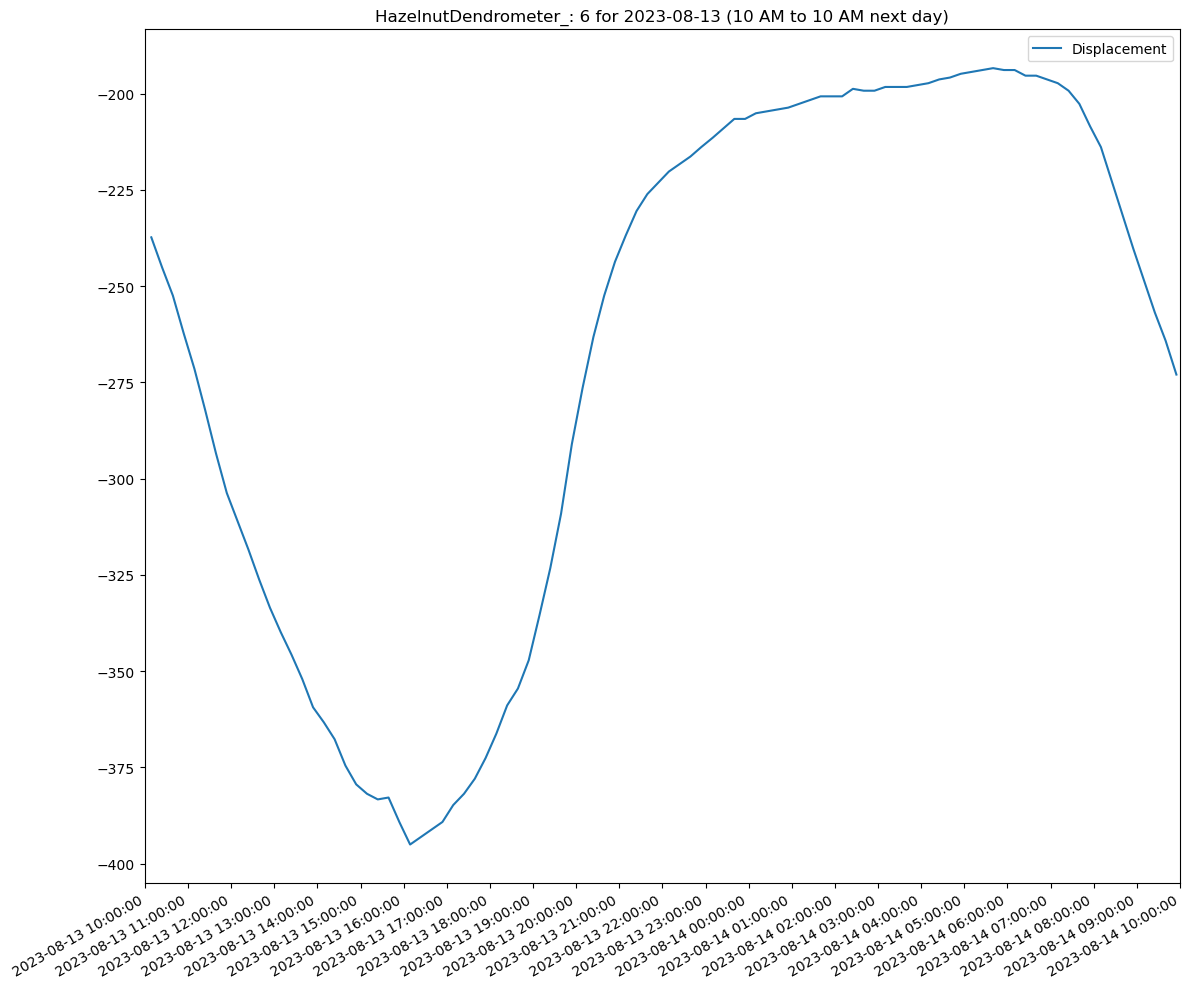

Maximum um: -193.359375
Maximum um time: 2023-08-14 05:40:00
Minimum um: -395.0195313
Minimum um time: 2023-08-13 16:09:00
Range of Displacement: 201.66015629999998


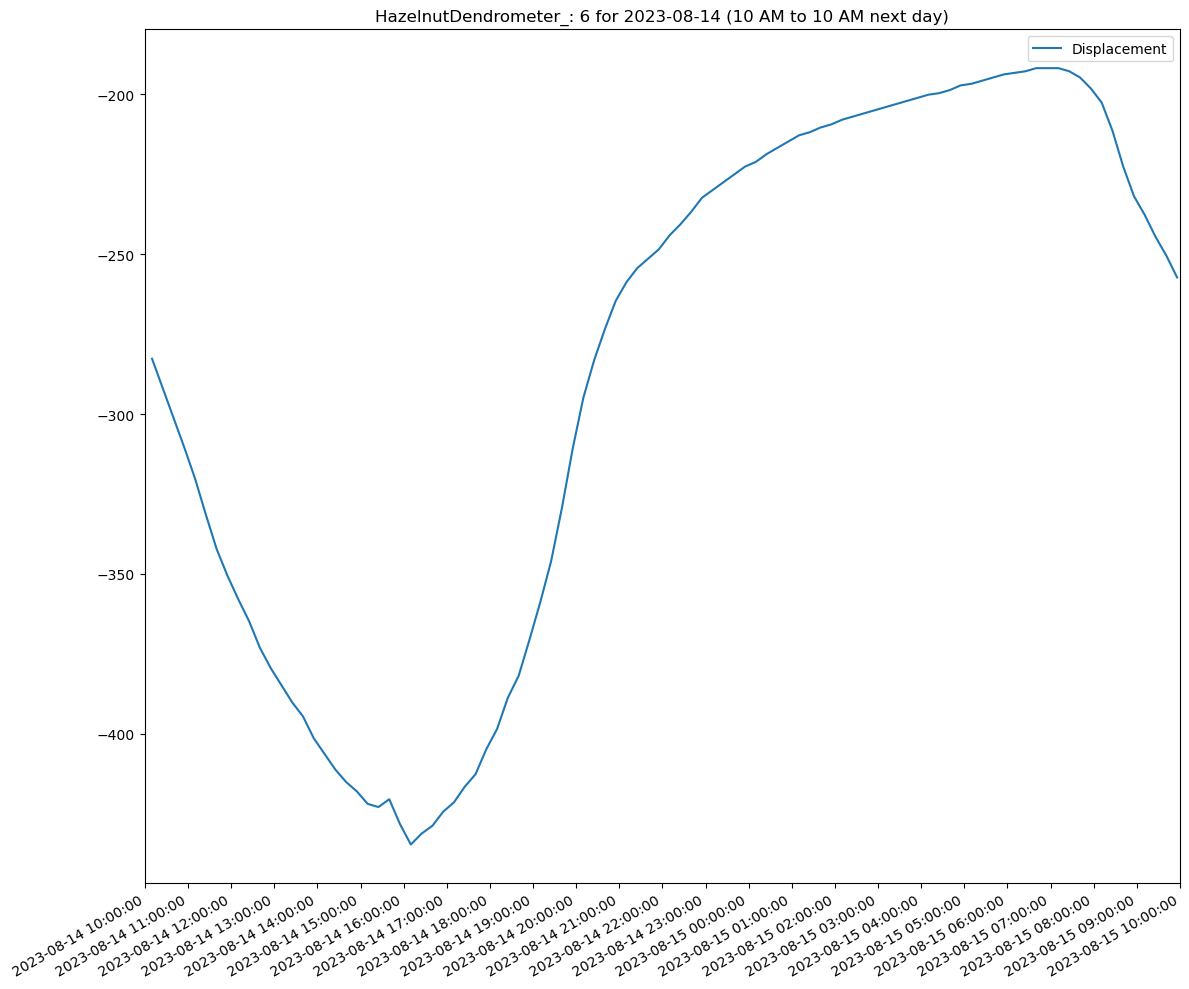

Maximum um: -191.8945313
Maximum um time: 2023-08-15 06:40:00
Minimum um: -434.5703125
Minimum um time: 2023-08-14 16:10:00
Range of Displacement: 242.6757812


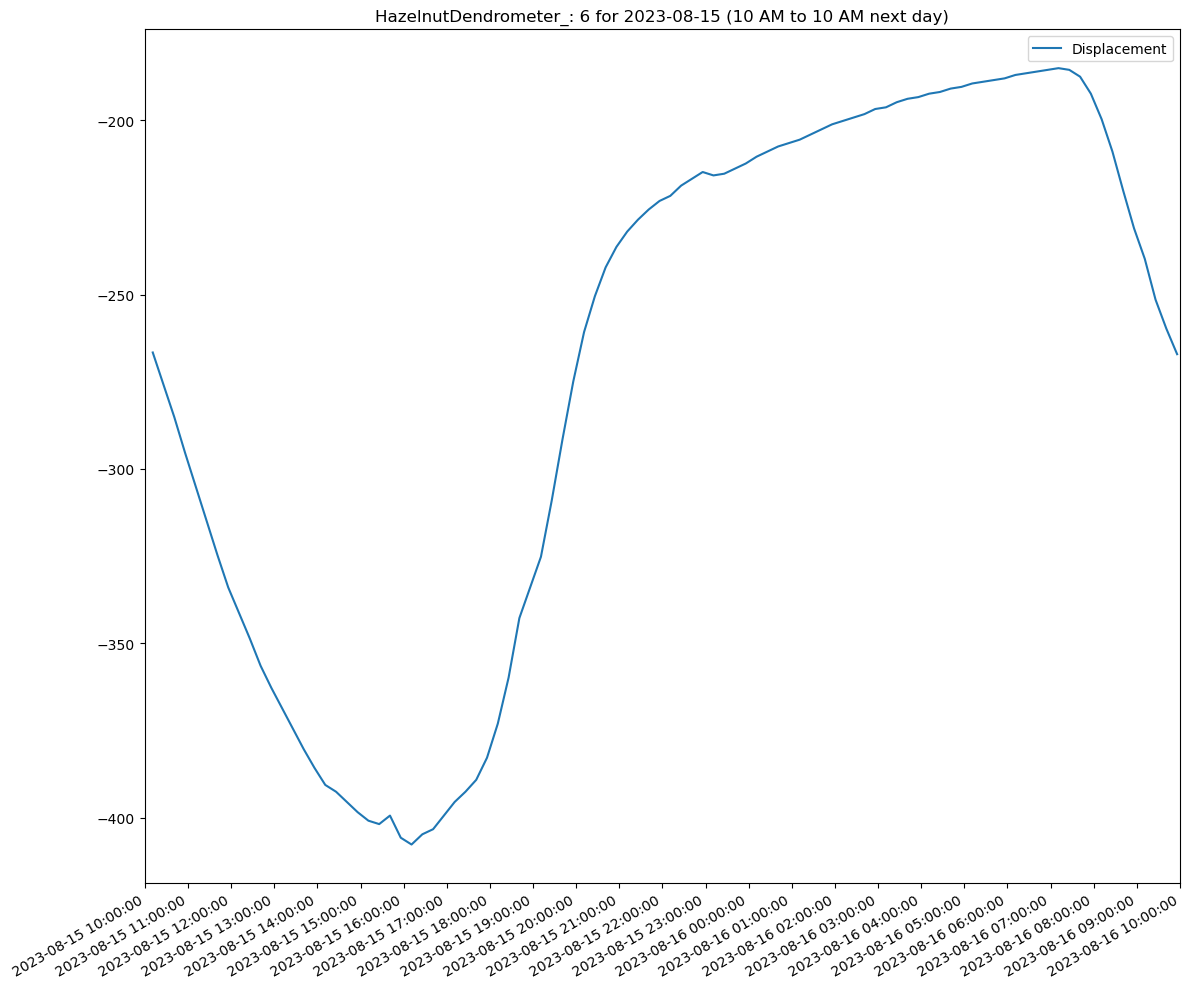

Maximum um: -185.0585938
Maximum um time: 2023-08-16 07:11:00
Minimum um: -407.7148438
Minimum um time: 2023-08-15 16:11:00
Range of Displacement: 222.65624999999997


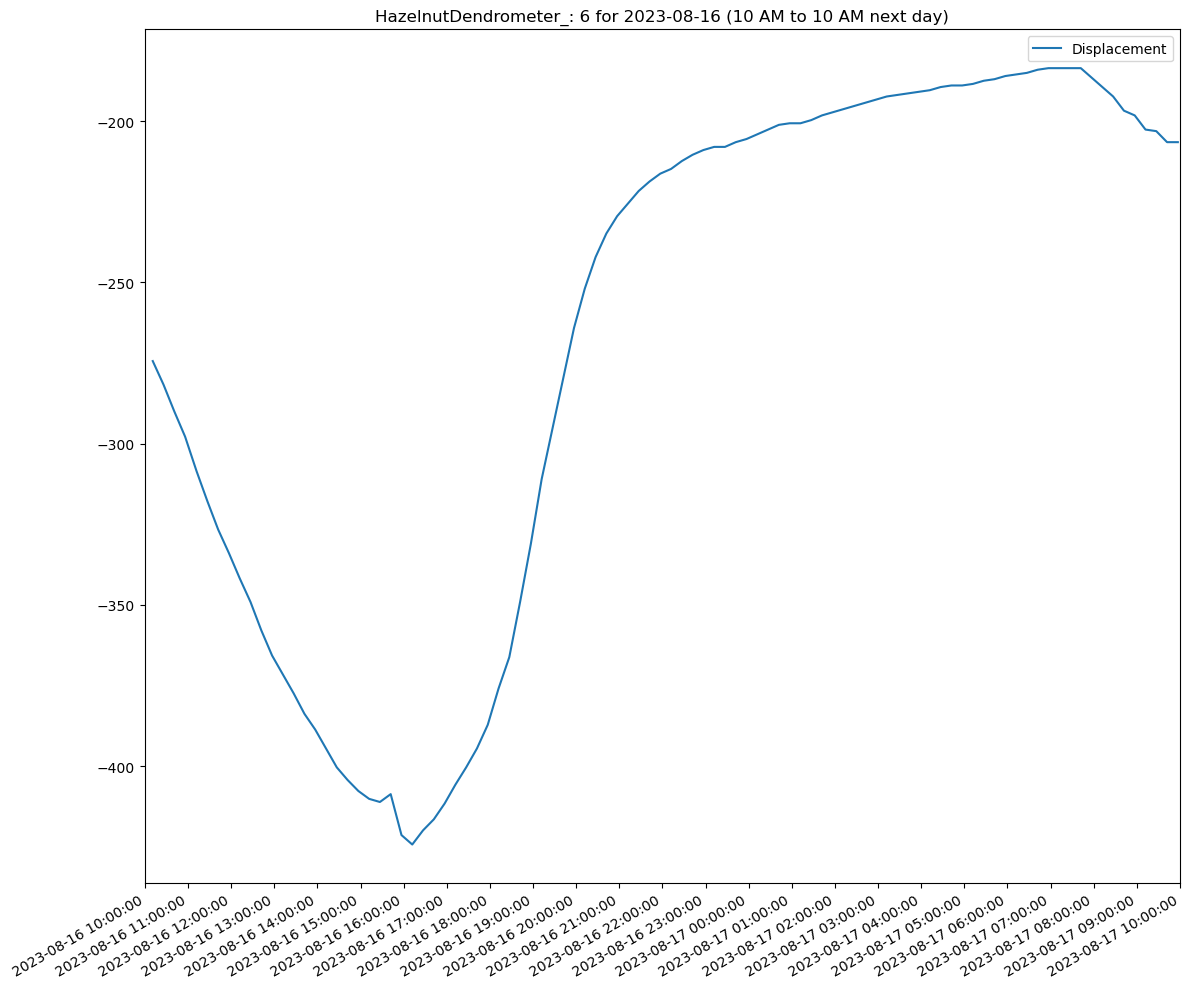

Maximum um: -183.59375
Maximum um time: 2023-08-17 06:57:00
Minimum um: -424.3164063
Minimum um time: 2023-08-16 16:12:00
Range of Displacement: 240.72265629999998


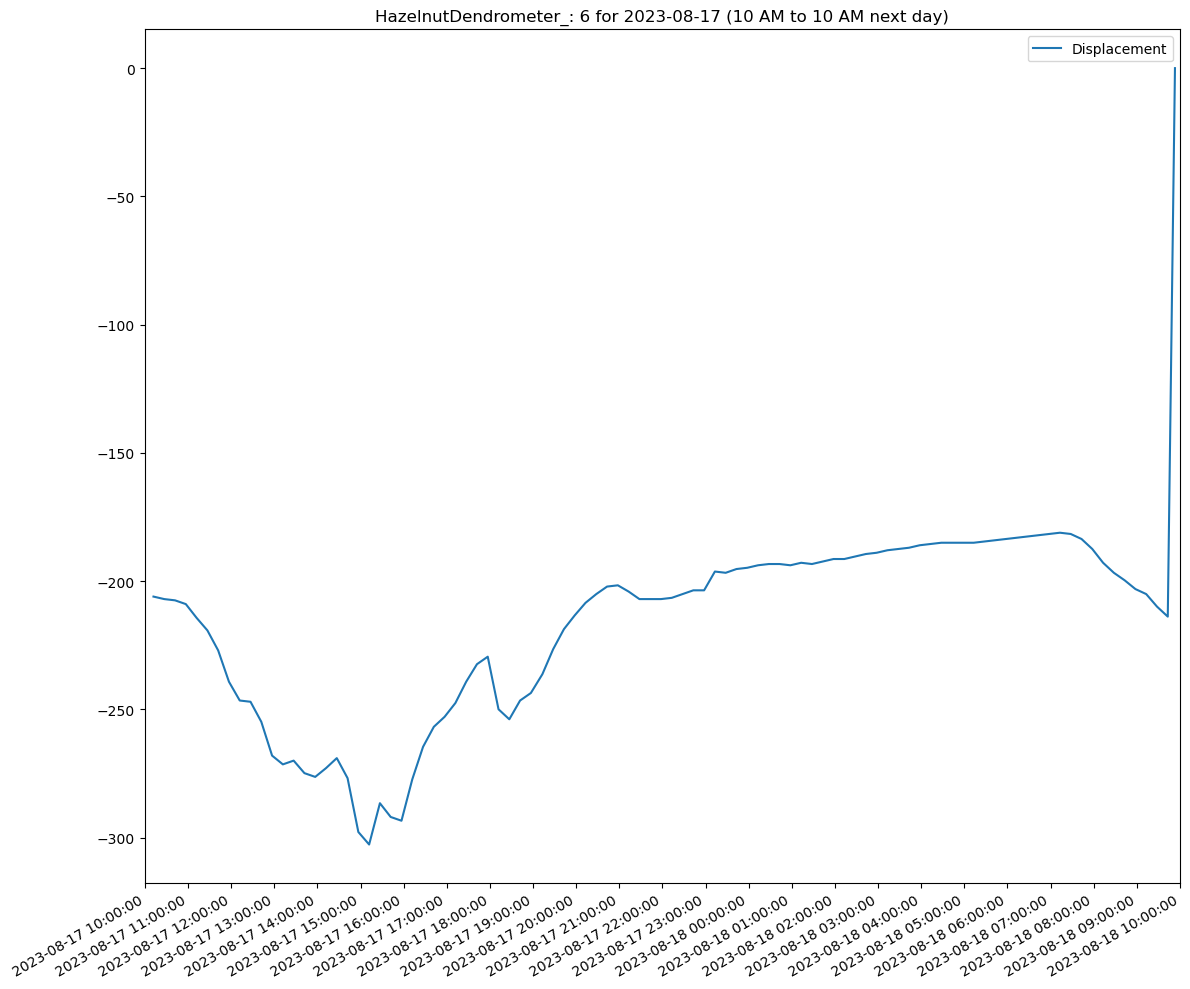

Maximum um: 0.0
Maximum um time: 2023-08-18 09:53:00
Minimum um: -302.734375
Minimum um time: 2023-08-17 15:12:00
Range of Displacement: 302.734375


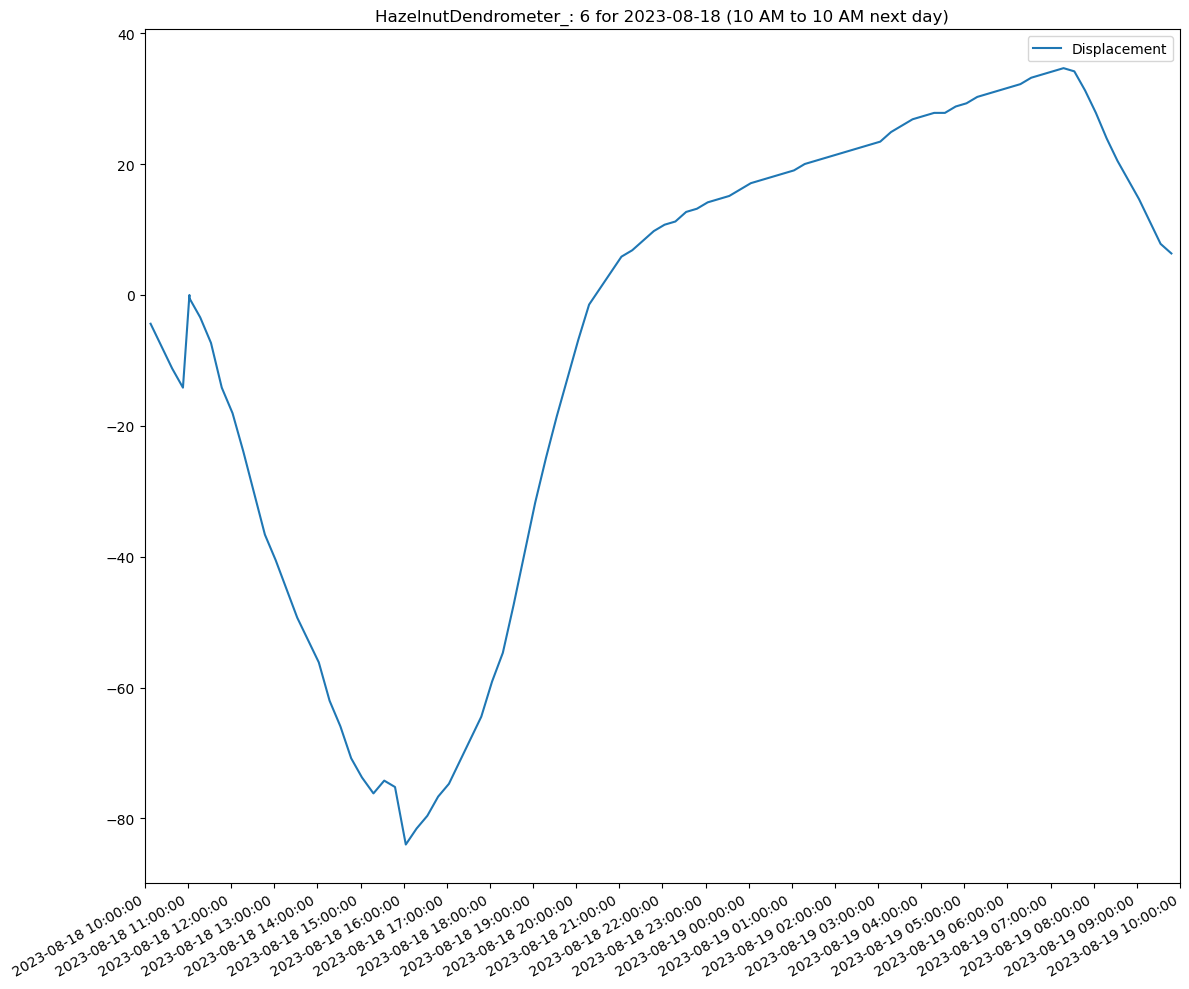

Maximum um: 34.66796875
Maximum um time: 2023-08-19 07:18:00
Minimum um: -83.984375
Minimum um time: 2023-08-18 16:03:00
Range of Displacement: 118.65234375


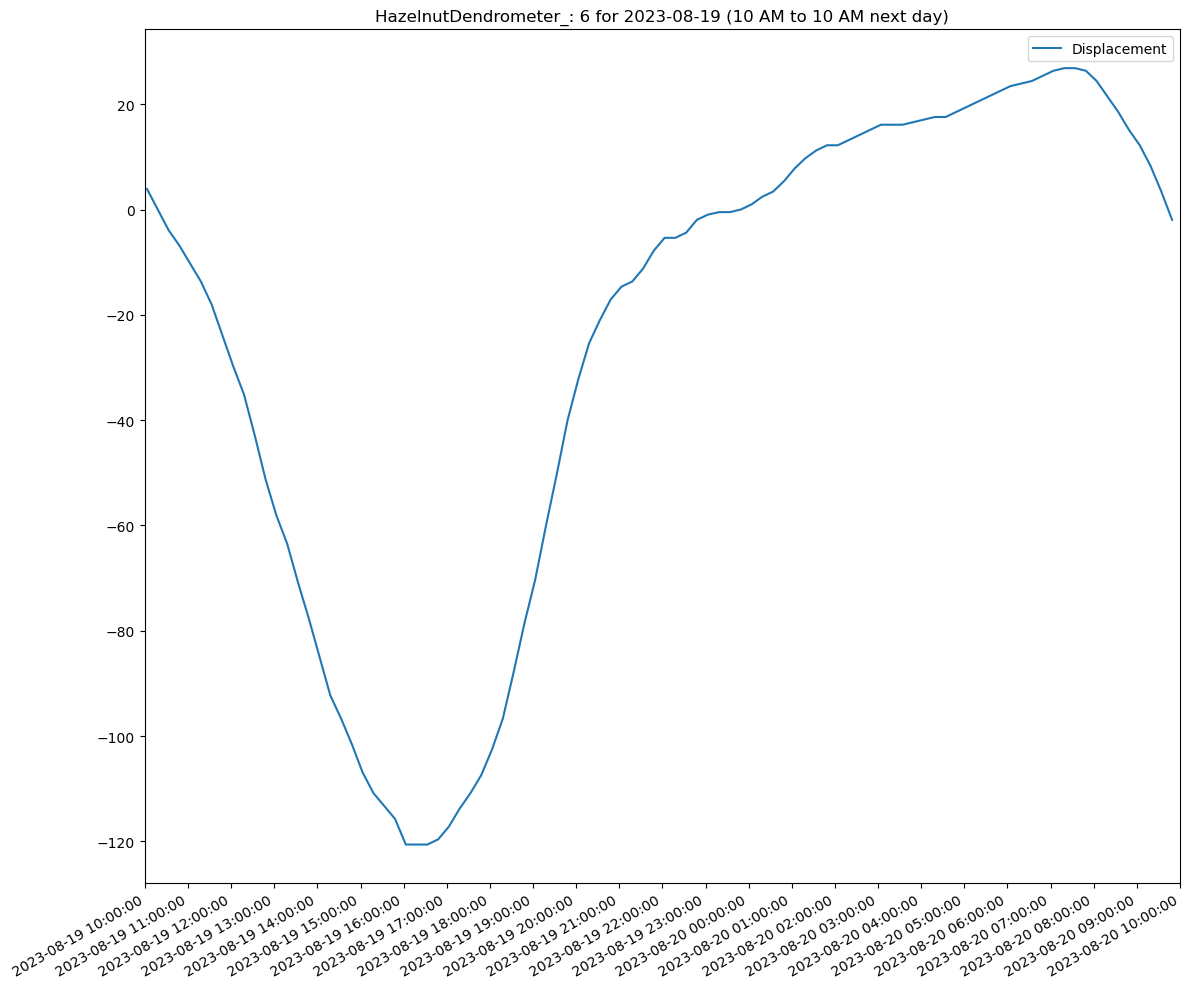

Maximum um: 26.85546875
Maximum um time: 2023-08-20 07:19:00
Minimum um: -120.6054688
Minimum um time: 2023-08-19 16:03:00
Range of Displacement: 147.46093754999998


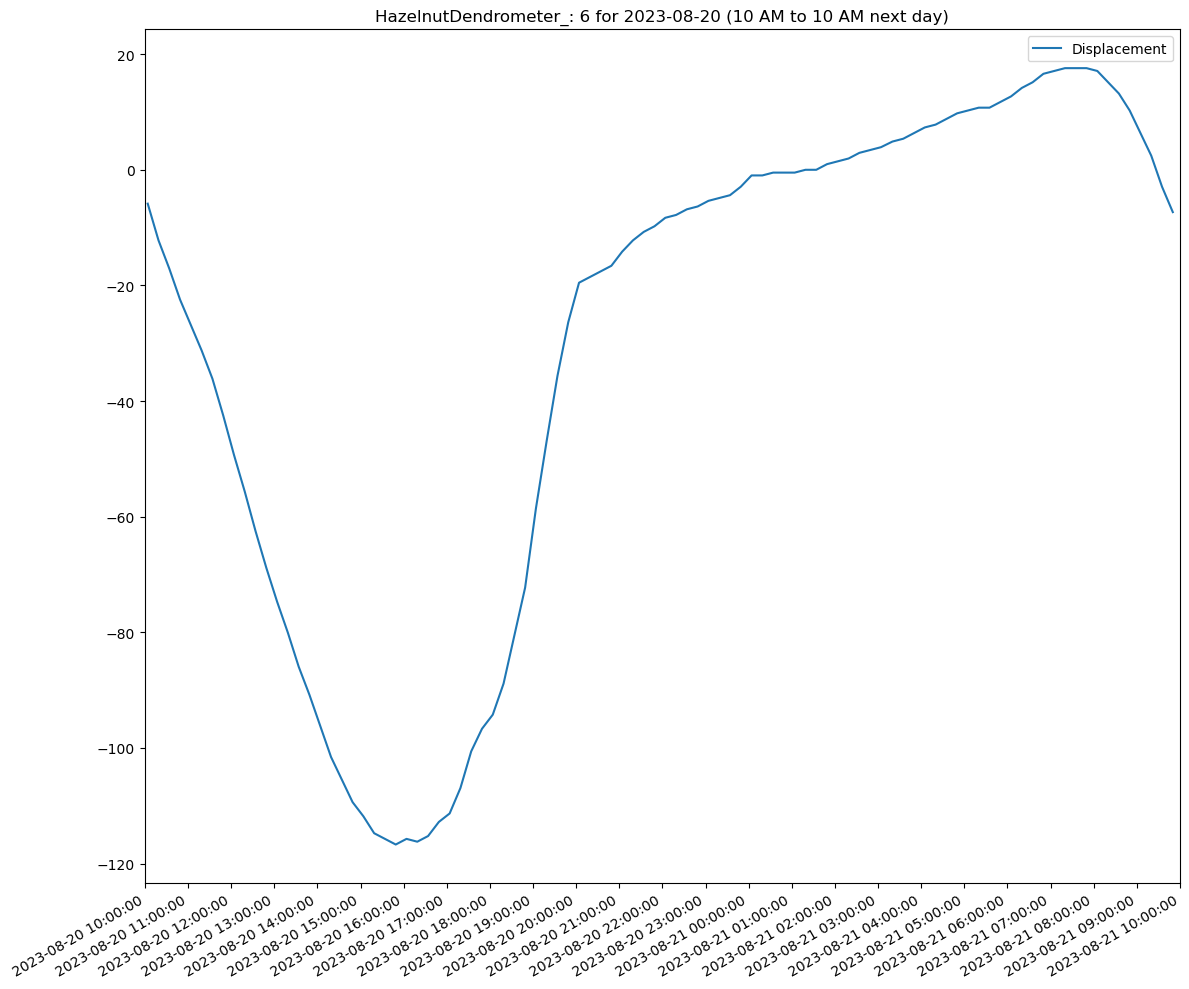

Maximum um: 17.578125
Maximum um time: 2023-08-21 07:20:00
Minimum um: -116.6992188
Minimum um time: 2023-08-20 15:49:00
Range of Displacement: 134.27734379999998


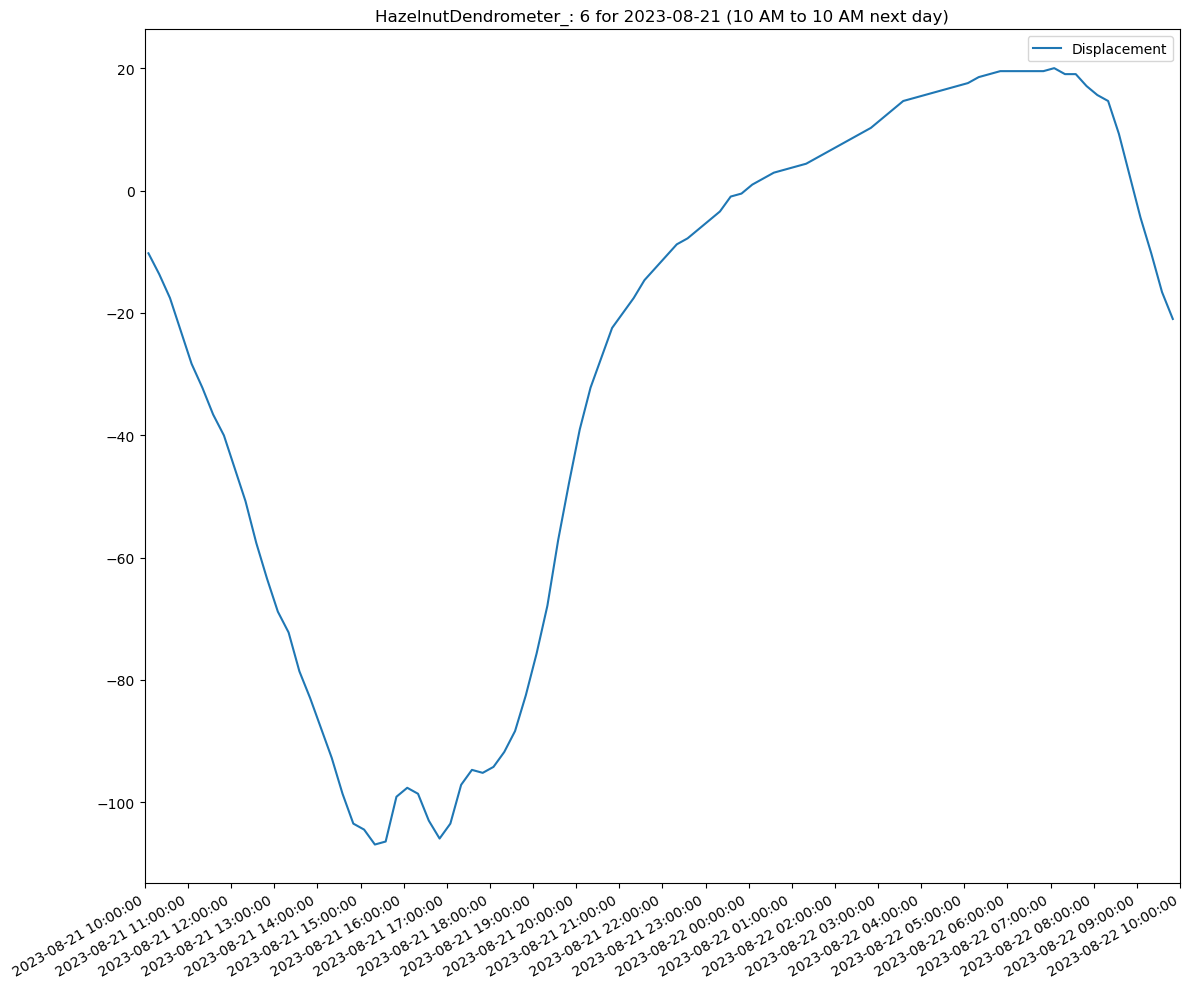

Maximum um: 20.01953125
Maximum um time: 2023-08-22 07:05:00
Minimum um: -106.9335938
Minimum um time: 2023-08-21 15:20:00
Range of Displacement: 126.95312505


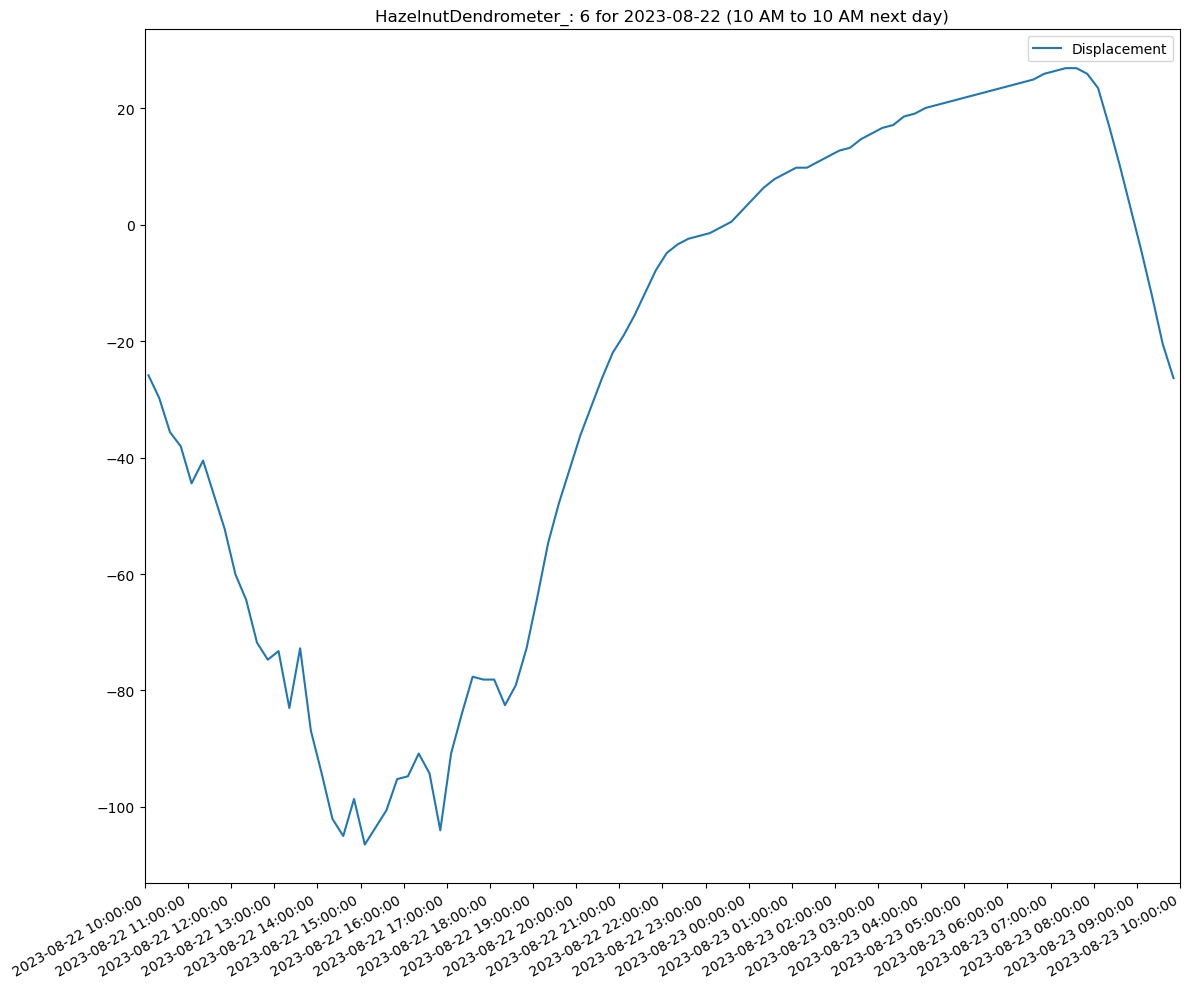

Maximum um: 26.85546875
Maximum um time: 2023-08-23 07:21:00
Minimum um: -106.4453125
Minimum um time: 2023-08-22 15:06:00
Range of Displacement: 133.30078125


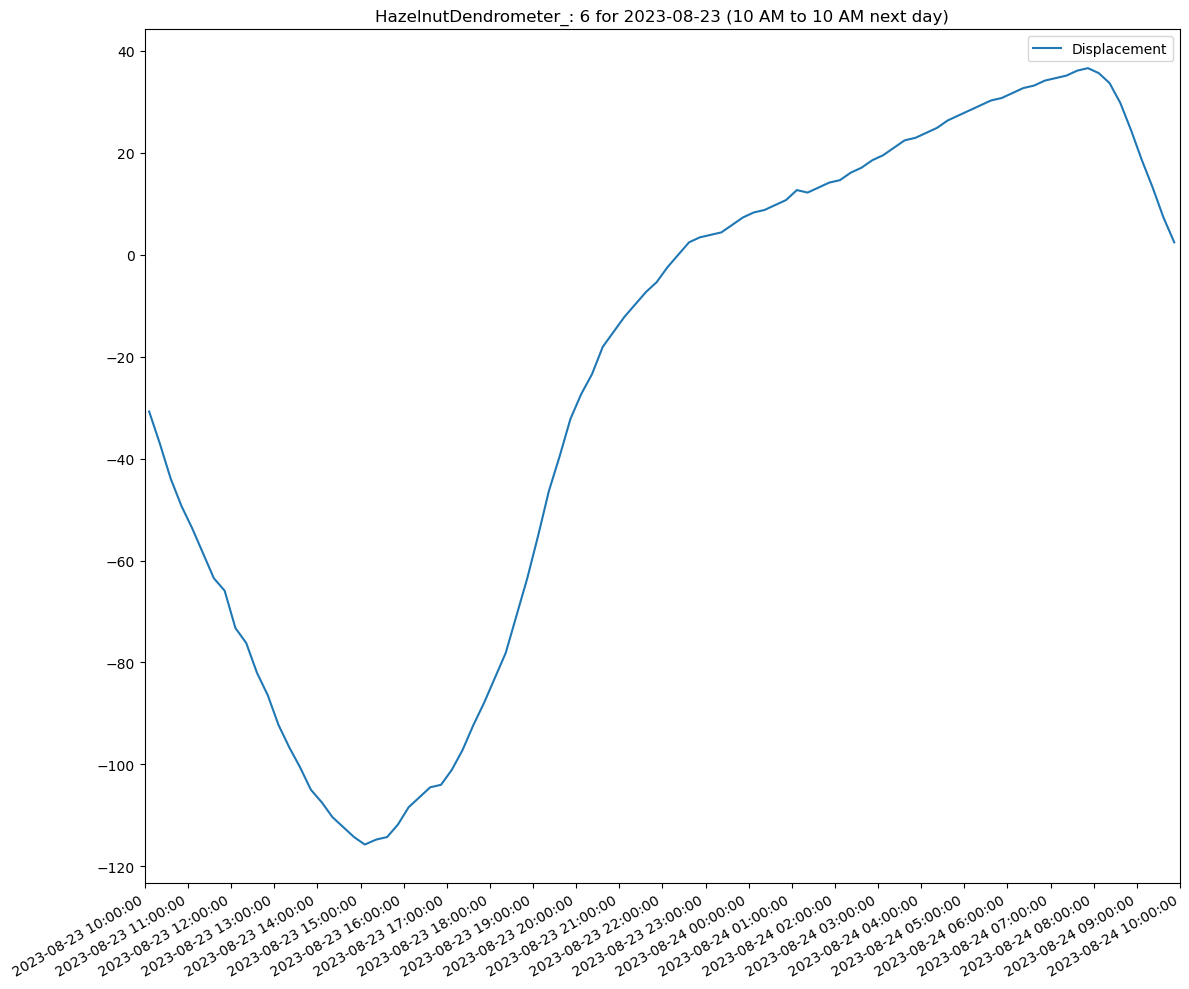

Maximum um: 36.62109375
Maximum um time: 2023-08-24 07:52:00
Minimum um: -115.7226563
Minimum um time: 2023-08-23 15:06:00
Range of Displacement: 152.34375004999998


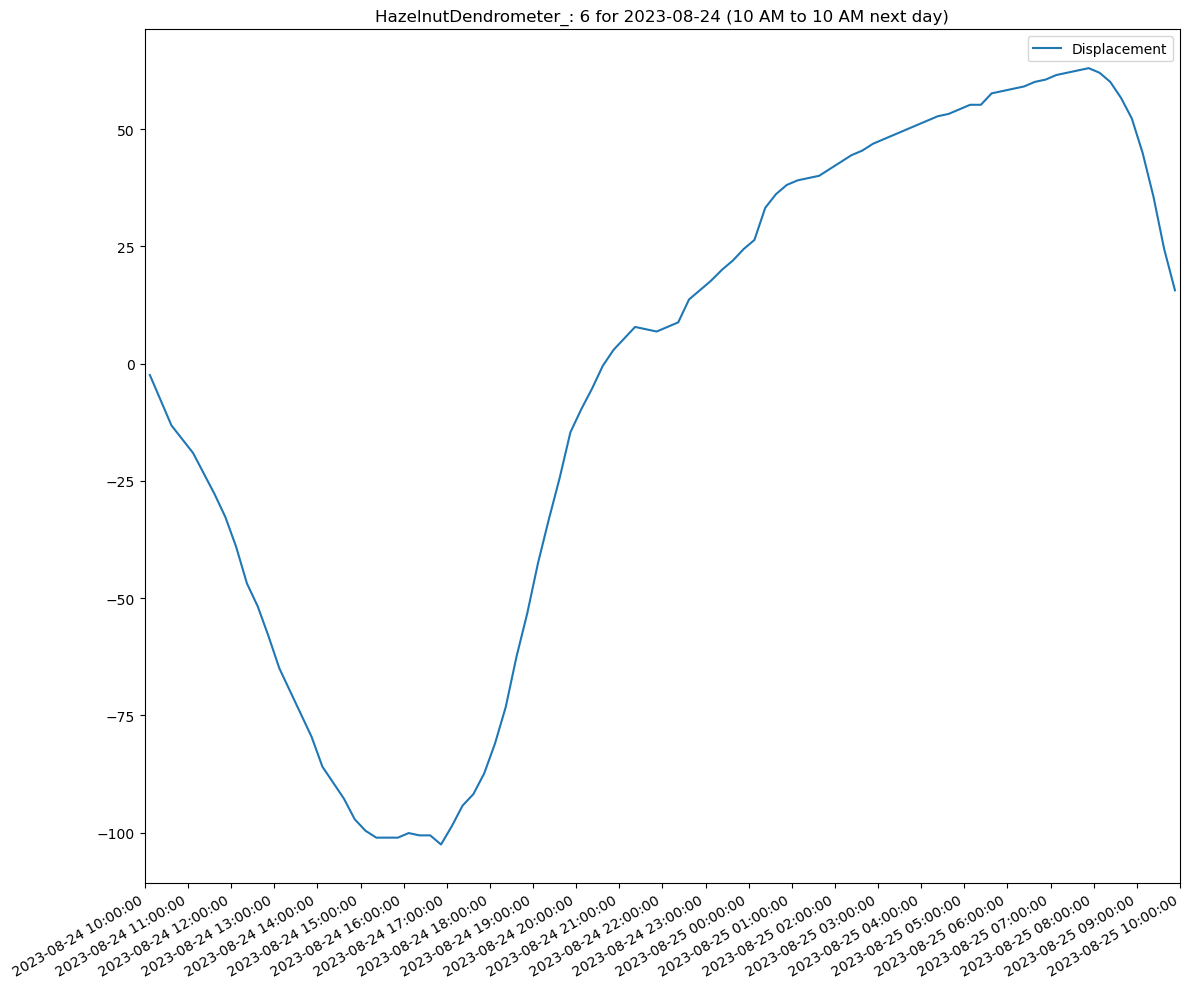

Maximum um: 62.98828125
Maximum um time: 2023-08-25 07:53:00
Minimum um: -102.5390625
Minimum um time: 2023-08-24 16:52:00
Range of Displacement: 165.52734375


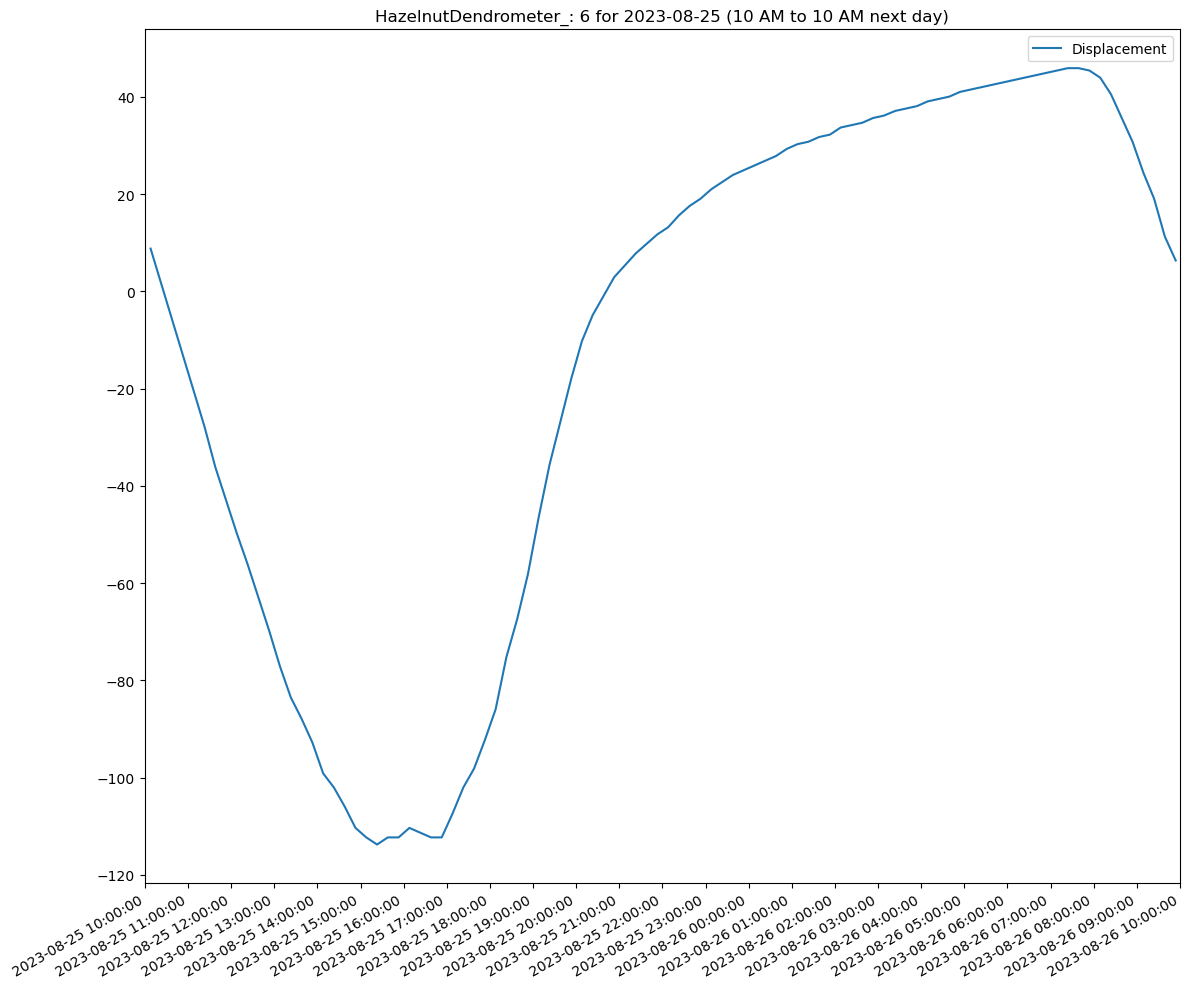

Maximum um: 45.8984375
Maximum um time: 2023-08-26 07:24:00
Minimum um: -113.7695313
Minimum um time: 2023-08-25 15:23:00
Range of Displacement: 159.66796879999998


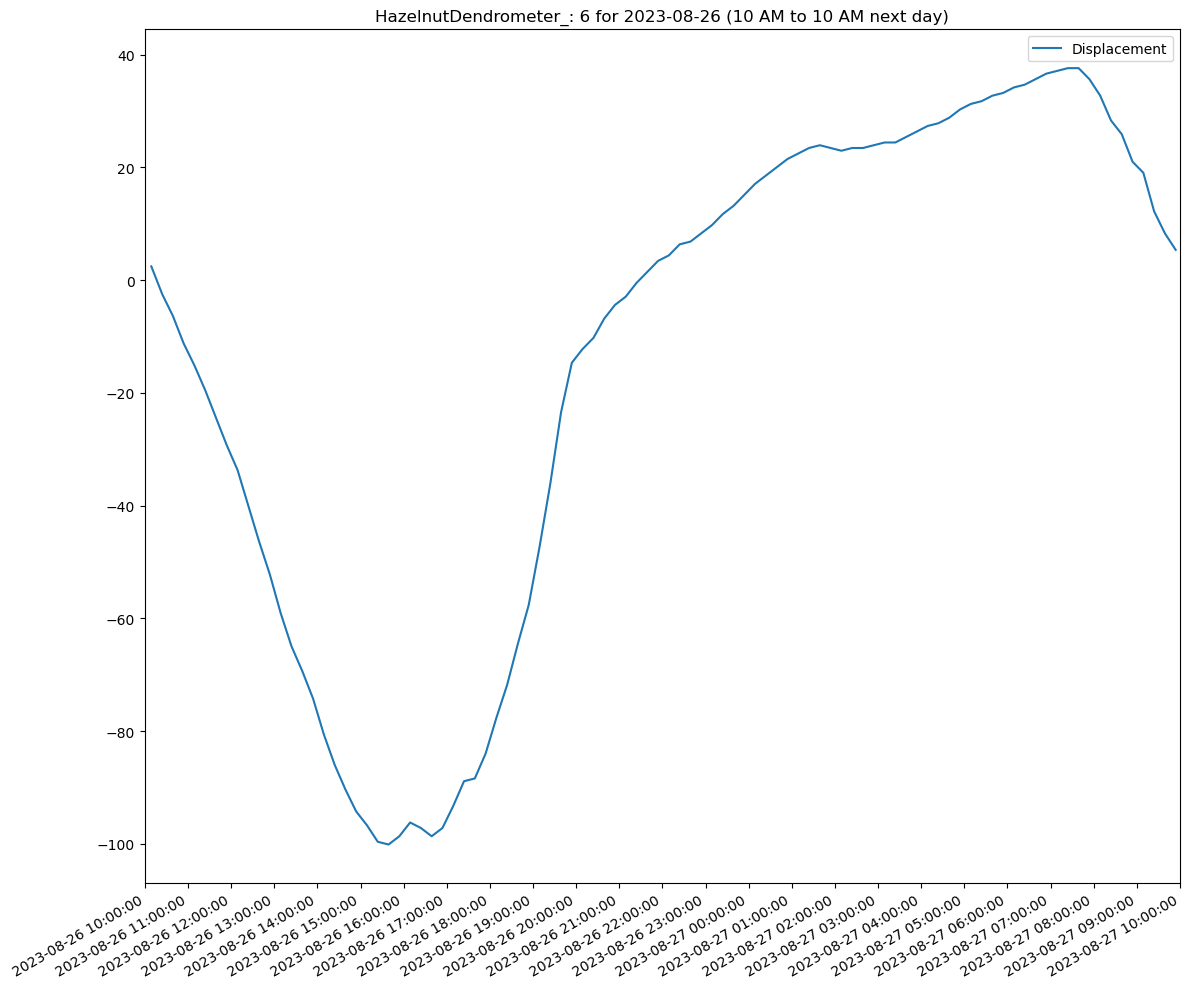

Maximum um: 37.59765625
Maximum um time: 2023-08-27 07:24:00
Minimum um: -100.0976563
Minimum um time: 2023-08-26 15:39:00
Range of Displacement: 137.69531254999998


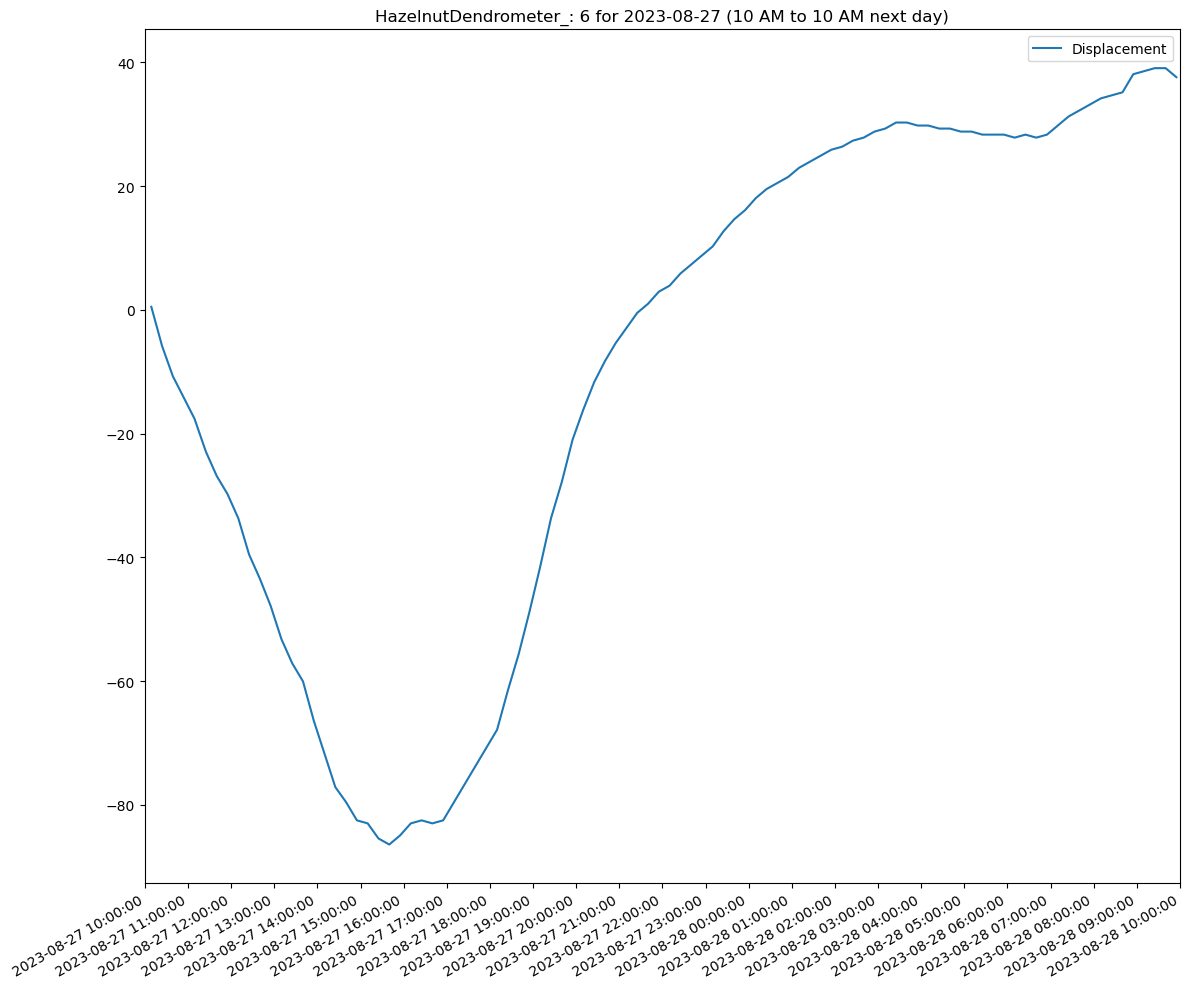

Maximum um: 39.0625
Maximum um time: 2023-08-28 09:25:00
Minimum um: -86.42578125
Minimum um time: 2023-08-27 15:40:00
Range of Displacement: 125.48828125


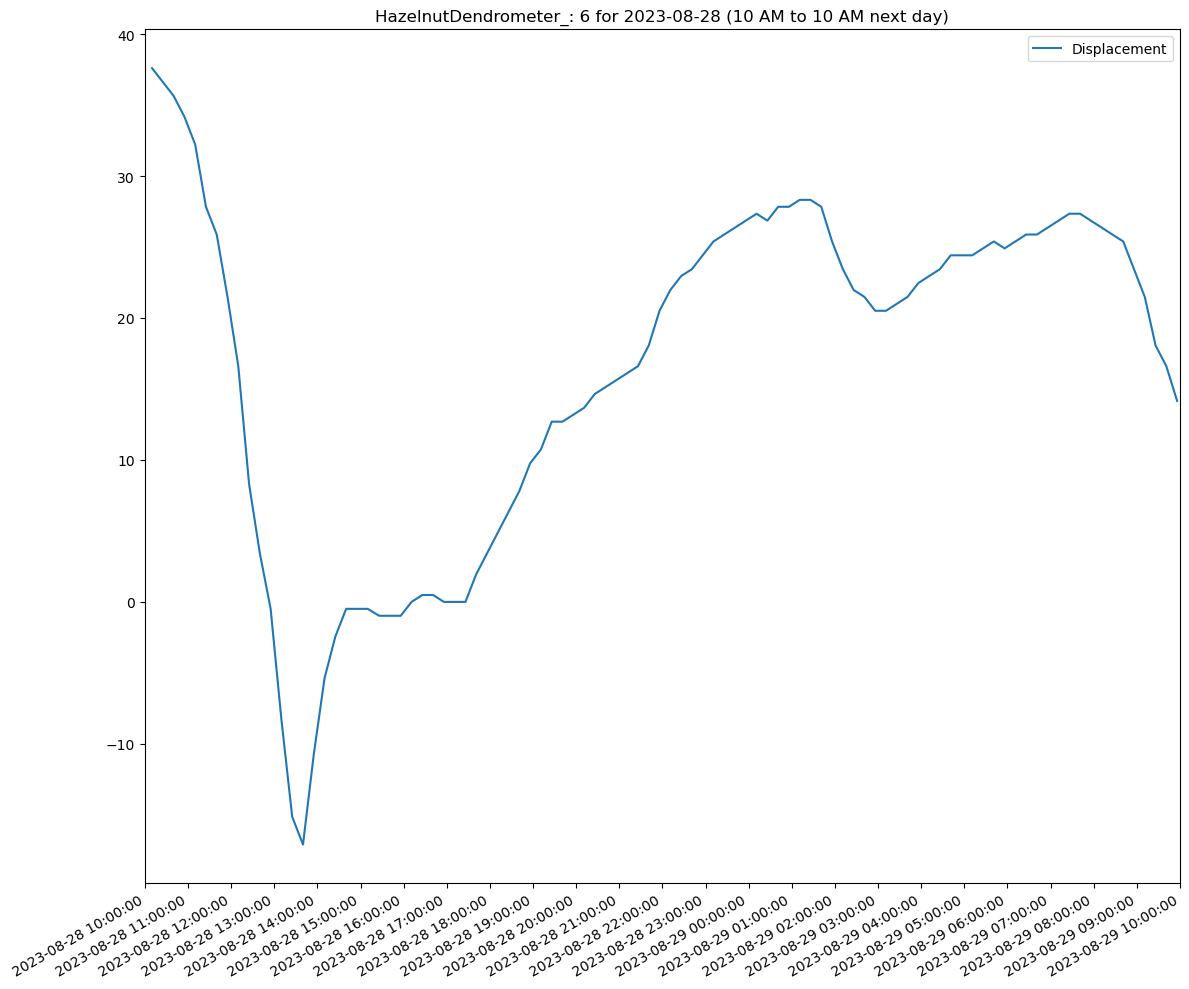

Maximum um: 37.59765625
Maximum um time: 2023-08-28 10:10:00
Minimum um: -17.08984375
Minimum um time: 2023-08-28 13:40:00
Range of Displacement: 54.6875


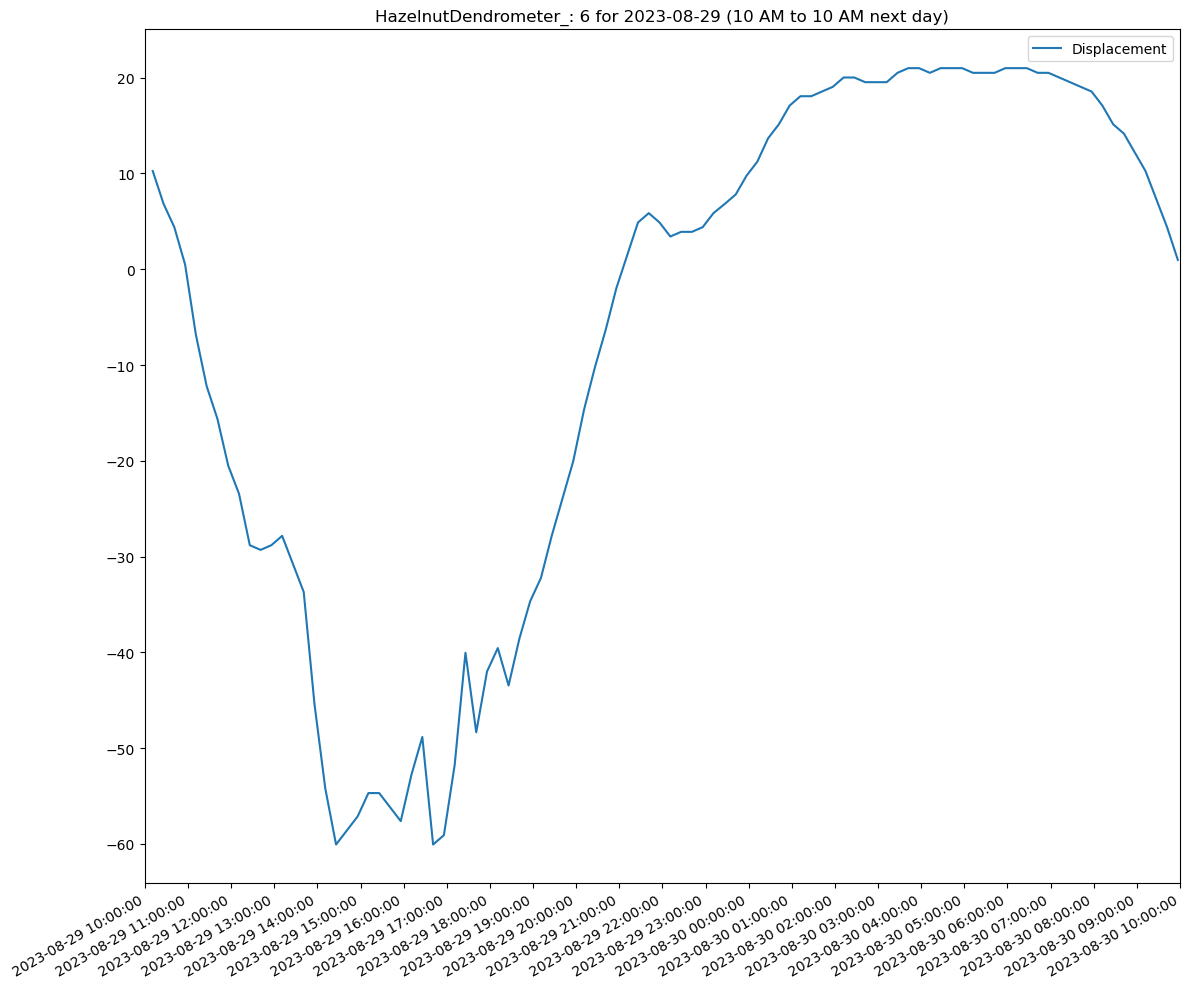

Maximum um: 20.99609375
Maximum um time: 2023-08-30 03:42:00
Minimum um: -60.05859375
Minimum um time: 2023-08-29 14:26:00
Range of Displacement: 81.0546875


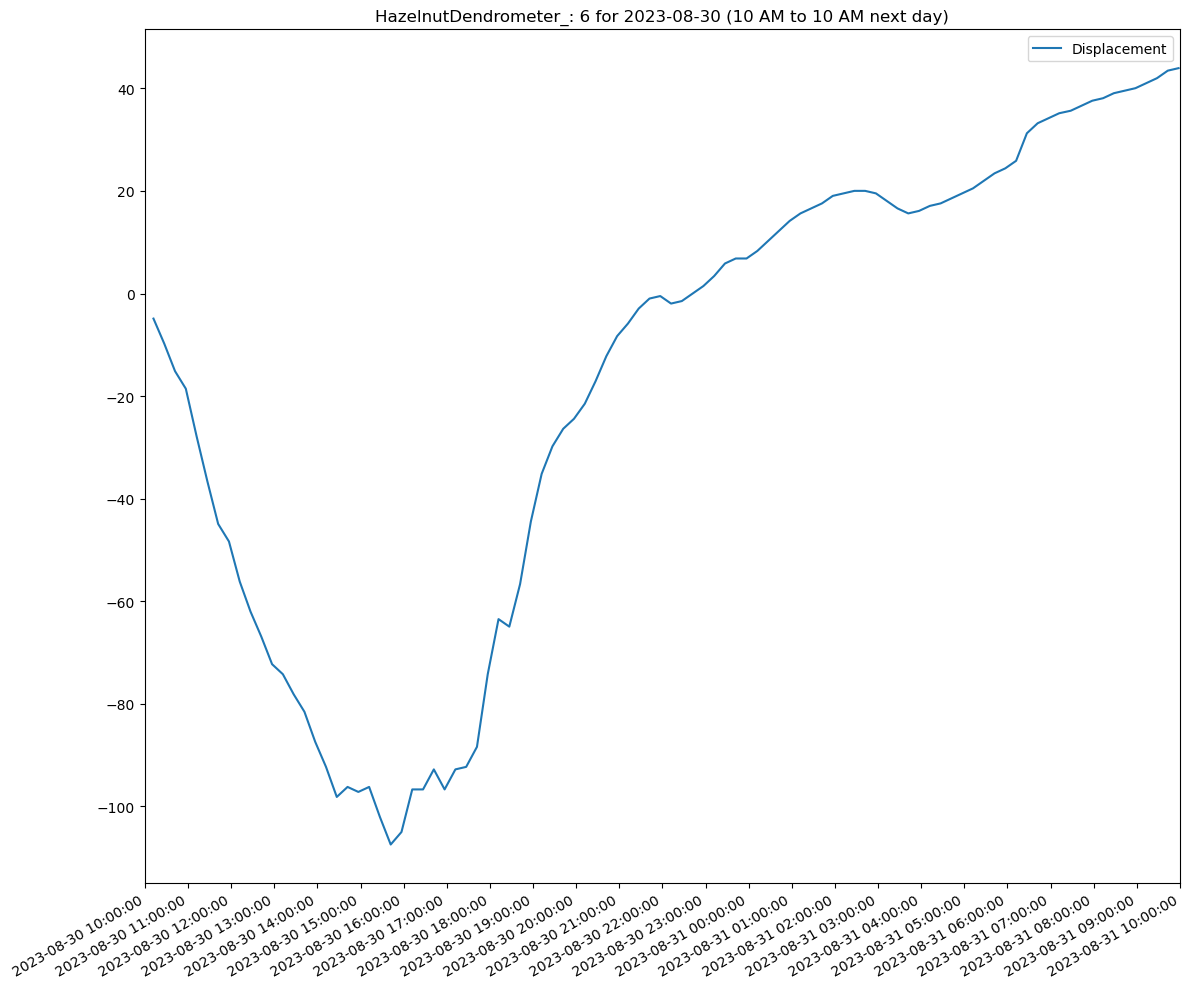

Maximum um: 43.9453125
Maximum um time: 2023-08-31 09:58:00
Minimum um: -107.421875
Minimum um time: 2023-08-30 15:42:00
Range of Displacement: 151.3671875


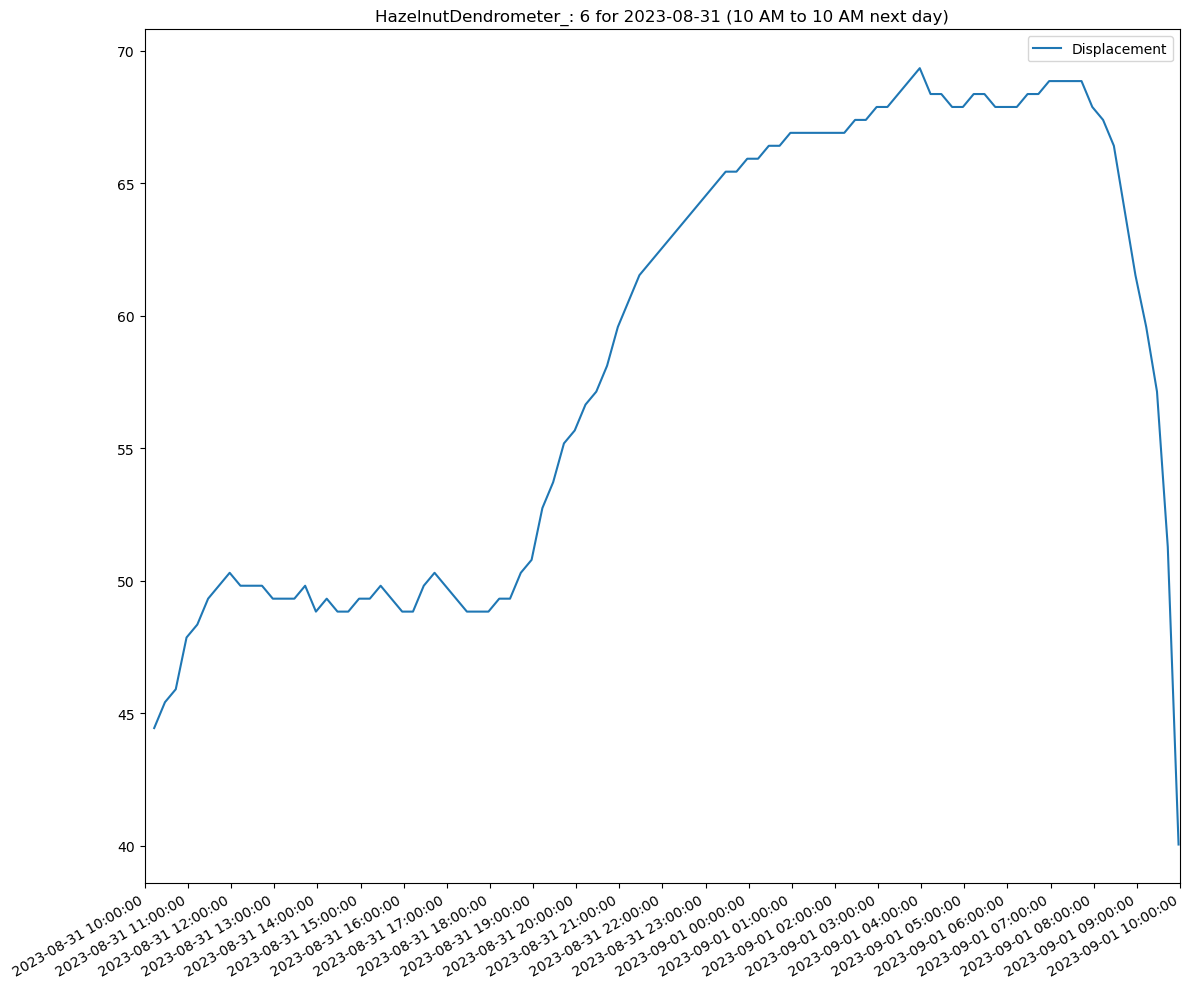

Maximum um: 69.3359375
Maximum um time: 2023-09-01 03:58:00
Minimum um: 40.0390625
Minimum um time: 2023-09-01 09:58:00
Range of Displacement: 29.296875


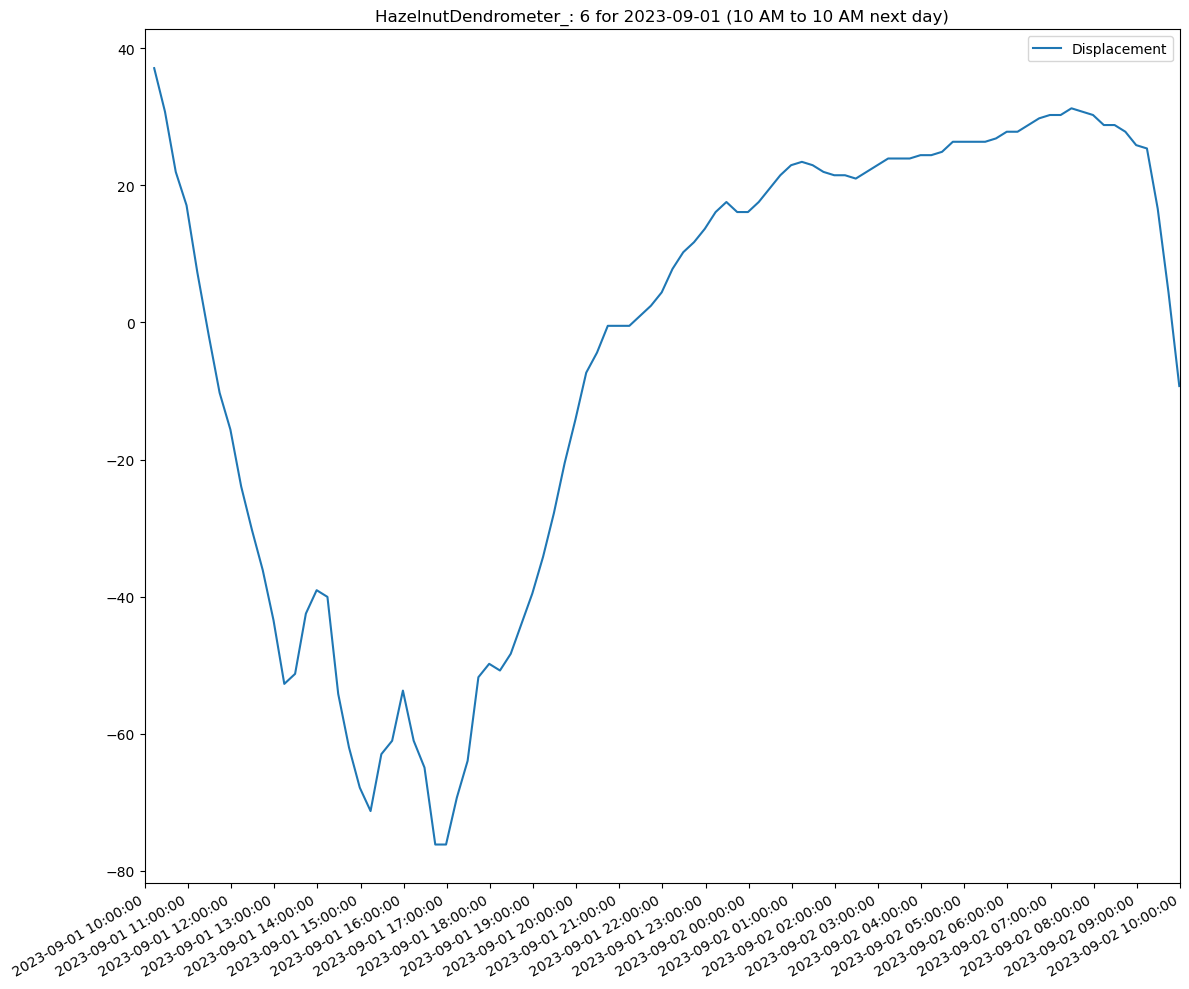

Maximum um: 37.109375
Maximum um time: 2023-09-01 10:13:00
Minimum um: -76.171875
Minimum um time: 2023-09-01 16:44:00
Range of Displacement: 113.28125


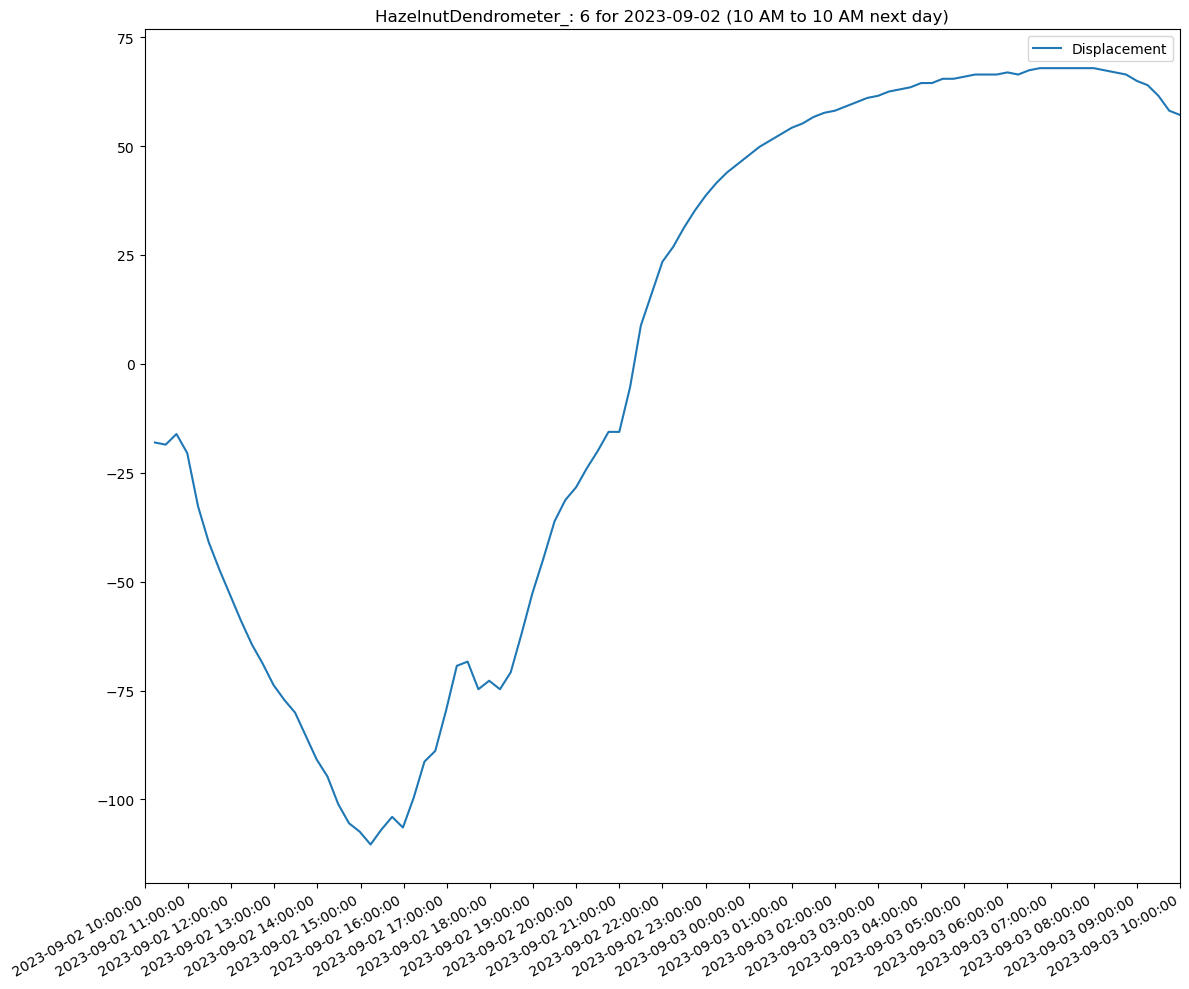

Maximum um: 67.87109375
Maximum um time: 2023-09-03 06:45:00
Minimum um: -110.3515625
Minimum um time: 2023-09-02 15:14:00
Range of Displacement: 178.22265625


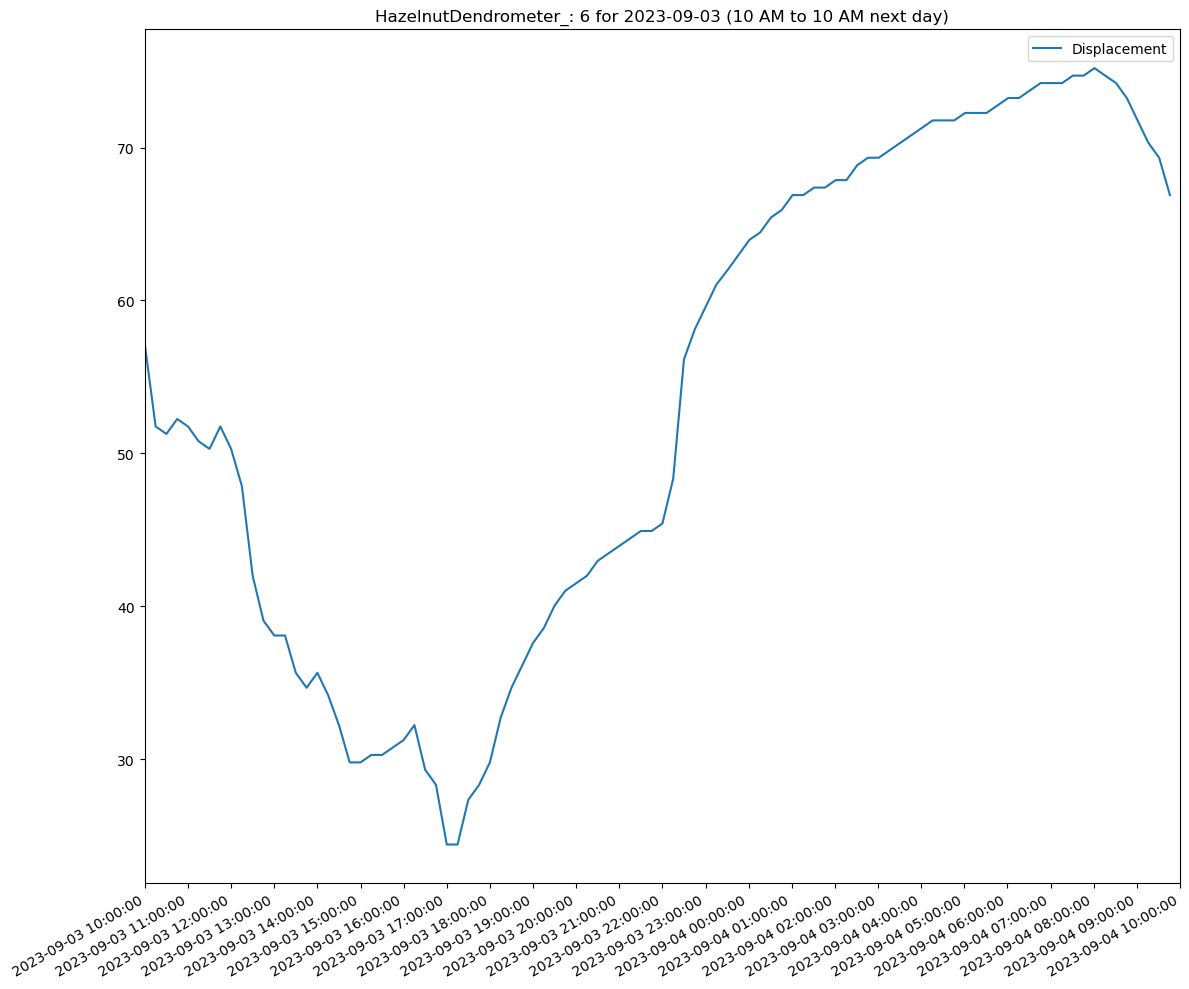

Maximum um: 75.1953125
Maximum um time: 2023-09-04 08:01:00
Minimum um: 24.4140625
Minimum um time: 2023-09-03 17:00:00
Range of Displacement: 50.78125


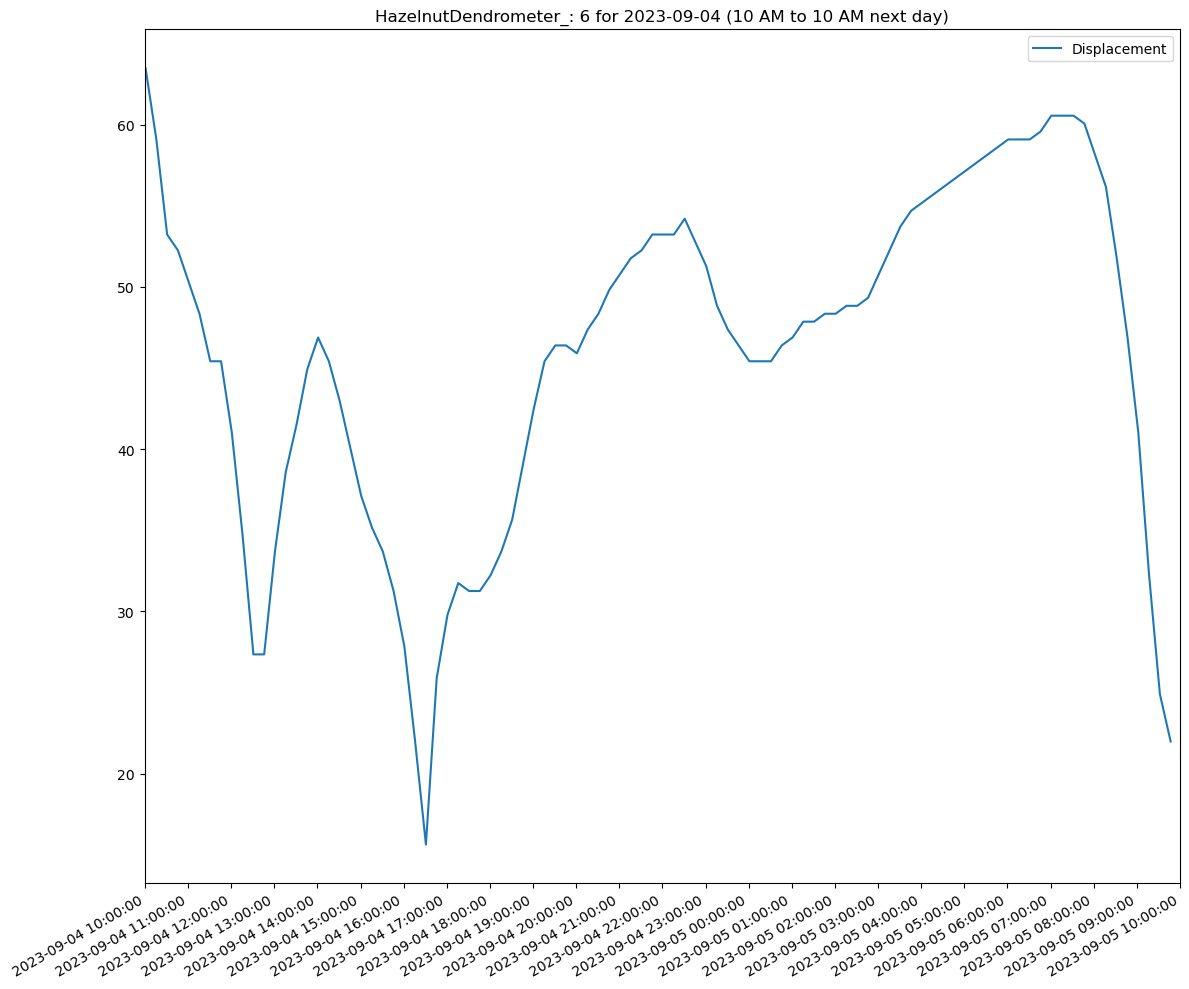

Maximum um: 63.4765625
Maximum um time: 2023-09-04 10:01:00
Minimum um: 15.625
Minimum um time: 2023-09-04 16:31:00
Range of Displacement: 47.8515625


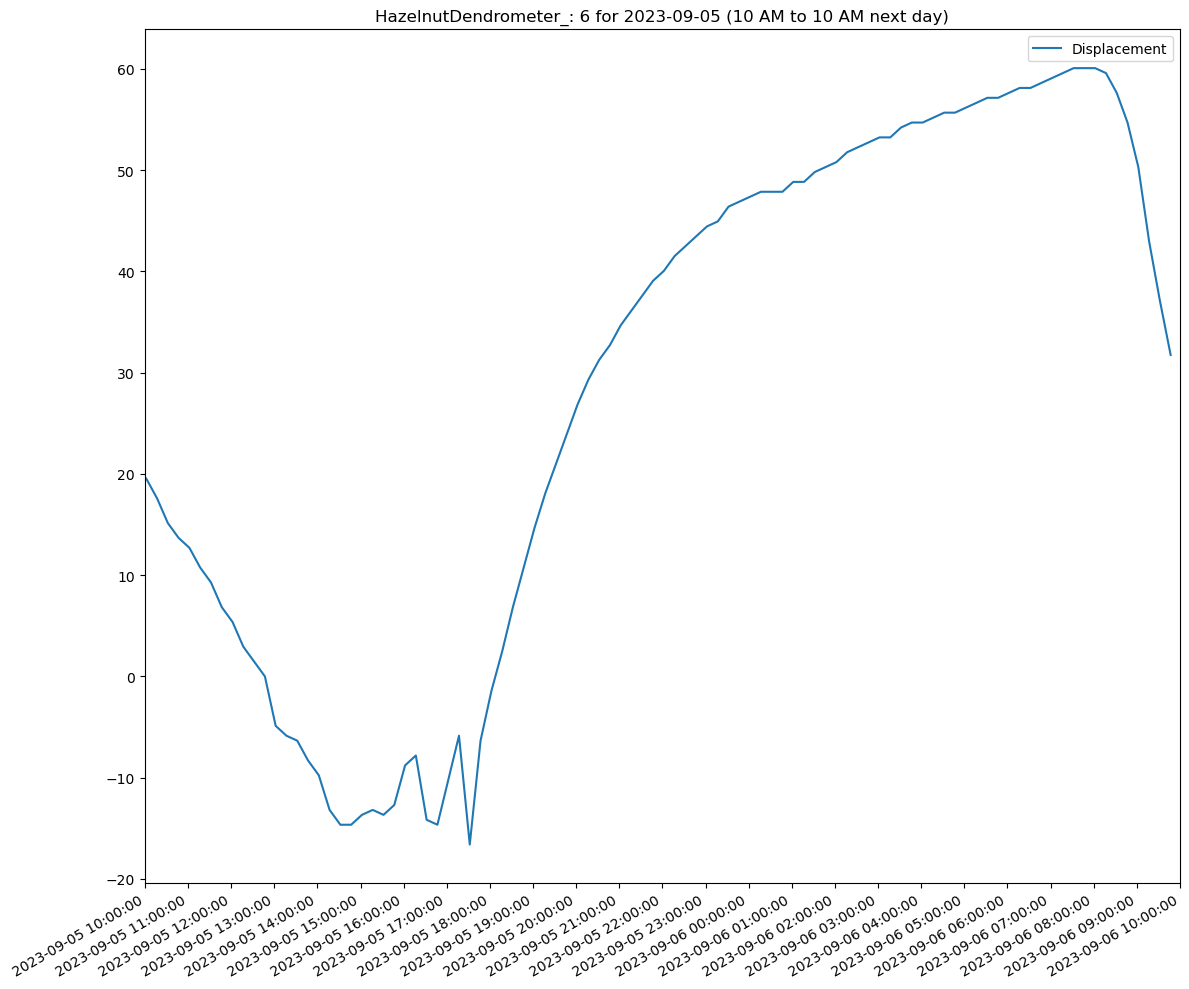

Maximum um: 60.05859375
Maximum um time: 2023-09-06 07:32:00
Minimum um: -16.6015625
Minimum um time: 2023-09-05 17:32:00
Range of Displacement: 76.66015625


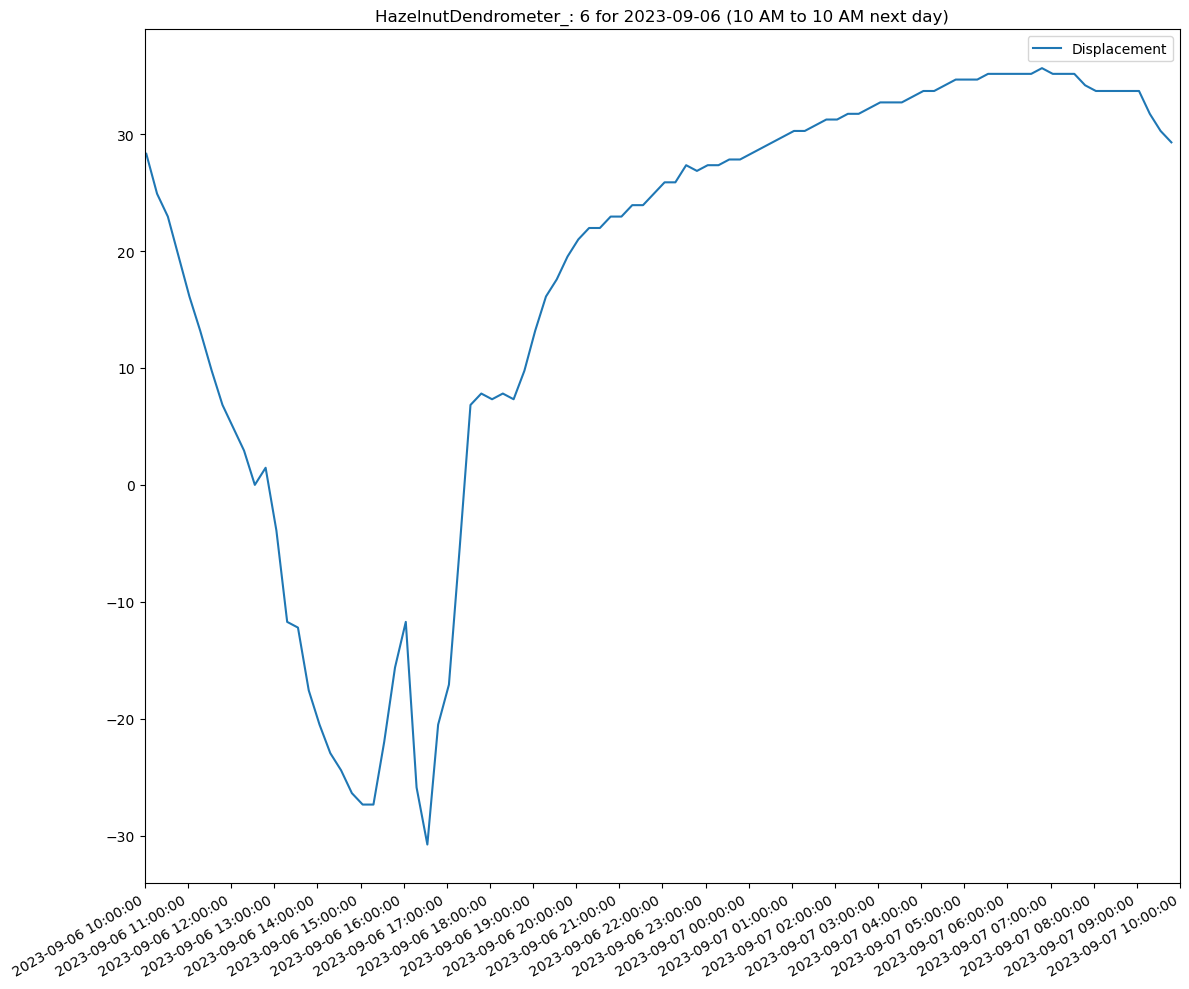

Maximum um: 35.64453125
Maximum um time: 2023-09-07 06:48:00
Minimum um: -30.76171875
Minimum um time: 2023-09-06 16:33:00
Range of Displacement: 66.40625


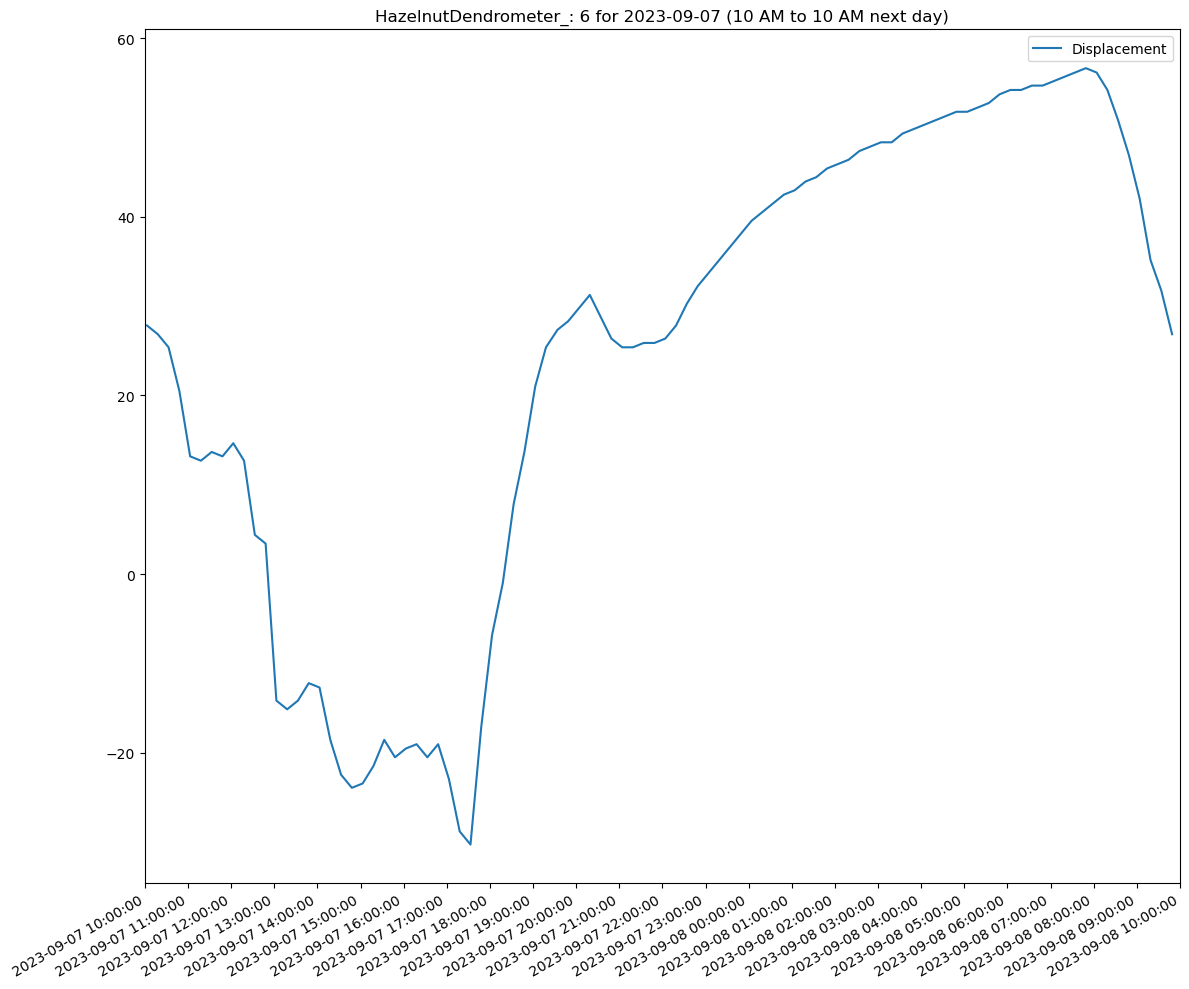

Maximum um: 56.640625
Maximum um time: 2023-09-08 07:49:00
Minimum um: -30.2734375
Minimum um time: 2023-09-07 17:33:00
Range of Displacement: 86.9140625


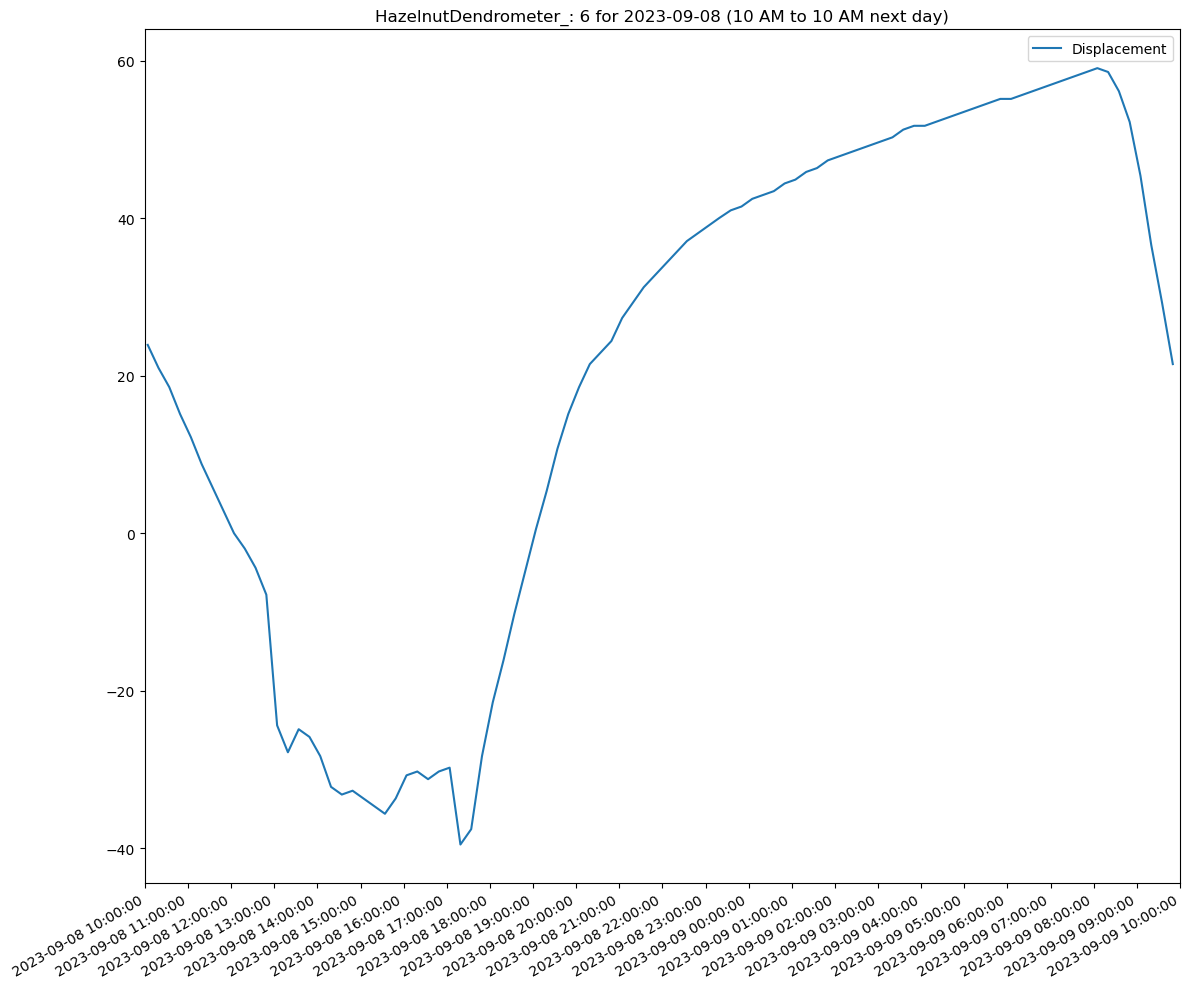

Maximum um: 59.08203125
Maximum um time: 2023-09-09 08:05:00
Minimum um: -39.55078125
Minimum um time: 2023-09-08 17:19:00
Range of Displacement: 98.6328125


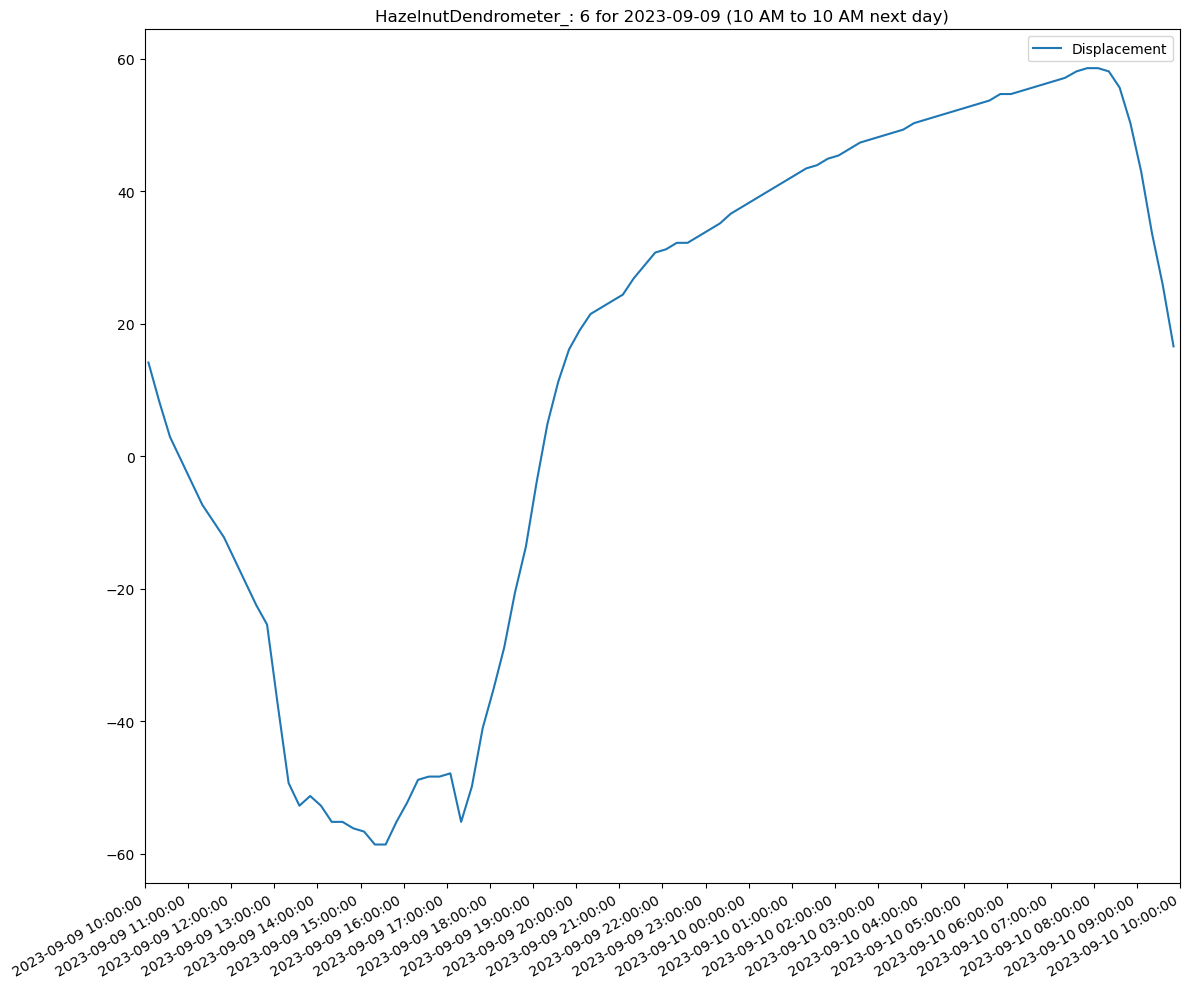

Maximum um: 58.59375
Maximum um time: 2023-09-10 07:51:00
Minimum um: -58.59375
Minimum um time: 2023-09-09 15:20:00
Range of Displacement: 117.1875


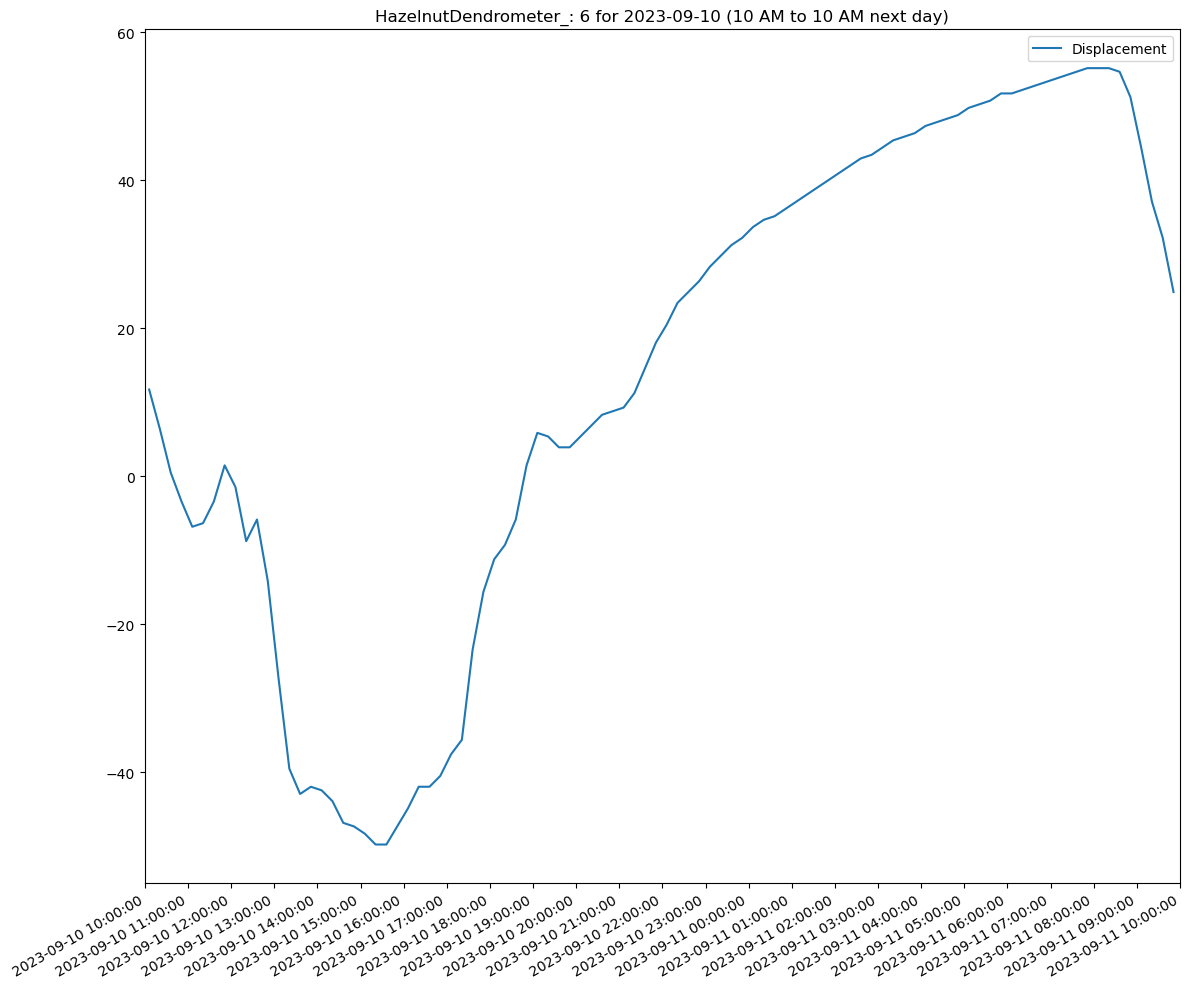

Maximum um: 55.17578125
Maximum um time: 2023-09-11 07:51:00
Minimum um: -49.8046875
Minimum um time: 2023-09-10 15:21:00
Range of Displacement: 104.98046875


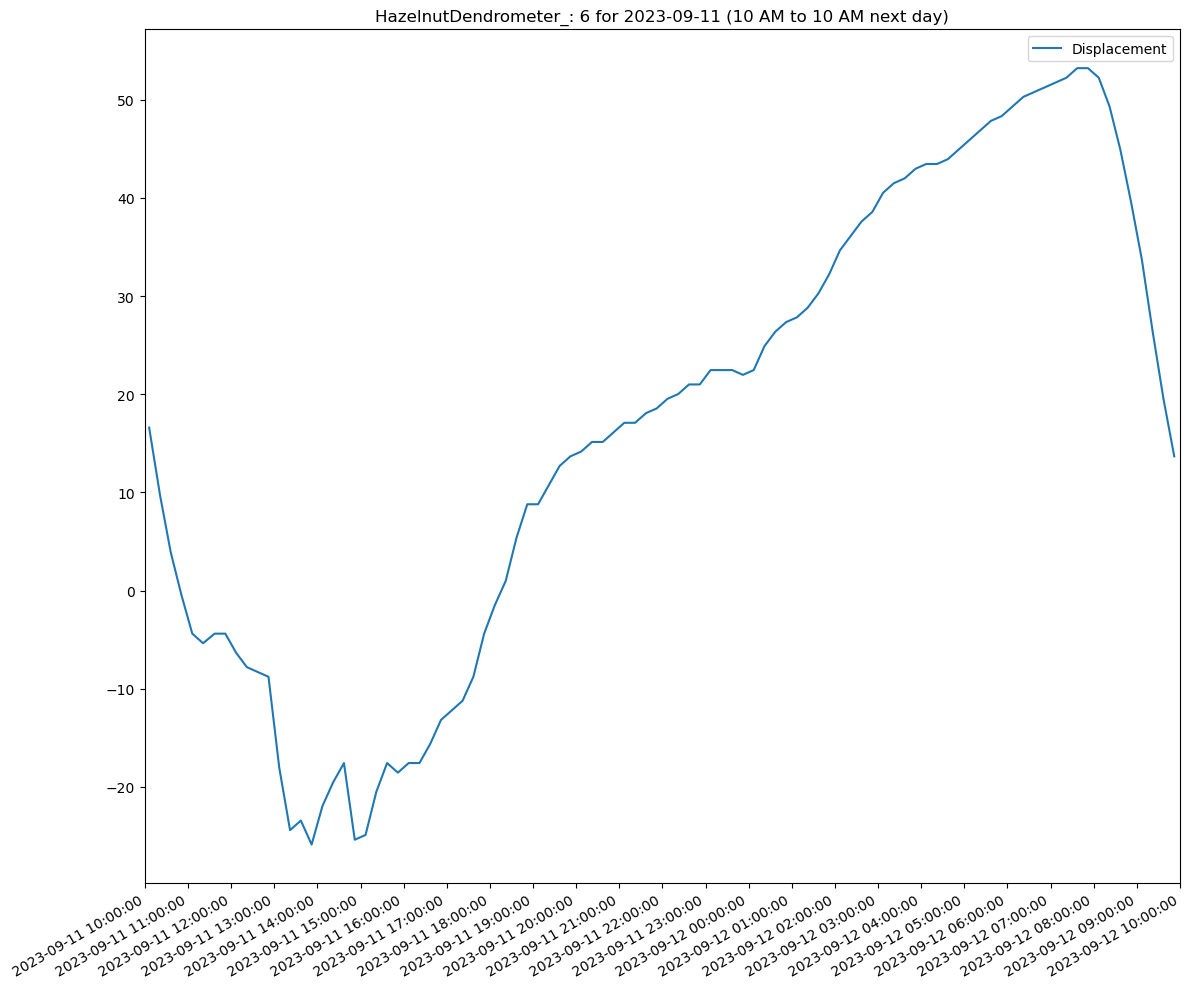

Maximum um: 53.22265625
Maximum um time: 2023-09-12 07:37:00
Minimum um: -25.87890625
Minimum um time: 2023-09-11 13:52:00
Range of Displacement: 79.1015625


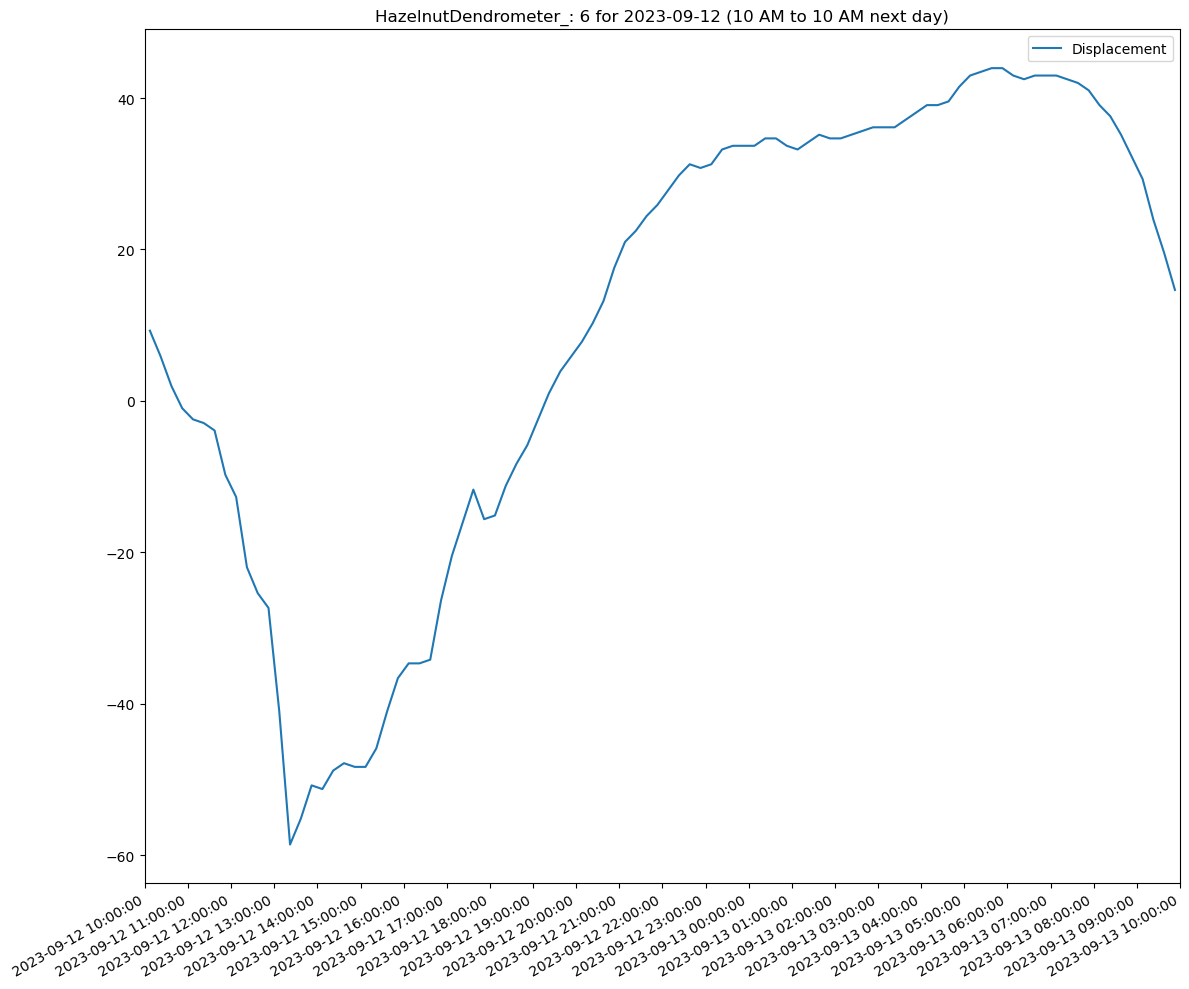

Maximum um: 43.9453125
Maximum um time: 2023-09-13 05:38:00
Minimum um: -58.59375
Minimum um time: 2023-09-12 13:22:00
Range of Displacement: 102.5390625


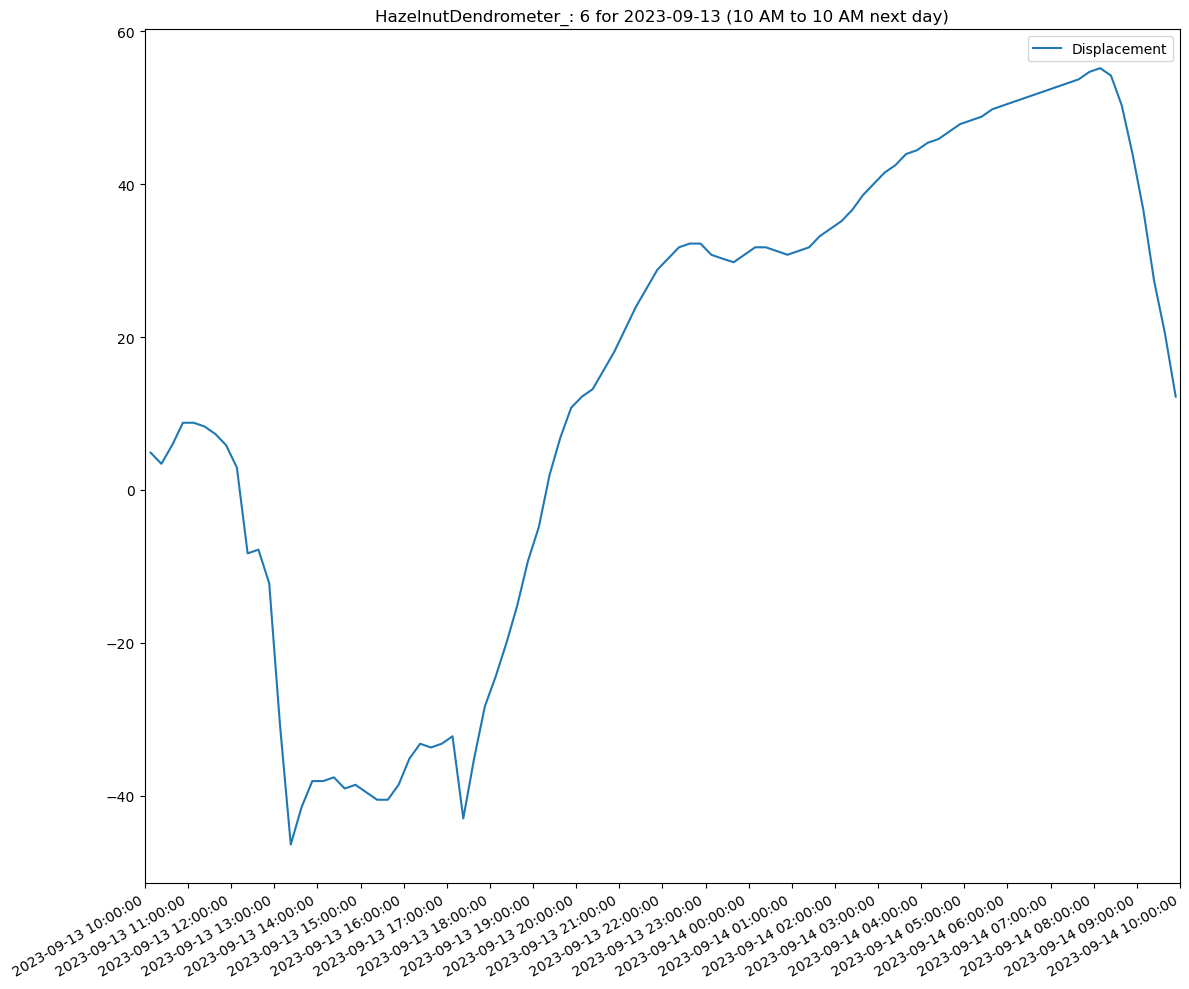

Maximum um: 55.17578125
Maximum um time: 2023-09-14 08:09:00
Minimum um: -46.38671875
Minimum um time: 2023-09-13 13:23:00
Range of Displacement: 101.5625


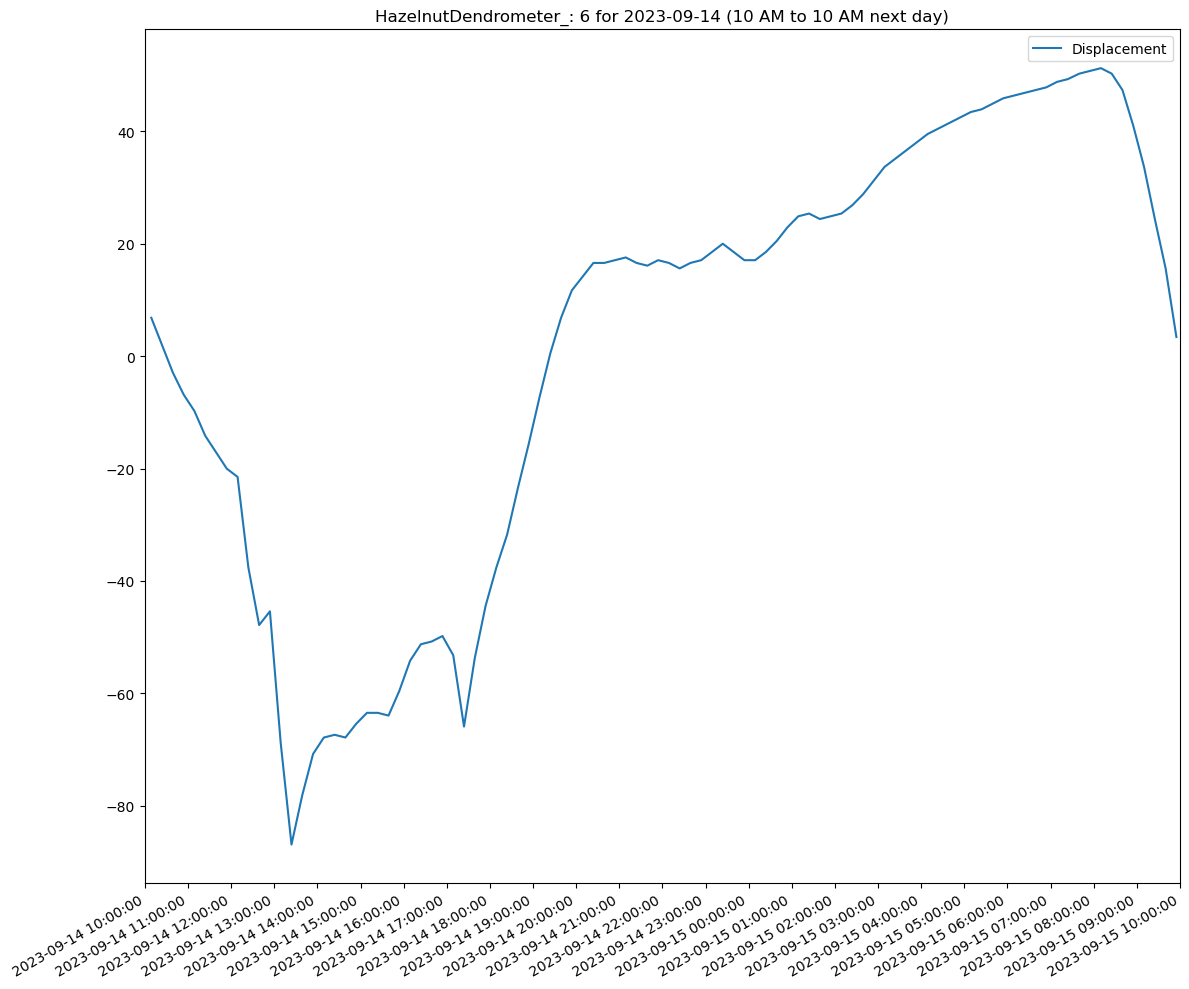

Maximum um: 51.26953125
Maximum um time: 2023-09-15 08:10:00
Minimum um: -86.9140625
Minimum um time: 2023-09-14 13:24:00
Range of Displacement: 138.18359375


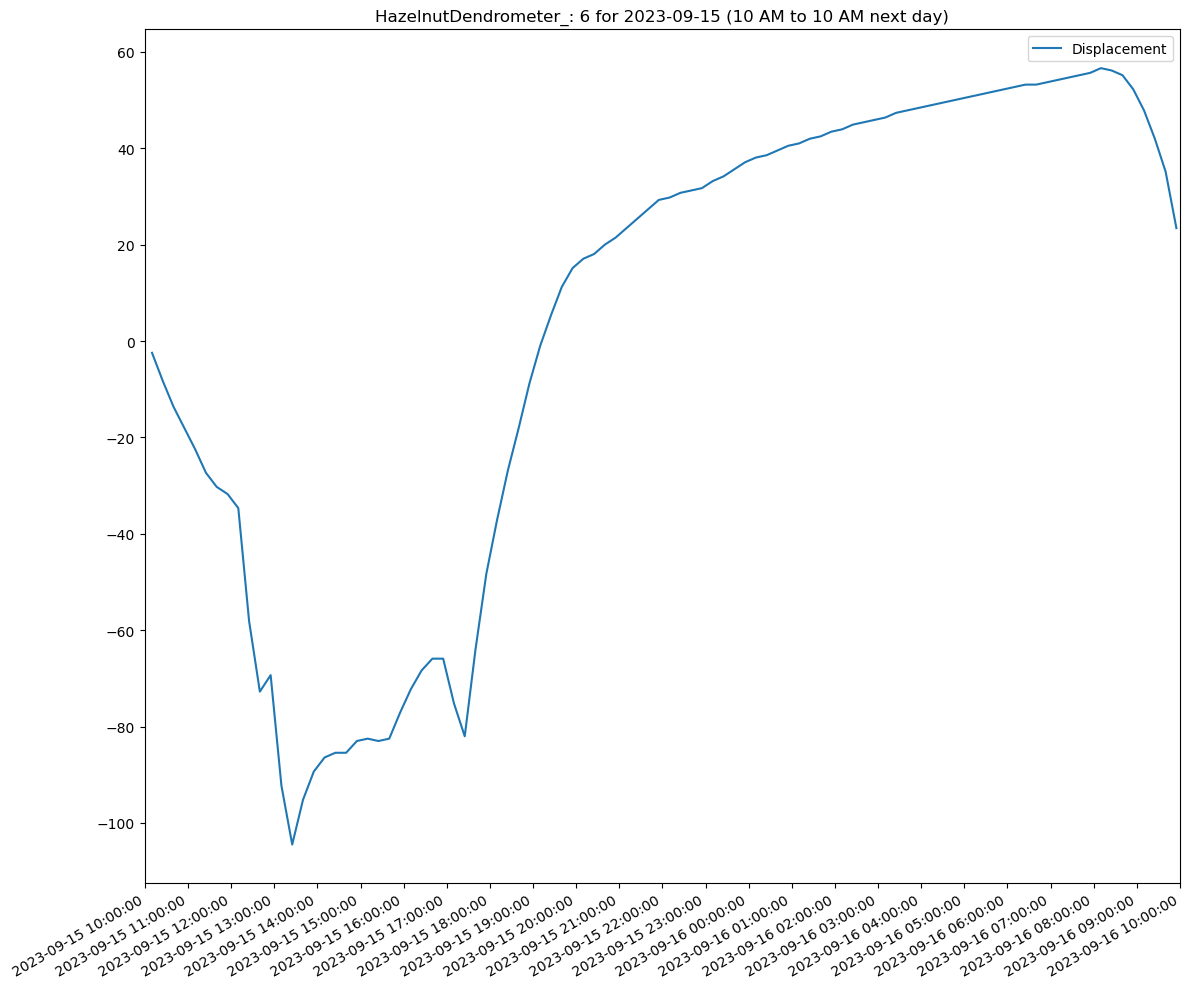

Maximum um: 56.640625
Maximum um time: 2023-09-16 08:10:00
Minimum um: -104.4921875
Minimum um time: 2023-09-15 13:25:00
Range of Displacement: 161.1328125


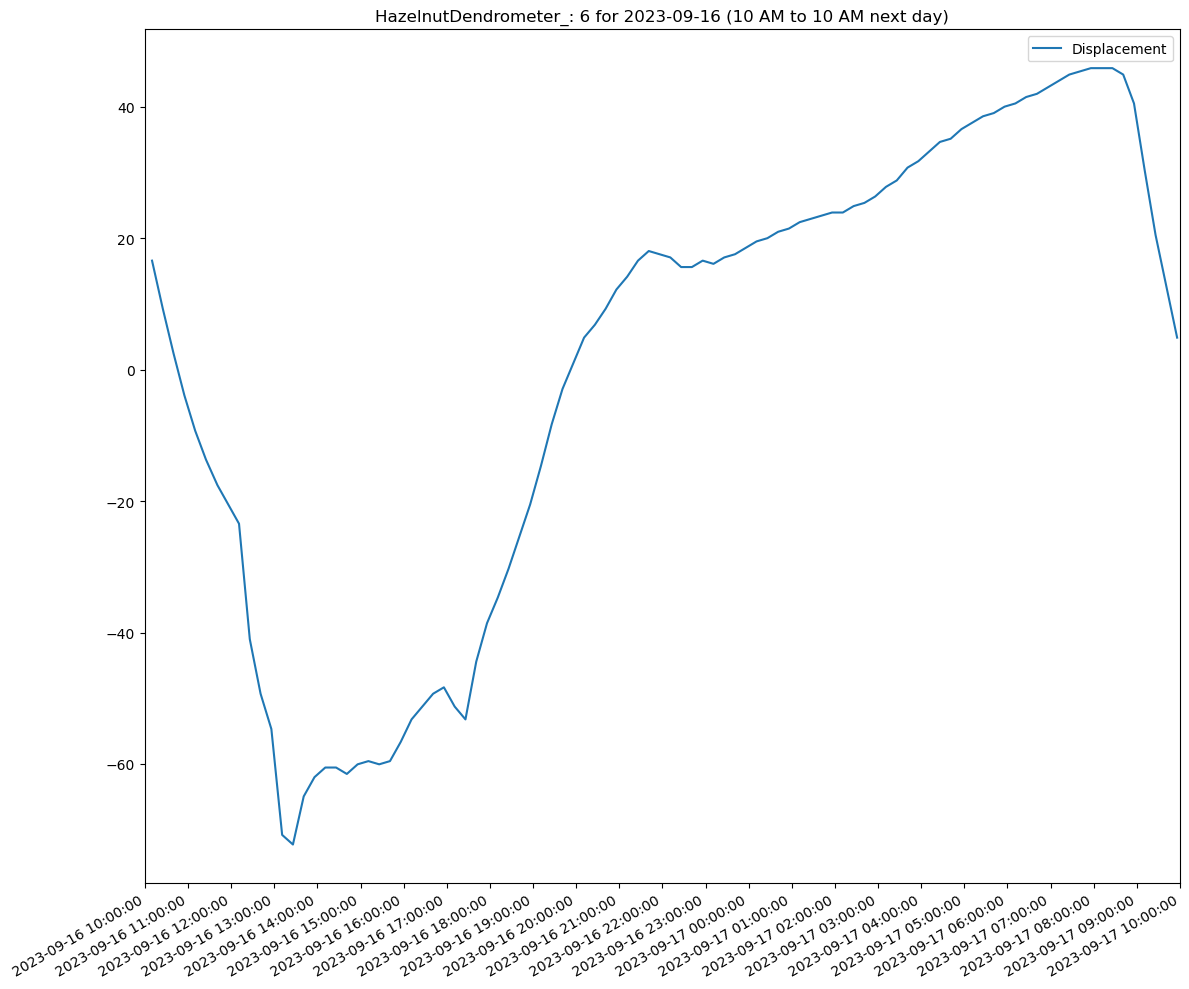

Maximum um: 45.8984375
Maximum um time: 2023-09-17 07:56:00
Minimum um: -72.265625
Minimum um time: 2023-09-16 13:26:00
Range of Displacement: 118.1640625


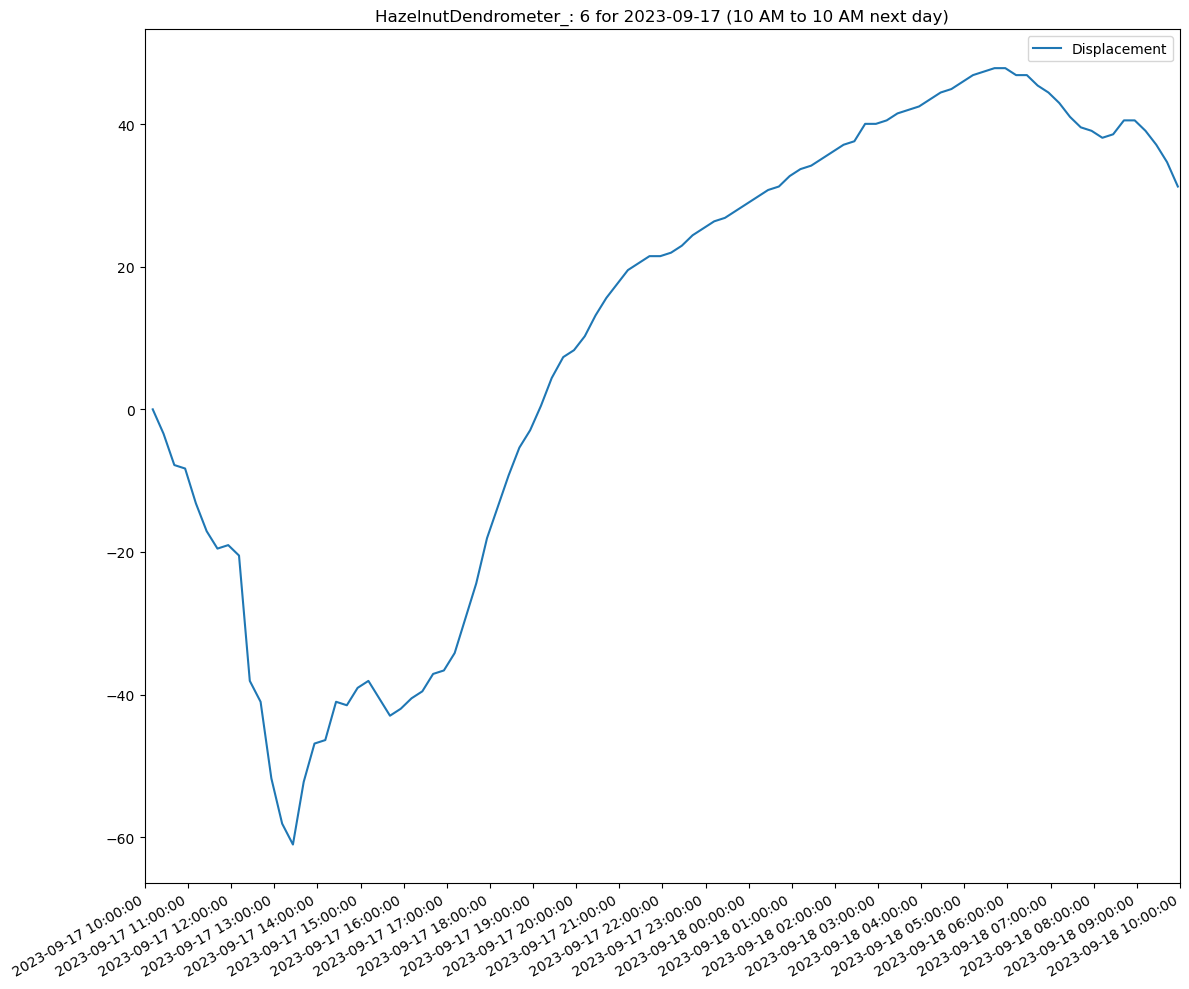

Maximum um: 47.8515625
Maximum um time: 2023-09-18 05:42:00
Minimum um: -61.03515625
Minimum um time: 2023-09-17 13:26:00
Range of Displacement: 108.88671875


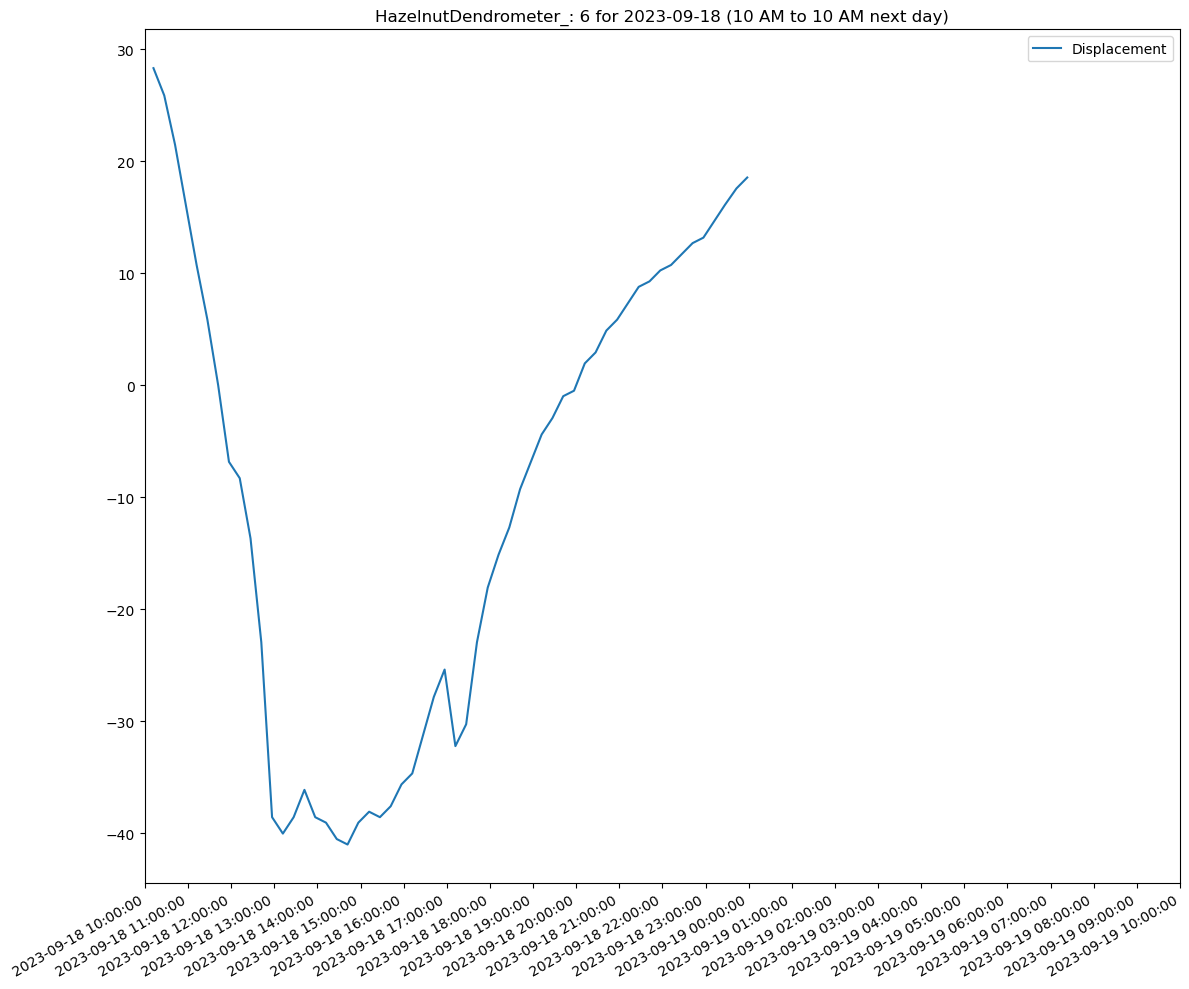

Maximum um: 28.3203125
Maximum um time: 2023-09-18 10:12:00
Minimum um: -41.015625
Minimum um time: 2023-09-18 14:42:00
Range of Displacement: 69.3359375


In [11]:
#plot in 24 hr intervals 
#calculate max um, min um, total displacement every 24 hrs from 10 am to 10 am next day
#create dataset with max um, min um, total displacement 
def plot_24hr_intervals(df, device_name):
    min_date = df['time_local'].min().strftime('%Y-%m-%d')
    max_date = df['time_local'].max().strftime('%Y-%m-%d')
    instance_name = df['instance'].iloc[0]

    # Calculate the start time for the first 24-hour interval starting at 10 AM
    current_time = pd.Timestamp(f'{min_date} 10:00:00')

    # Create empty lists to store data
    data_list = []

    while current_time <= df['time_local'].max():
        # Calculate the end time for the current 24-hour interval (10 AM to 10 AM next day)
        end_time = current_time + pd.Timedelta(hours=24)

        # Filter the DataFrame to include only the data within the current 24-hour interval
        df_filtered = df[(df['time_local'] >= current_time) & (df['time_local'] <= end_time)]

        um = df_filtered['um']  # Get the "um" column

        fig, ax = plt.subplots(figsize=(12, 10))

        # Plot the displacement data
        ax.plot(df_filtered['time_local'], um, label='Displacement')

        # Set the x-axis limits to cover the data for the current 24-hour interval
        ax.set_xlim(current_time, end_time)

        # Format x-axis as dates
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set the tick interval to 1 hour
        plt.gcf().autofmt_xdate()  # Rotate the x-axis labels for better readability

        ax.set_title(f'{device_name}: {instance_name} for {current_time.date()} (10 AM to 10 AM next day)')
        ax.legend()
        plt.tight_layout()
        plt.show()

        # Calculate max and min um values
        # calculate total displacement for that 24 hr period
        maximum_um = df_filtered['um'].max()
        minimum_um = df_filtered['um'].min()
        max_um_row = df_filtered[df_filtered['um'] == maximum_um]
        date_time_max_um = max_um_row['time_local'].iloc[0]
        min_um_row = df_filtered[df_filtered['um'] == minimum_um]
        date_time_min_um = min_um_row['time_local'].iloc[0]
        total_displacement = maximum_um - minimum_um
        
        print(f"Maximum um: {maximum_um}")
        print(f"Maximum um time: {date_time_max_um}")
        print(f"Minimum um: {minimum_um}")
        print(f"Minimum um time: {date_time_min_um}")
        print(f"Range of Displacement: {total_displacement}")

        # Append data to the list
        data_list.append({
#             'Date': current_time.date(),
            'Maximum um': maximum_um,
            'Maximum um time': date_time_max_um,
            'Minimum um': minimum_um,
            'Minimum um time': date_time_min_um,
            'Range of Displacement': total_displacement
        })

        # Move to the next 24-hour interval
        current_time += pd.Timedelta(days=1)

    # Create a DataFrame from the list of data
    disp_mag_df = pd.DataFrame(data_list)
    return disp_mag_df  # Return the DataFrame

    # Print the DataFrame or use it for further analysis
    print(disp_mag_df)

from datetime import date, timedelta
import pandas as pd

# Call the function to plot 24-hour intervals starting at 10 AM
# plot_24hr_intervals(df, device_name)
disp_mag_df = plot_24hr_intervals(df, device_name)







In [12]:
print(disp_mag_df)

    Maximum um     Maximum um time  Minimum um     Minimum um time  \
0  -163.085938 2023-07-16 06:33:00 -363.769531 2023-07-15 16:33:00   
1  -174.804688 2023-07-17 05:04:00 -337.890625 2023-07-16 15:19:00   
2  -169.433594 2023-07-18 06:05:00 -288.574219 2023-07-17 16:20:00   
3  -166.503906 2023-07-19 06:34:00 -312.011719 2023-07-18 16:19:00   
4  -168.945312 2023-07-20 05:35:00 -339.843750 2023-07-19 16:19:00   
..         ...                 ...         ...                 ...   
61   51.269531 2023-09-15 08:10:00  -86.914062 2023-09-14 13:24:00   
62   56.640625 2023-09-16 08:10:00 -104.492188 2023-09-15 13:25:00   
63   45.898438 2023-09-17 07:56:00  -72.265625 2023-09-16 13:26:00   
64   47.851562 2023-09-18 05:42:00  -61.035156 2023-09-17 13:26:00   
65   28.320312 2023-09-18 10:12:00  -41.015625 2023-09-18 14:42:00   

    Range of Displacement  
0              200.683594  
1              163.085938  
2              119.140625  
3              145.507812  
4              170.

In [13]:
# # save dataset with max um, min um, total displacement to a csv
# # Specify the file path where you want to save the CSV file
# csv_file_path = 'H1_raw_range_disp.csv'

# # Use the to_csv method to save the DataFrame to a CSV file
# disp_mag_df.to_csv(csv_file_path, index=False)

# print(f'Data saved to {csv_file_path}')

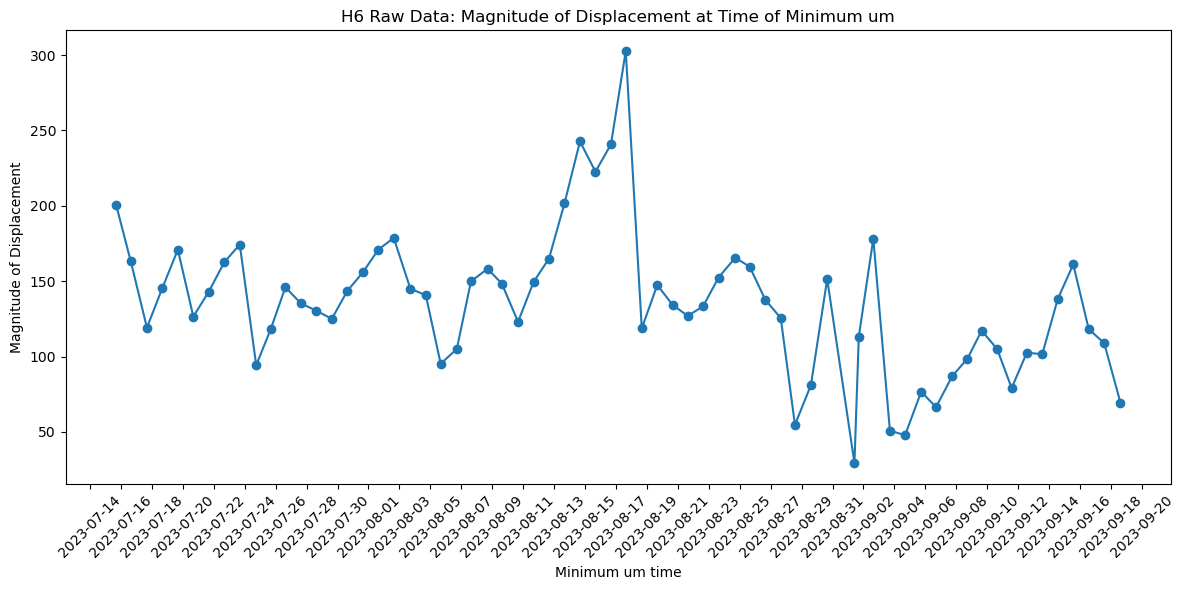

In [14]:

# Plot the dataset
plt.figure(figsize=(12, 6))
plt.plot(disp_mag_df['Minimum um time'], disp_mag_df['Range of Displacement'], marker='o', linestyle='-')

plt.xlabel('Minimum um time')
plt.ylabel('Magnitude of Displacement')
plt.title('H6 Raw Data: Magnitude of Displacement at Time of Minimum um')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()